In [2]:
from time import sleep
import pandas as pd
import re
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import plotly.express as px
import seaborn as sns
import string
from wordcloud import WordCloud

pd.set_option('display.max_rows', None)  # Afficher toutes les lignes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Dictionnaire de traduction des mois en français vers anglais
month_translation = {
    'janvier': 'January',
    'février': 'February',
    'mars': 'March',
    'avril': 'April',
    'mai': 'May',
    'juin': 'June',
    'juillet': 'July',
    'août': 'August',
    'septembre': 'September',
    'octobre': 'October',
    'novembre': 'November',
    'décembre': 'December'
}
day_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}


# **Analyse des données scrapées**

## Analyse du dataset de liens scrapés

In [4]:
# Chargement du fichier collecte donnéees generale  JSON 
with open('C:/Users/mbouc/supply_sentiment/data treatment/beautifulsoup/filtered_list.json', 'r', encoding='utf-8') as f:
    brands_data = json.load(f)
df_brands = pd.DataFrame(brands_data)
df_brands

marque             liens_marque categorie  \
0                      Younited Credit  www.younited-credit.com      bank   
1                              Cofidis               cofidis.fr      bank   
2                                Qonto                qonto.com      bank   
3                           BoursoBank           boursobank.com      bank   
4                        Le Pot Commun           lepotcommun.fr      bank   
5                               iGraal               igraal.com      bank   
6                              Poulpeo          www.poulpeo.com      bank   
7                              Sumeria               sumeria.eu      bank   
8                           Surveylama           surveylama.com      bank   
9                               Nickel                nickel.eu      bank   
10                                 PCS                mypcs.com      bank   
11                         Orange Bank            orangebank.fr      bank   
12  Leetchi.com - la cagnotte en ligne              leetchi.com      bank   
13                                Floa              floabank.fr      bank   

    reviews pays trust_score  
0     69598   FR         4,7  
1     28731   FR         4,7  
2     19163   FR         4,7  
3     31179   FR         4,5  
4     25708   FR         4,5  
5     34340   FR         4,4  
6     26142   FR         4,4  
7     15175   FR         4,4  
8     16655   FR         4,1  
9     23165   FR         4,0  
10    16985   FR         4,5  
11    15040   FR         4,4  
12    46775   FR         4,1  
13    11892   FR         3,7

In [5]:
df_brands.shape

(14, 6)

In [6]:
df_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   marque        14 non-null     object
 1   liens_marque  14 non-null     object
 2   categorie     14 non-null     object
 3   reviews       14 non-null     int64 
 4   pays          14 non-null     object
 5   trust_score   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [7]:
df_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   marque        14 non-null     object
 1   liens_marque  14 non-null     object
 2   categorie     14 non-null     object
 3   reviews       14 non-null     int64 
 4   pays          14 non-null     object
 5   trust_score   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [8]:
df_brands.describe(include='all')

marque             liens_marque categorie       reviews pays  \
count                14                       14        14     14.000000   14   
unique               14                       14         1           NaN    1   
top     Younited Credit  www.younited-credit.com      bank           NaN   FR   
freq                  1                        1        14           NaN   14   
mean                NaN                      NaN       NaN  27182.000000  NaN   
std                 NaN                      NaN       NaN  15383.524794  NaN   
min                 NaN                      NaN       NaN  11892.000000  NaN   
25%                 NaN                      NaN       NaN  16737.500000  NaN   
50%                 NaN                      NaN       NaN  24436.500000  NaN   
75%                 NaN                      NaN       NaN  30567.000000  NaN   
max                 NaN                      NaN       NaN  69598.000000  NaN   

       trust_score  
count           14  
unique           6  
top            4,4  
freq             4  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

array([[<Axes: title={'center': 'reviews'}>]], dtype=object)

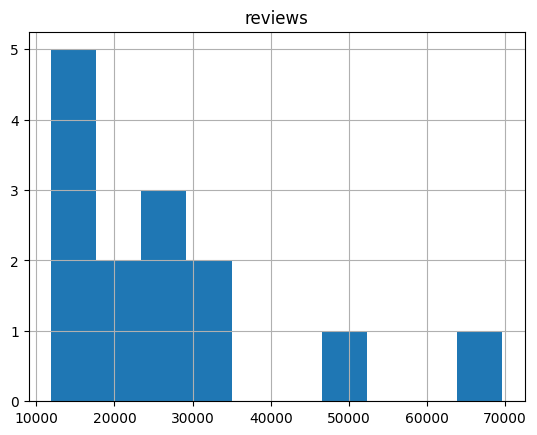

In [9]:
df_brands.hist()

### TRUST SCORE

In [10]:
# Convert 'trust_score' to float, handling different separators (comma and dot)
df_brands['trust_score'] = df_brands['trust_score'].apply(lambda x: (
    float(x.replace(',', '.')) if x != 'not available' and x != 'not applicable' else None
))

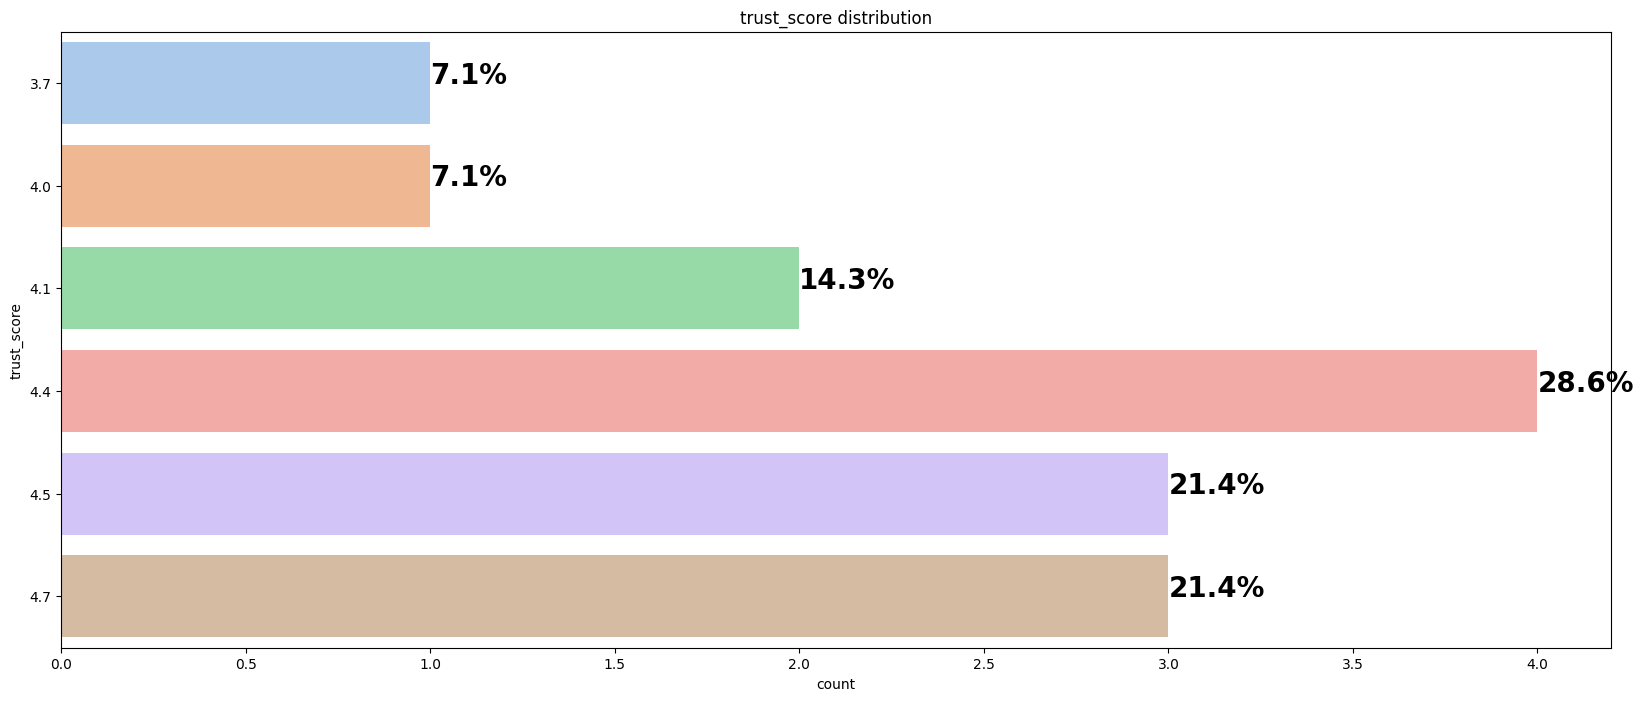

In [11]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='trust_score', data=df_brands, palette='pastel')
ax.set_title("trust_score distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(df_brands.trust_score))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
        
plt.show()

              reviews  trust_score
reviews      1.000000     0.335189
trust_score  0.335189     1.000000


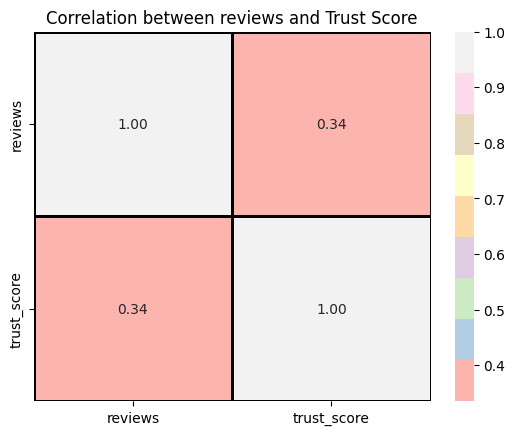

In [12]:
# Calculer la corrélation entre 'reviews' et 'trust_score'
correlation = df_brands[['reviews', 'trust_score']].dropna().corr()

# Afficher la corrélation
print(correlation)
# Affichage de la heatmap

sns.heatmap(correlation, annot=True, fmt=".2f", cmap='Pastel1', cbar=True, linewidths=1, linecolor='black')
plt.title('Correlation between reviews and Trust Score')
plt.show()

la matrice de corrélation montre une corrélation de 0.335 entre les avis et trust_score. Cette valeur indique que :

   -Il existe une légère corrélation positive entre le nombre de reviews et le trust_score, mais elle est modérée.

   -Cela signifie que, globalement, **une augmentation des avis est légèrement associée à une hausse du trust_score**, mais ce n’est pas très significatif.

Points à noter :

   -Corrélation proche de 0.33 : Ce type de corrélation montre que les **deux variables ne sont pas très fortement liées**.
   
   -Implication : Les avis et le trust_score influencent de manière modérée les comportements ou les perceptions, mais cela peut varier selon les cas.

## Analyse du dataset Reviews

In [13]:
# Chargement du fichier collecte donnéees generale  JSON
with open('C:/Users/mbouc/supply_sentiment/data treatment/beautifulsoup/reviews.json', 'r', encoding='utf-8') as f:
    reviews_data = json.load(f)
df_reviews = pd.DataFrame(reviews_data)
df_reviews.head(2)

categorie_bis             company_name user_name  \
0          bank  www.younited-credit.com       GUY   
1          bank  www.younited-credit.com  Masselot   

                  review_title  \
0                      MERCI !   
1  Rapide , simple et efficace   

                                         review_body response response_date  \
0  Bonjour je mets 5 étoiles car j'ai eu toute l'...     None          None   
1  Très accessible , il suffit de bien répondre e...     None          None   

   rating                        experience_date review_date  \
0       5  Date de l'expérience: 09 janvier 2025  2025-01-15   
1       5  Date de l'expérience: 06 janvier 2025  2025-01-14   

                                            site_url  scrap_date  
0  https://fr.trustpilot.com/review/www.younited-...  2025-01-15  
1  https://fr.trustpilot.com/review/www.younited-...  2025-01-15

### Normalisation et extravtion des features

In [14]:
# Suppression de la colonne 'categorie_bis'
df_reviews = df_reviews.drop(columns=['categorie_bis'])

In [15]:
df_reviews = df_reviews.rename(columns={'company_name': 'liens_marque'})

#### Dates

In [16]:
# Extraction de la date
df_reviews['experience_date'] = df_reviews['experience_date'].str.extract(r'(\d{2} \w+ \d{4})')



# Remplacer les mois en français par les mois en anglais
for fr_month, en_month in month_translation.items():
    df_reviews['experience_date'] = df_reviews['experience_date'].str.replace(fr_month, en_month)

# Conversion en datetime avec gestion des erreurs
df_reviews['experience_date'] = pd.to_datetime(df_reviews['experience_date'], format='%d %B %Y', errors='coerce')

# Reformater la date en 'jj-mm-aaaa'
df_reviews['experience_date'] = df_reviews['experience_date'].dt.strftime('%d-%m-%Y')

# Vérification des colonnes de dates
print("experience_date:")
print(df_reviews['experience_date'])

# Conversion des autres dates : review_date et response_date
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'], errors='coerce')
df_reviews['response_date'] = pd.to_datetime(df_reviews['response_date'], errors='coerce')
df_reviews['scrap_date'] = pd.to_datetime(df_reviews['scrap_date'], errors='coerce')

# Formatage en 'dd-mm-yyyy' si ce n'est pas déjà fait pour review_date, response_date et scrap_date
df_reviews['review_date'] = df_reviews['review_date'].dt.strftime('%d-%m-%Y') if df_reviews['review_date'].notnull().any() else df_reviews['review_date']
df_reviews['response_date'] = df_reviews['response_date'].dt.strftime('%d-%m-%Y') if df_reviews['response_date'].notnull().any() else df_reviews['response_date']
df_reviews['scrap_date'] = df_reviews['scrap_date'].dt.strftime('%d-%m-%Y') if df_reviews['scrap_date'].notnull().any() else df_reviews['scrap_date']

# Vérification après conversion des dates
print("review_date :")
print(df_reviews['review_date'])
print("response_date :")
print(df_reviews['response_date'])
print("scrap_date :")
print(df_reviews['scrap_date'])


experience_date:
0       09-01-2025
1       06-01-2025
2       03-01-2025
3       07-01-2025
4       10-01-2025
5       31-12-2024
6       08-01-2025
7       31-12-2024
8       10-01-2025
9       06-01-2025
10      30-12-2024
11      03-01-2025
12      27-12-2024
13      03-01-2025
14      08-01-2025
15      30-12-2024
16      31-12-2024
17      10-07-2024
18      15-11-2024
19      24-12-2024
20      02-01-2025
21      20-12-2024
22      30-12-2024
23      30-12-2024
24      06-11-2024
25      13-01-2025
26      06-01-2025
27      27-12-2024
28      27-12-2024
29      09-01-2025
30      10-01-2025
31      27-12-2024
32      06-01-2025
33      27-12-2024
34      30-12-2024
35      19-12-2024
36      03-01-2025
37      27-12-2024
38      27-12-2024
39      24-12-2024
40      06-01-2025
41      23-12-2024
42      20-12-2024
43      02-01-2025
44      06-01-2025
45      27-12-2024
46      23-12-2024
47      09-01-2025
48      27-12-2024
49      06-01-2025
50      30-12-2024
51      26-12-

In [17]:
df_reviews.head(2)

liens_marque user_name                 review_title  \
0  www.younited-credit.com       GUY                      MERCI !   
1  www.younited-credit.com  Masselot  Rapide , simple et efficace   

                                         review_body response response_date  \
0  Bonjour je mets 5 étoiles car j'ai eu toute l'...     None           NaN   
1  Très accessible , il suffit de bien répondre e...     None           NaN   

   rating experience_date review_date  \
0       5      09-01-2025  15-01-2025   
1       5      06-01-2025  14-01-2025   

                                            site_url  scrap_date  
0  https://fr.trustpilot.com/review/www.younited-...  15-01-2025  
1  https://fr.trustpilot.com/review/www.younited-...  15-01-2025

In [18]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   liens_marque     5600 non-null   object
 1   user_name        5600 non-null   object
 2   review_title     5600 non-null   object
 3   review_body      5600 non-null   object
 4   response         3501 non-null   object
 5   response_date    3501 non-null   object
 6   rating           5600 non-null   int64 
 7   experience_date  5600 non-null   object
 8   review_date      5600 non-null   object
 9   site_url         5600 non-null   object
 10  scrap_date       5600 non-null   object
dtypes: int64(1), object(10)
memory usage: 481.4+ KB


In [19]:
# Conversion en datetime
df_reviews['experience_date'] = pd.to_datetime(df_reviews['experience_date'], format='%d-%m-%Y', errors='coerce')

# Affichage du résultat pour vérification
print("Experience Date - Conversion en datetime :")
print(df_reviews['experience_date'].head())

Experience Date - Conversion en datetime :
0   2025-01-09
1   2025-01-06
2   2025-01-03
3   2025-01-07
4   2025-01-10
Name: experience_date, dtype: datetime64[ns]


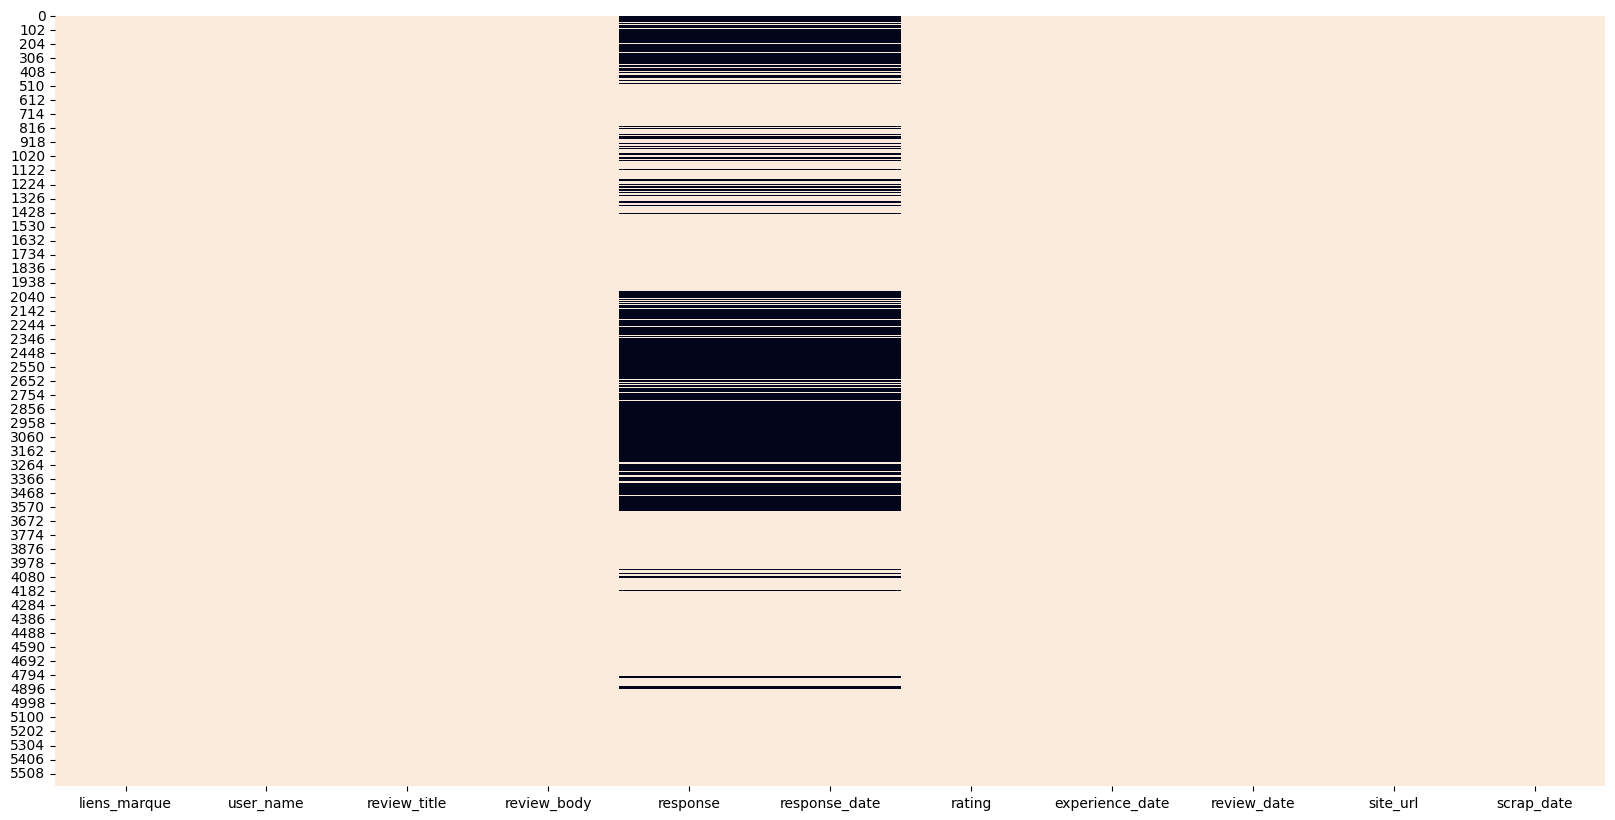

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df_reviews.notna(), cbar=False)
plt.show()

In [21]:
# Conversion en datetime
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'], format='%d-%m-%Y', errors='coerce')

# Affichage du résultat pour vérification
print("Review Date - Conversion en datetime :")
print(df_reviews['review_date'].head())

Review Date - Conversion en datetime :
0   2025-01-15
1   2025-01-14
2   2025-01-10
3   2025-01-15
4   2025-01-15
Name: review_date, dtype: datetime64[ns]


In [22]:
# Conversion en datetime
df_reviews['response_date'] = pd.to_datetime(df_reviews['response_date'], format='%d-%m-%Y', errors='coerce')

# Affichage du résultat pour vérification
print("Response Date - Conversion en datetime :")
print(df_reviews['response_date'].head())

Response Date - Conversion en datetime :
0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: response_date, dtype: datetime64[ns]


In [23]:
# Conversion en datetime
df_reviews['scrap_date'] = pd.to_datetime(df_reviews['scrap_date'], format='%d-%m-%Y', errors='coerce')

# Affichage du résultat pour vérification
print("Scrap Date - Conversion en datetime :")
print(df_reviews['scrap_date'].head())

Scrap Date - Conversion en datetime :
0   2025-01-15
1   2025-01-15
2   2025-01-15
3   2025-01-15
4   2025-01-15
Name: scrap_date, dtype: datetime64[ns]


In [24]:
df_reviews.describe(include='all')

liens_marque user_name review_title  \
count                      5600      5600         5600   
unique                       14      4844         4721   
top     www.younited-credit.com   cliente      Parfait   
freq                        400        69           61   
mean                        NaN       NaN          NaN   
min                         NaN       NaN          NaN   
25%                         NaN       NaN          NaN   
50%                         NaN       NaN          NaN   
75%                         NaN       NaN          NaN   
max                         NaN       NaN          NaN   
std                         NaN       NaN          NaN   

                                  review_body          response  \
count                                    5600              3501   
unique                                   4950                13   
top     Date de l'expérience: 10 janvier 2025  Réponse : Nickel   
freq                                       38               398   
mean                                      NaN               NaN   
min                                       NaN               NaN   
25%                                       NaN               NaN   
50%                                       NaN               NaN   
75%                                       NaN               NaN   
max                                       NaN               NaN   
std                                       NaN               NaN   

                        response_date       rating  \
count                            3501  5600.000000   
unique                            NaN          NaN   
top                               NaN          NaN   
freq                              NaN          NaN   
mean    2024-12-02 06:08:32.082262272     4.390179   
min               2024-02-22 00:00:00     1.000000   
25%               2024-12-02 00:00:00     5.000000   
50%               2024-12-26 00:00:00     5.000000   
75%               2025-01-12 00:00:00     5.000000   
max               2025-01-15 00:00:00     5.000000   
std                               NaN     1.254993   

                      experience_date                    review_date  \
count                            5600                           5600   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2024-11-24 19:08:23.999999744  2024-12-05 01:57:15.428571648   
min               2023-04-26 00:00:00            2024-02-21 00:00:00   
25%               2024-12-01 00:00:00            2024-12-07 00:00:00   
50%               2024-12-23 00:00:00            2024-12-27 00:00:00   
75%               2025-01-07 00:00:00            2025-01-10 00:00:00   
max               2025-01-15 00:00:00            2025-01-15 00:00:00   
std                               NaN                            NaN   

                                                 site_url           scrap_date  
count                                                5600                 5600  
unique                                                280                  NaN  
top     https://fr.trustpilot.com/review/floabank.fr?p...                  NaN  
freq                                                   20                  NaN  
mean                                                  NaN  2025-01-15 00:00:00  
min                                                   NaN  2025-01-15 00:00:00  
25%                                                   NaN  2025-01-15 00:00:00  
50%                                                   NaN  2025-01-15 00:00:00  
75%                                                   NaN  2025-01-15 00:00:00  
max                                                   NaN  2025-01-15 00:00:00  
std                                                   NaN                  NaN

In [25]:
df_reviews.shape

(5600, 11)

#### Rating

In [26]:
df_reviews.rating.isnull().sum()

np.int64(0)

In [27]:
df_reviews.isnull().sum()

liens_marque          0
user_name             0
review_title          0
review_body           0
response           2099
response_date      2099
rating                0
experience_date       0
review_date           0
site_url              0
scrap_date            0
dtype: int64

Matrice de corrélation :
                   rating  experience_date  review_date  response_date
rating           1.000000         0.021729    -0.000730      -0.002037
experience_date  0.021729         1.000000     0.841995       0.839462
review_date     -0.000730         0.841995     1.000000       0.998380
response_date   -0.002037         0.839462     0.998380       1.000000


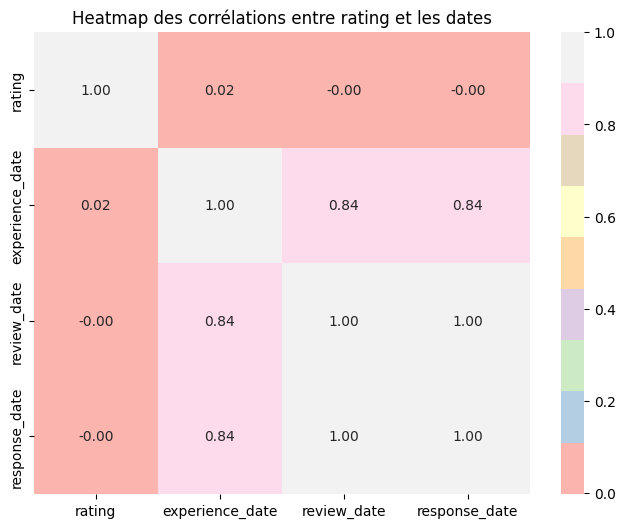

In [28]:
# Calcul des corrélations
correlation_matrix = df_reviews[['rating', 'experience_date', 'review_date', 'response_date']].dropna().corr(method='pearson')

# Affichage des corrélations
print("Matrice de corrélation :")
print(correlation_matrix)

# Visualisation avec une heatmap 


plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='Pastel1', 
    fmt='.2f', 
    cbar=True
)

plt.title("Heatmap des corrélations entre rating et les dates")
plt.show()


**Corrélation avec rating** :

Les corrélations entre rating et les dates (experience_date, review_date, response_date) sont très faibles, proches de 0, indiquant une **absence de relation** linéaire significative.
Relations entre les dates :

-experience_date est fortement corrélée avec review_date (0.842) et response_date (0.839).

-review_date et response_date montrent une corrélation presque parfaite (0.998), ce qui suggère qu'elles sont presque interchangeables.

**Conclusion** :
Les dates ont une relation forte entre elles, mais leur impact sur les évaluations (rating) semble négligeable.

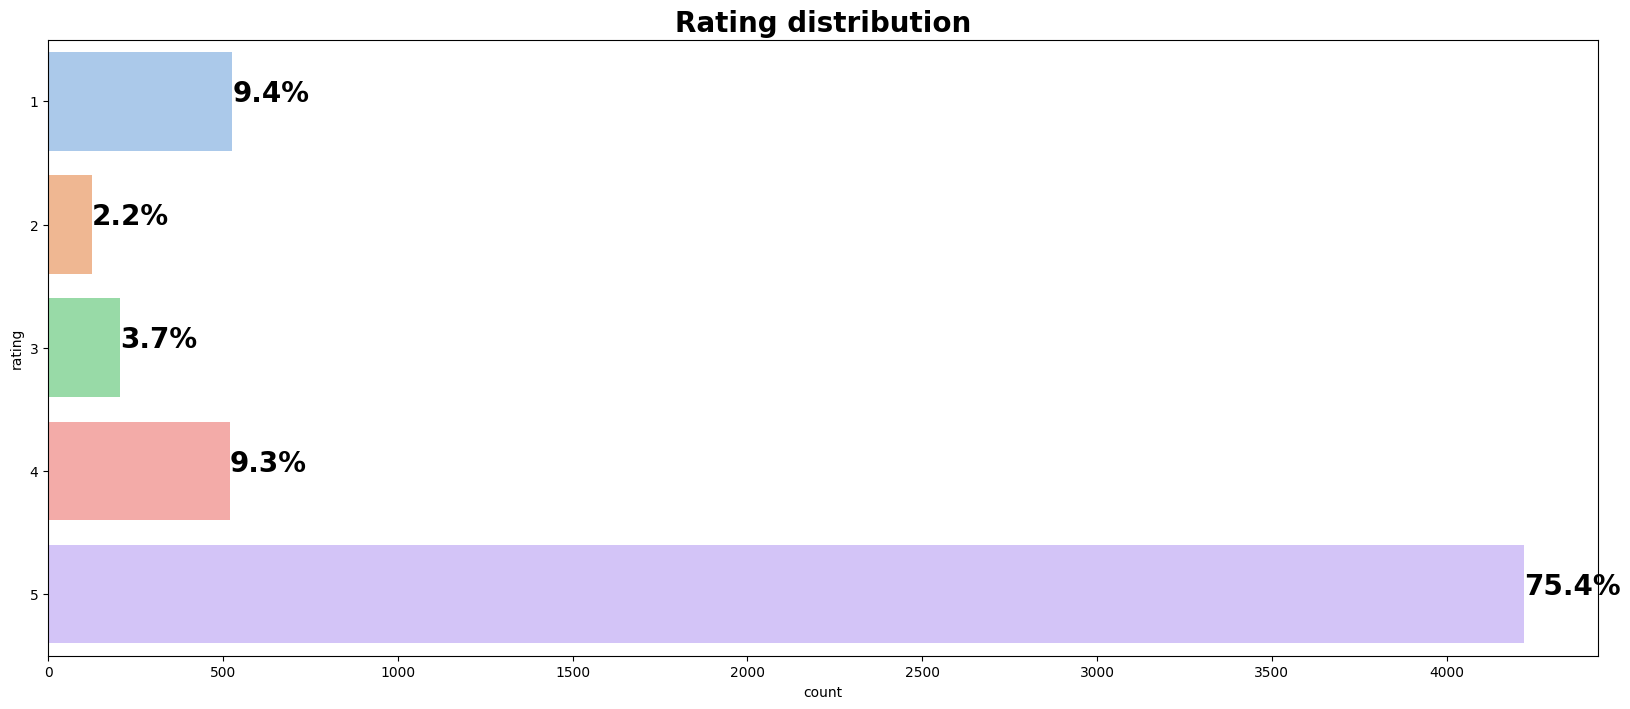

In [29]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='rating', data=df_reviews, palette='pastel')
ax.set_title("Rating distribution", fontsize=20, fontweight='bold')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(df_reviews.rating))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
        
plt.show()

Nous remarquons que notre distribution est tres eterogene, il va falloire penser a over/undersapmling pour la partie modelisation


#### Réponses

In [30]:
df_reviews.response.isnull().sum()

np.int64(2099)

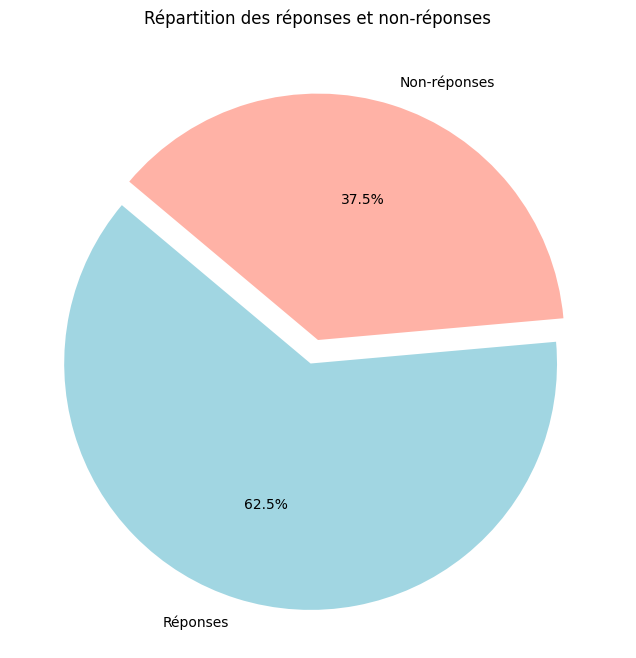

In [31]:
# Calcul des réponses et non-réponses
responses = df_reviews['response_date'].notna().sum()
no_responses = df_reviews['response_date'].isna().sum()

# Données pour le graphique
labels = ['Réponses', 'Non-réponses']
sizes = [responses, no_responses]
colors = ['#A1D6E2', '#FFB2A6']  # Couleurs pastel
explode = (0.1, 0)  # Mettre en évidence le premier segment

# Création du graphique
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title("Répartition des réponses et non-réponses")
plt.show()


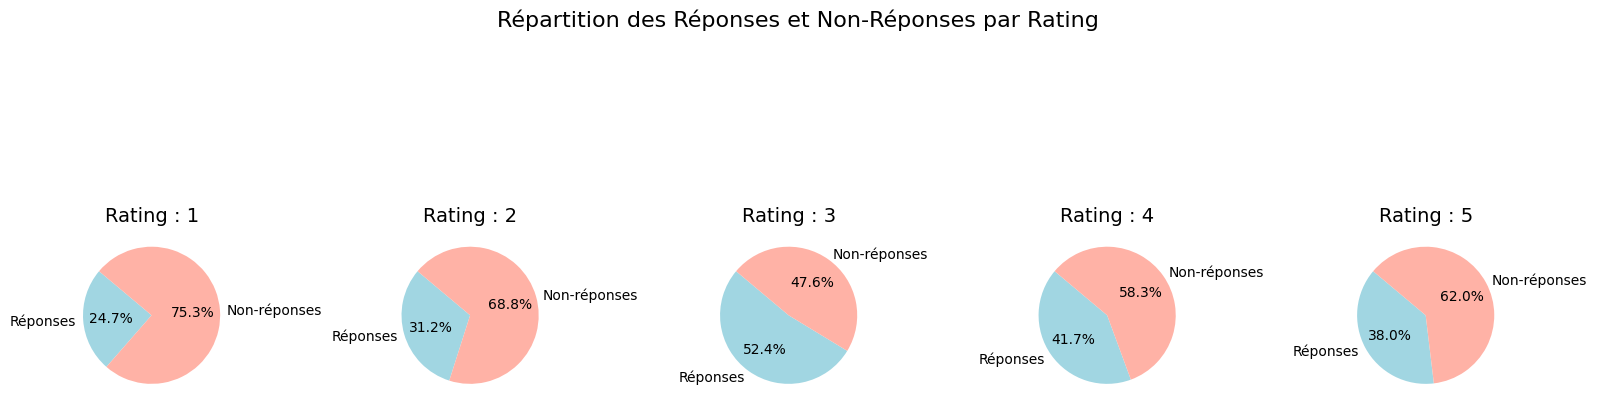

In [32]:
# Préparation des données
rating_response_counts = df_reviews.groupby(['rating', df_reviews['response_date'].notna()]).size().unstack()
rating_response_counts = rating_response_counts.fillna(0).astype(int)

# Création des camemberts
ratings = rating_response_counts.index  # Liste des ratings
colors = ['#A1D6E2', '#FFB2A6']  # Couleurs pastel

fig, axes = plt.subplots(1, len(ratings), figsize=(16, 6), subplot_kw={'aspect': 'equal'})

for i, rating in enumerate(ratings):
    ax = axes[i]
    sizes = rating_response_counts.loc[rating]
    labels = ['Réponses', 'Non-réponses']
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
    ax.set_title(f"Rating : {rating}", fontsize=14)

# Titre général
plt.suptitle("Répartition des Réponses et Non-Réponses par Rating", fontsize=16)
plt.tight_layout()

#### Reviews

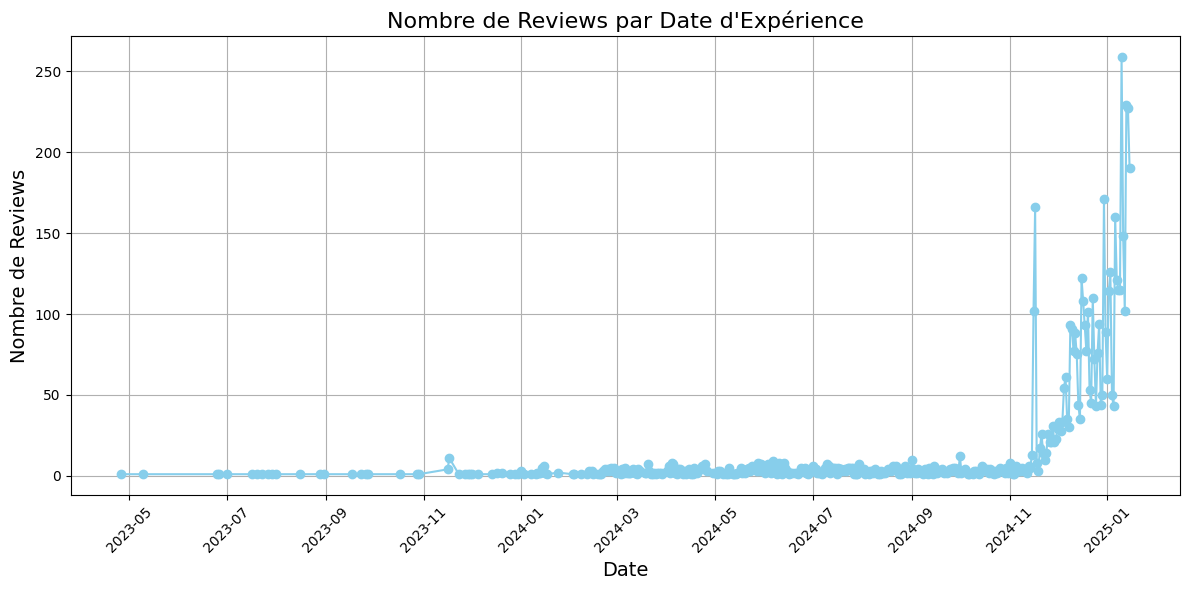

In [33]:
# Groupement des reviews par date
grouped_reviews = df_reviews.groupby('experience_date').size()

# Transformation de l'index pour que ce soit lisible
grouped_reviews.index = pd.to_datetime(grouped_reviews.index, format='%d-%m-%Y', errors='coerce')

# Tri des données par date
grouped_reviews = grouped_reviews.sort_index()

# Visualisation de la distribution
plt.figure(figsize=(12, 6))
plt.plot(grouped_reviews.index, grouped_reviews.values, marker='o', color='skyblue')
plt.title('Nombre de Reviews par Date d\'Expérience', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nombre de Reviews', fontsize=14)

# Rotation des dates
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


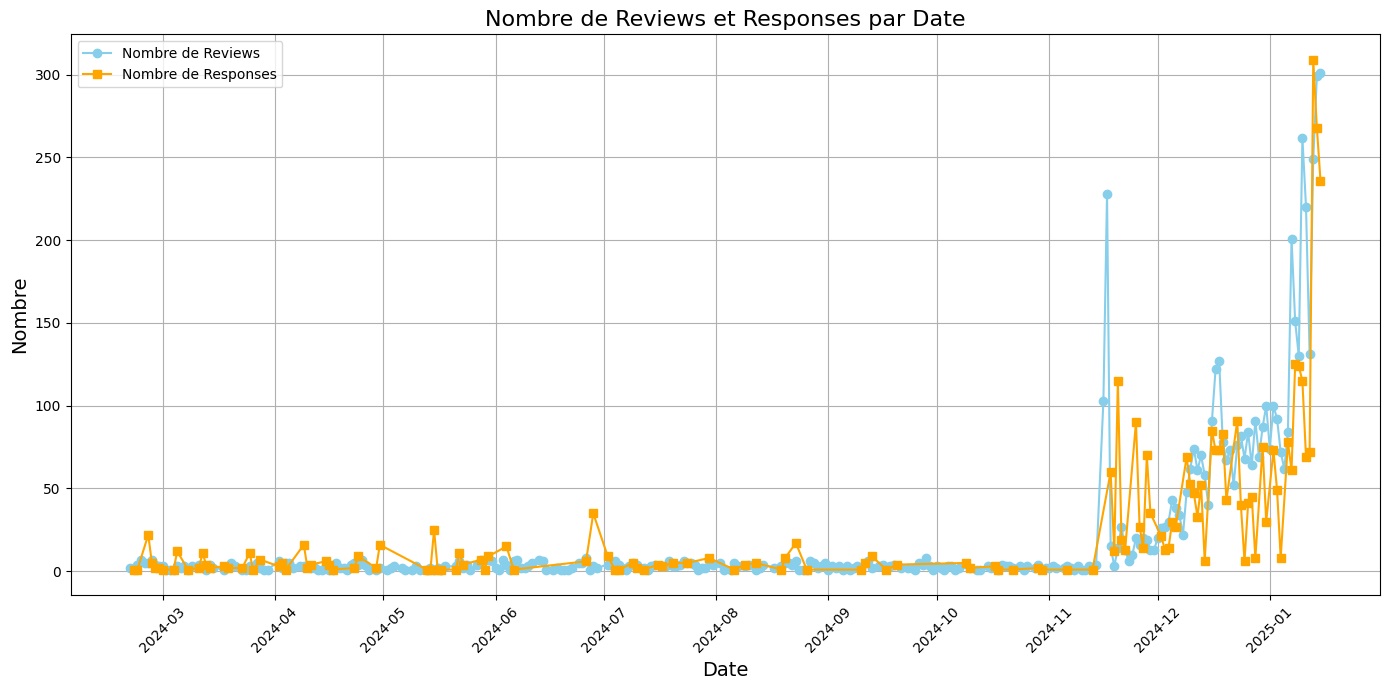

In [34]:
# Groupement des reviews par "review_date"
grouped_reviews = df_reviews.groupby('review_date').size()

# Transformation de l'index pour que ce soit lisible
grouped_reviews.index = pd.to_datetime(grouped_reviews.index, format='%d-%m-%Y', errors='coerce')

# Groupement des responses par "response_date"
grouped_responses = df_reviews.groupby('response_date').size()

# Transformation de l'index pour que ce soit lisible
grouped_responses.index = pd.to_datetime(grouped_responses.index, format='%d-%m-%Y', errors='coerce')

# Tri des données par date
grouped_reviews = grouped_reviews.sort_index()
grouped_responses = grouped_responses.sort_index()

# Visualisation de la distribution
plt.figure(figsize=(14, 7))

# Plot des reviews
plt.plot(grouped_reviews.index, grouped_reviews.values, marker='o', label='Nombre de Reviews', color='skyblue')

# Plot des responses
plt.plot(grouped_responses.index, grouped_responses.values, marker='s', label='Nombre de Responses', color='orange')

plt.title('Nombre de Reviews et Responses par Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nombre', fontsize=14)

# Rotation des dates
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

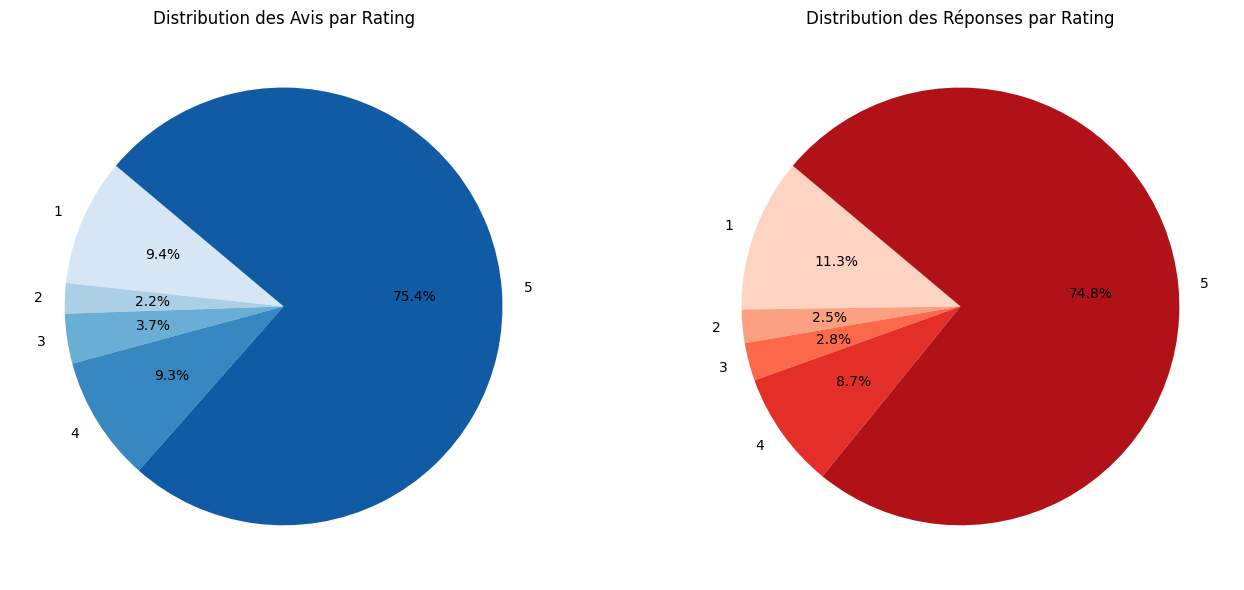

In [35]:
# Groupement des reviews par rating
grouped_reviews_by_rating = df_reviews.groupby('rating').size()

# Groupement des réponses par rating
grouped_responses_by_rating = df_reviews[df_reviews['response'].notnull()].groupby('rating').size()

# Affichage des informations dans les deux pie charts
plt.figure(figsize=(14, 6))

# Pie chart pour les avis
plt.subplot(1, 2, 1)
plt.pie(grouped_reviews_by_rating, labels=grouped_reviews_by_rating.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(grouped_reviews_by_rating)))
plt.title('Distribution des Avis par Rating')

# Pie chart pour les réponses
plt.subplot(1, 2, 2)
plt.pie(grouped_responses_by_rating, labels=grouped_responses_by_rating.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Reds', len(grouped_responses_by_rating)))
plt.title('Distribution des Réponses par Rating')

# Ajuster l’affichage et la légende
plt.tight_layout()
plt.show()

<Axes: >

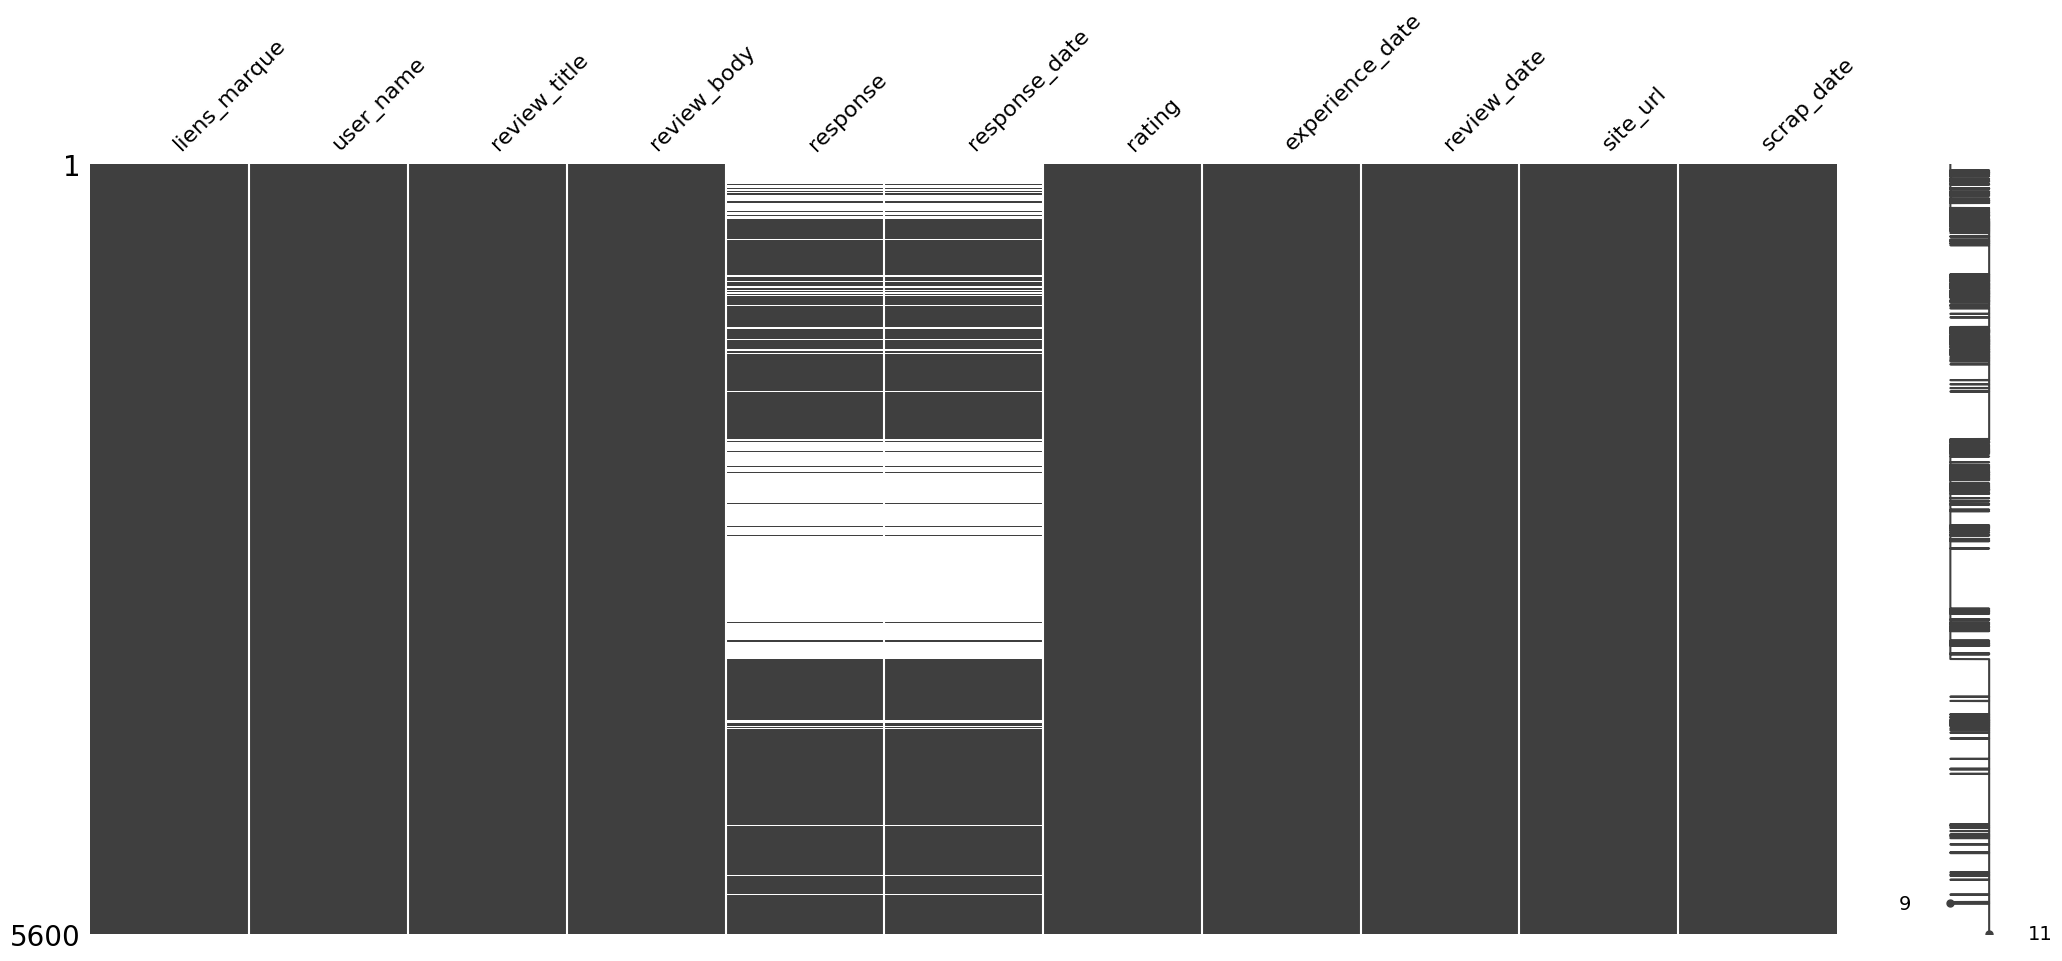

In [36]:
import missingno as msn
msn.matrix(df_reviews)

## Merge dataset brands et reviews

In [37]:
# Fusionner df_reviews et df_brands sur la colonne 'link'
data = pd.merge(df_reviews, df_brands, on='liens_marque', how='left')

# Afficher les premières lignes du DataFrame fusionné
data.head()

liens_marque user_name  \
0  www.younited-credit.com       GUY   
1  www.younited-credit.com  Masselot   
2  www.younited-credit.com   cliente   
3  www.younited-credit.com     Hondo   
4  www.younited-credit.com     Sonia   

                               review_title  \
0                                   MERCI !   
1               Rapide , simple et efficace   
2          Réponse ultra rapide et surtout…   
3             Rapport service client au top   
4  Elle m'a permise de réaliser mon projet…   

                                         review_body response response_date  \
0  Bonjour je mets 5 étoiles car j'ai eu toute l'...     None           NaT   
1  Très accessible , il suffit de bien répondre e...     None           NaT   
2  Réponse ultra rapide et surtout accessible san...     None           NaT   
3  Rapport service client au top , joignable à l’...     None           NaT   
4  Elle m'a permise de réaliser mon projet de lon...     None           NaT   

   rating experience_date review_date  \
0       5      2025-01-09  2025-01-15   
1       5      2025-01-06  2025-01-14   
2       5      2025-01-03  2025-01-10   
3       5      2025-01-07  2025-01-15   
4       5      2025-01-10  2025-01-15   

                                            site_url scrap_date  \
0  https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
1  https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
2  https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
3  https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
4  https://fr.trustpilot.com/review/www.younited-... 2025-01-15   

            marque categorie  reviews pays  trust_score  
0  Younited Credit      bank    69598   FR          4.7  
1  Younited Credit      bank    69598   FR          4.7  
2  Younited Credit      bank    69598   FR          4.7  
3  Younited Credit      bank    69598   FR          4.7  
4  Younited Credit      bank    69598   FR          4.7

In [38]:
data.shape

(5600, 16)

<Axes: >

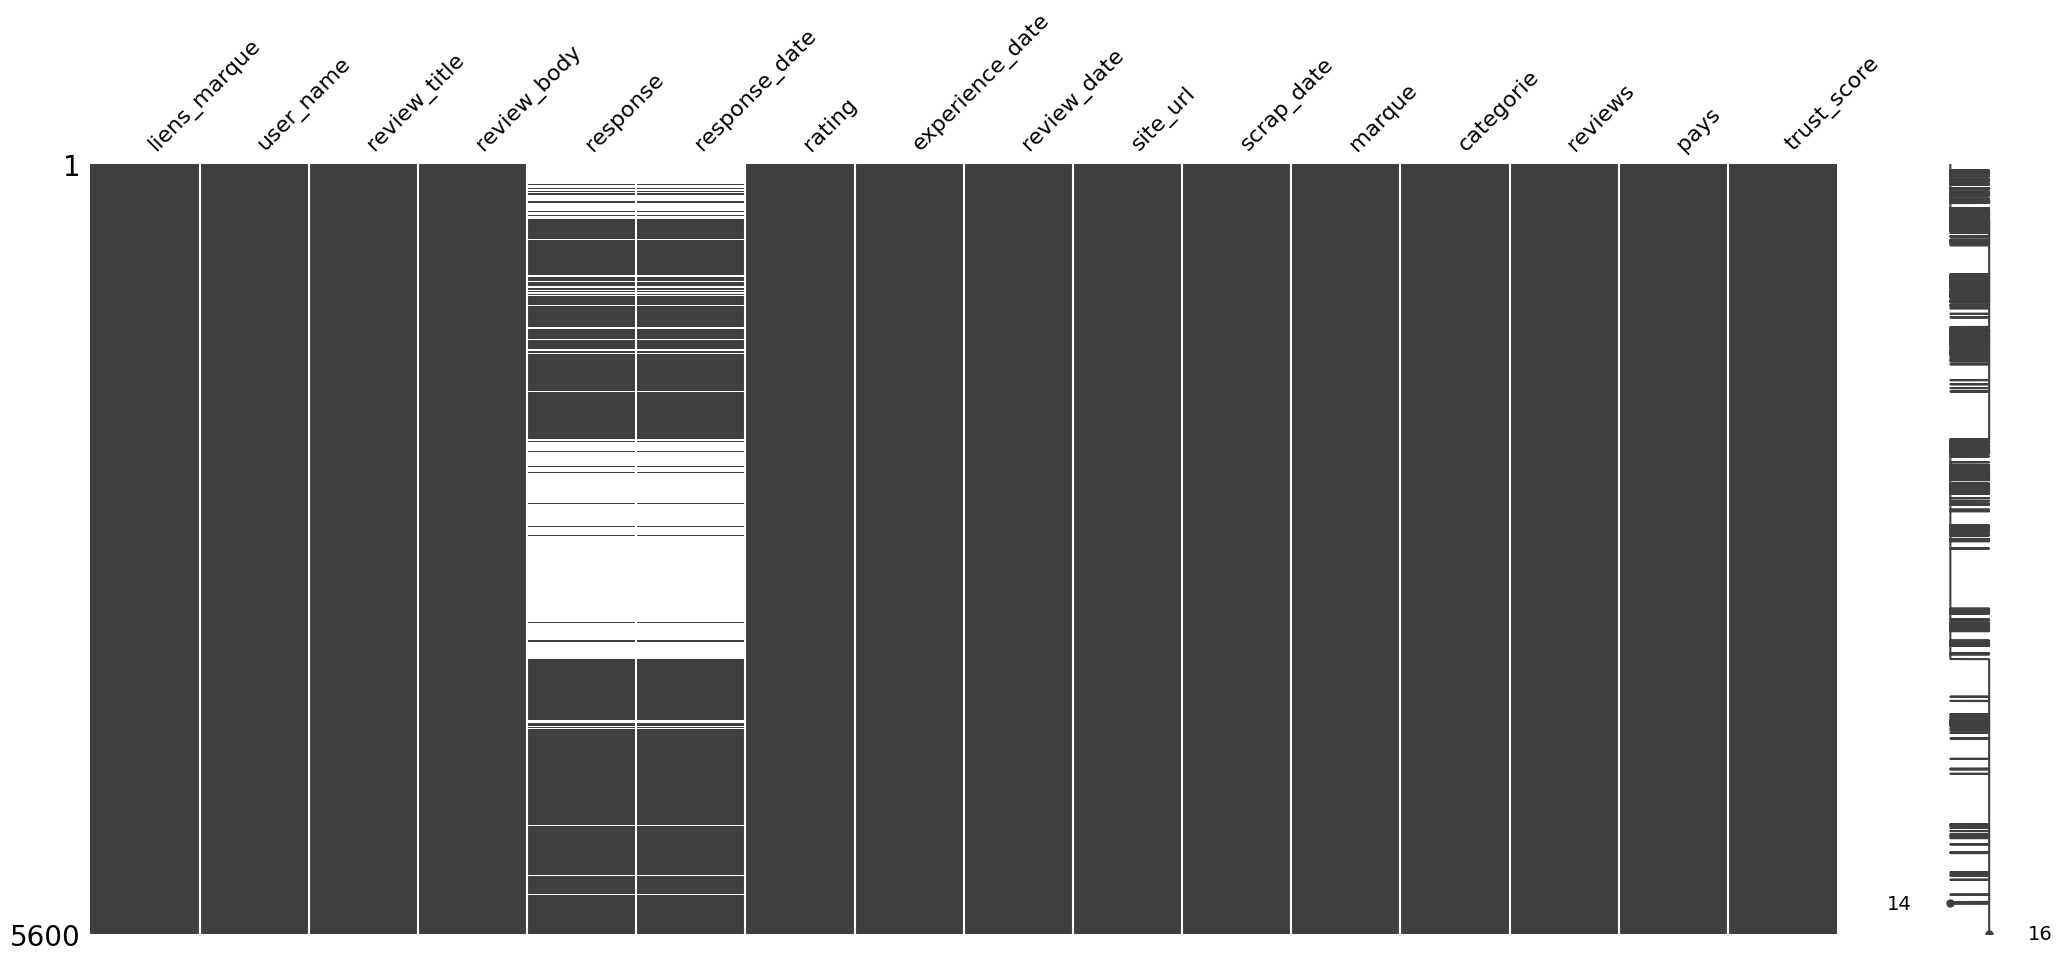

In [39]:
msn.matrix(data)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   liens_marque     5600 non-null   object        
 1   user_name        5600 non-null   object        
 2   review_title     5600 non-null   object        
 3   review_body      5600 non-null   object        
 4   response         3501 non-null   object        
 5   response_date    3501 non-null   datetime64[ns]
 6   rating           5600 non-null   int64         
 7   experience_date  5600 non-null   datetime64[ns]
 8   review_date      5600 non-null   datetime64[ns]
 9   site_url         5600 non-null   object        
 10  scrap_date       5600 non-null   datetime64[ns]
 11  marque           5600 non-null   object        
 12  categorie        5600 non-null   object        
 13  reviews          5600 non-null   int64         
 14  pays             5600 non-null   object 

In [41]:
data.columns

Index(['liens_marque', 'user_name', 'review_title', 'review_body', 'response',
       'response_date', 'rating', 'experience_date', 'review_date', 'site_url',
       'scrap_date', 'marque', 'categorie', 'reviews', 'pays', 'trust_score'],
      dtype='object')

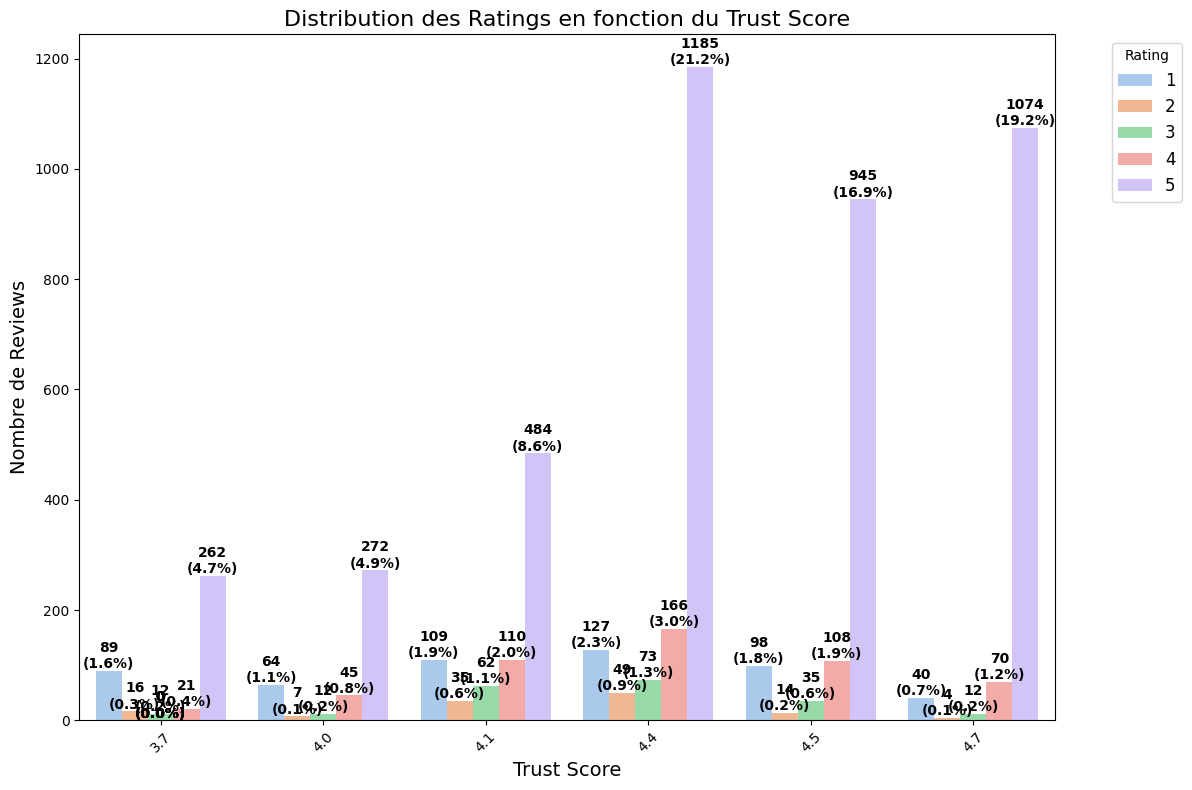

In [42]:
# Préparation des données : regroupement des ratings par trust_score
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='trust_score', hue='rating', data=data, palette='pastel')

# Titres et étiquettes
plt.title("Distribution des Ratings en fonction du Trust Score", fontsize=16)
plt.xlabel("Trust Score", fontsize=14)
plt.ylabel("Nombre de Reviews", fontsize=14)

# Affichage des annotations
for p in ax.patches:
    count = int(p.get_height())  # Nombre de reviews
    percentage = 100 * count / len(data)  # Pourcentage des reviews
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(
        f'{count}\n({percentage:.1f}%)', 
        (x, y), 
        ha='center', 
        fontsize=10, 
        fontweight='bold'
    )

plt.xticks(rotation=45)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

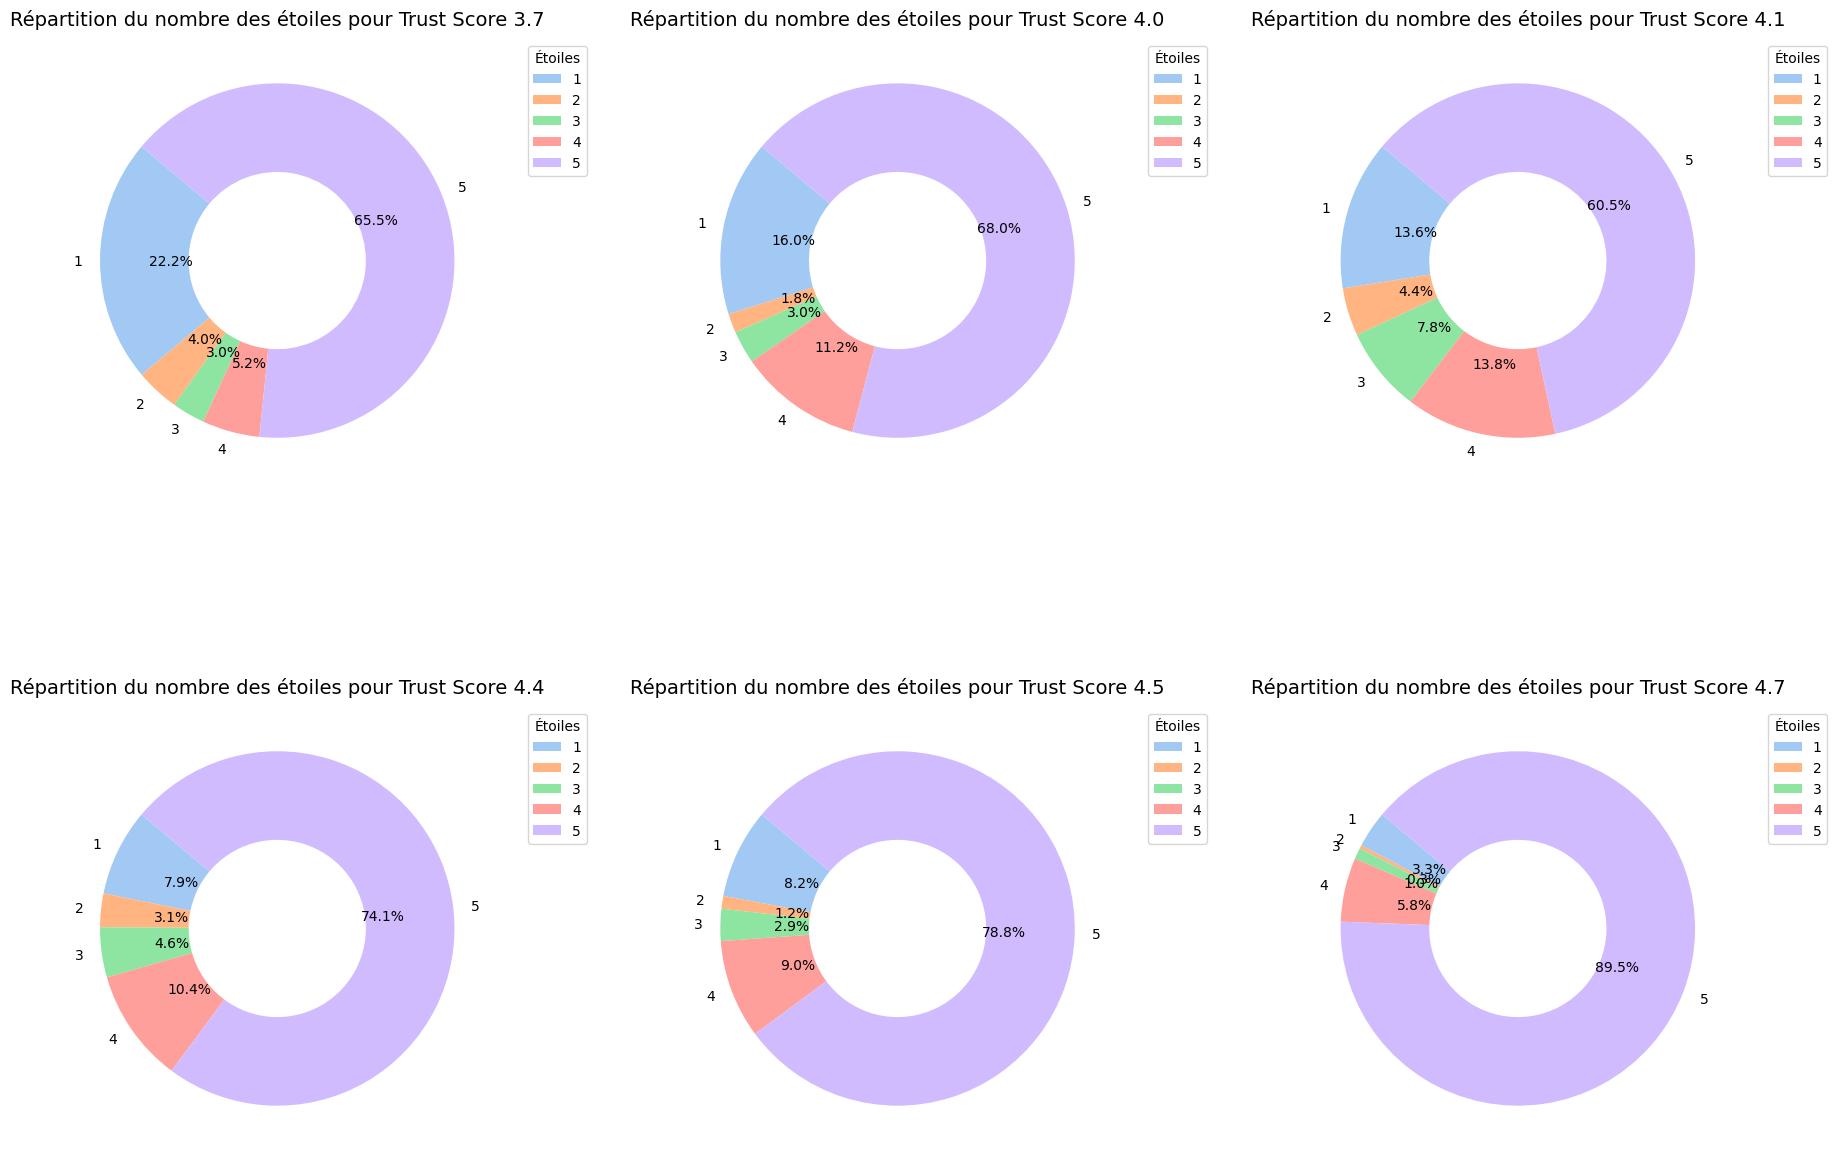

In [43]:
# Préparation des données : groupement des ratings par trust_score
trust_score_counts = data.groupby('trust_score')['rating'].value_counts(normalize=True).unstack().fillna(0)

# Nombre de pie charts à afficher
num_plots = len(trust_score_counts)

# Calculer le nombre de lignes et colonnes pour l'affichage
n_cols = 3  # Nombre de colonnes
n_rows = (num_plots // n_cols) + (num_plots % n_cols != 0)  # Nombre de lignes

# Création de la figure avec subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()  # Aplatir les axes pour pouvoir utiliser un index simple

# Diagramme en camembert pour chaque trust_score
for idx, trust_score in enumerate(trust_score_counts.index):
    sizes = trust_score_counts.loc[trust_score]  
    labels = ['1', '2', '3', '4', '5']
    colors = sns.color_palette('pastel')  # Couleurs pastel
    
    # Plotting pie chart
    ax = axes[idx]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 10}, wedgeprops=dict(width=0.5))
    ax.set_title(f"Répartition du nombre des étoiles pour Trust Score {trust_score}", fontsize=14, pad=10)
    
    # Ajouter légende
    ax.legend(title="Étoiles", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Ajustement de la mise en page
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Espacement entre les plots
plt.show()

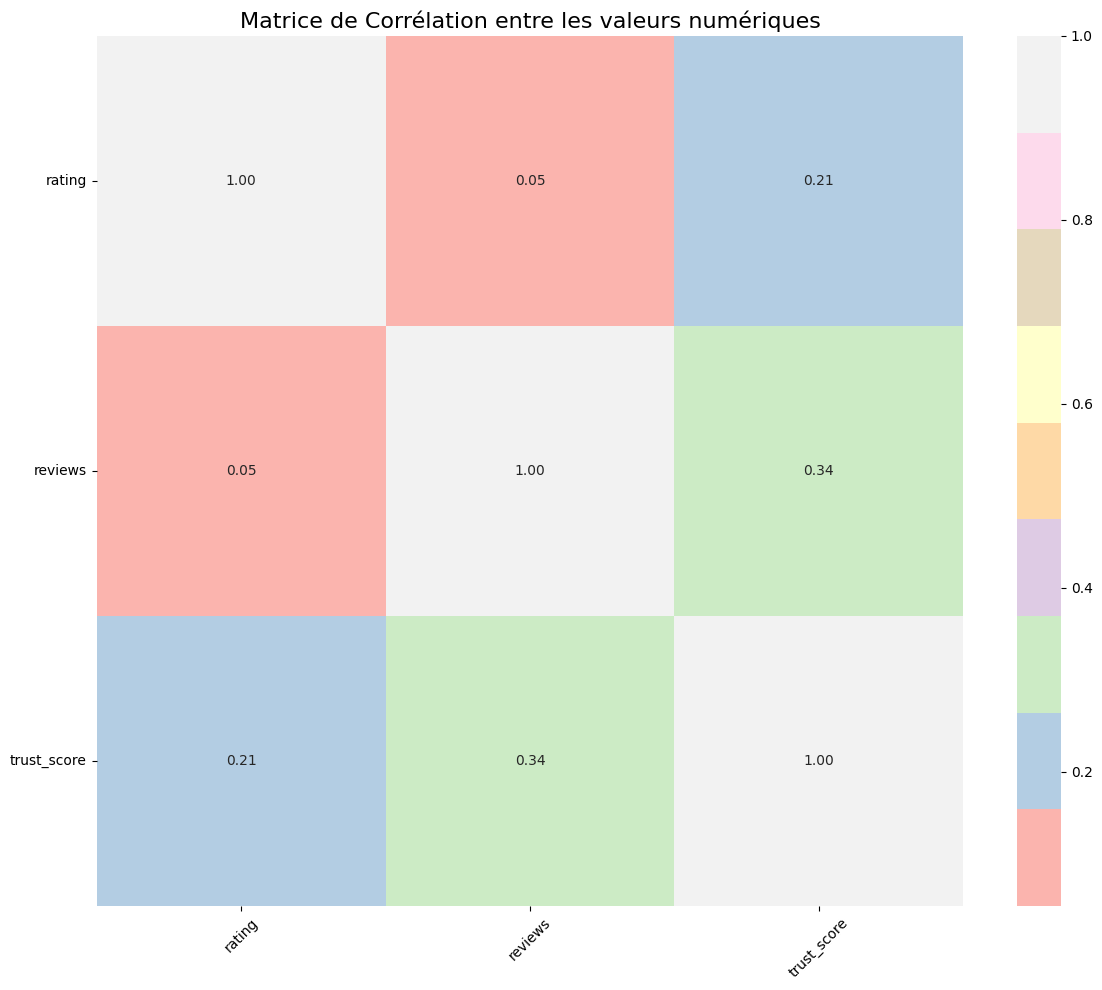

In [44]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation pour les valeurs numériques
correlation_matrix_numeric = numeric_data.corr(method='pearson')

# Affichage de la matrice de corrélation sous forme de heatmap avec couleurs pastel
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f", cmap='Pastel1', cbar=True)

# Titre du graphique
plt.title("Matrice de Corrélation entre les valeurs numériques", fontsize=16)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [45]:
correlation_matrix_numeric

rating   reviews  trust_score
rating       1.000000  0.054006     0.213181
reviews      0.054006  1.000000     0.335189
trust_score  0.213181  0.335189     1.000000

La corrélation entre rating et trust_score est modérée avec un coefficient de 0.21, indiquant une relation positive.

La corrélation entre reviews et trust_score est plus forte à 0.34, montrant une tendance positive plus marquée.

Les corrélations entre rating et `reviews sont faibles avec un coefficient de 0.05, suggérant peu de lien direct entre ces deux variables.

In [46]:
sns.countplot(x='exp_month', data=data)
plt.xlabel("\nMois de l'achat")
plt.title("Nombre d'achat au cours des mois")

ValueError: Could not interpret value `exp_month` for `x`. An entry with this name does not appear in `data`.

In [ ]:
sns.countplot(x='review_month', data=data)
plt.xlabel('\nMois du commentaire')
plt.title('Nombre de commentaire au cours des mois')

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='review_month', hue='rating', data=data)
plt.xlabel('\nMois du commentaire')
plt.title('Répartition des notes au cours des mois')

# **Features engineering**


Nous allons créer de nouvelles features pour le temps passé entre l'expérience, la revue et la réponse.

Il peut être pertinent d'enrichir l'échantillon par un ajout de variables spécifiques à la problématique métier.on pourra mener les modélisations avec une étape de features selection qui déterminera la pertinence de ces variables, ainsi que toutes les autres variables de l'échantillon.

In [49]:
data.columns

Index(['liens_marque', 'user_name', 'review_title', 'review_body', 'response',
       'response_date', 'rating', 'experience_date', 'review_date', 'site_url',
       'scrap_date', 'marque', 'categorie', 'reviews', 'pays', 'trust_score'],
      dtype='object')

### Reponses

In [50]:
# Créer la colonne cat_response si repons =1 sinon =0
data['cat_response'] = data['response'].apply(lambda x: '1' if pd.notna(x) else '0')
# Vérification rapide de la distribution
print("Distribution des réponses :")
print(data['cat_response'].value_counts())

Distribution des réponses :
cat_response
1    3501
0    2099
Name: count, dtype: int64


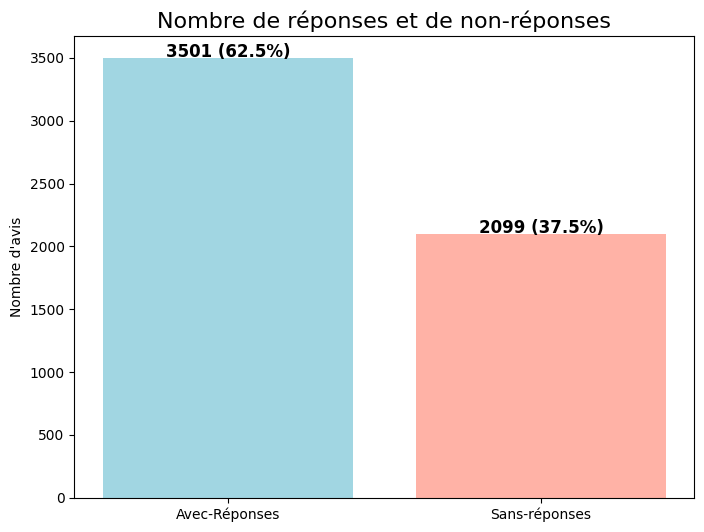

In [51]:
# Calculer les valeurs pour chaque catégorie
response_count = data['cat_response'].value_counts()

# Données pour le graphique
categories = ['Avec-Réponses', 'Sans-réponses']
values = [response_count['1'], response_count['0']]


# Création du graphique
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['#A1D6E2', '#FFB2A6'])

# Ajout des annotations
for i, value in enumerate(values):
    plt.text(i, value + 10, f"{value} ({(value / len(df_reviews) * 100):.1f}%)", 
             ha='center', fontsize=12, fontweight='bold')

# Titres et étiquettes
plt.title("Nombre de réponses et de non-réponses", fontsize=16)
plt.ylabel("Nombre d'avis")
plt.show()


### Differentes delta time , EXP/ REVIEW, REVIEW/RESPONSE

In [52]:
# Calcul de la différence entre experience_date et review_date
data['diff_experience_review'] = (data['review_date'] - data['experience_date']).dt.days

# Calcul de la différence entre review_date et response_date
# Si 'response_date' est None, on considère la date d’aujourd'hui
current_date = pd.to_datetime('today')
data['response_date'].fillna(current_date, inplace=True)
data['diff_review_response'] = (data['response_date'] - data['review_date']).dt.days

<Axes: >

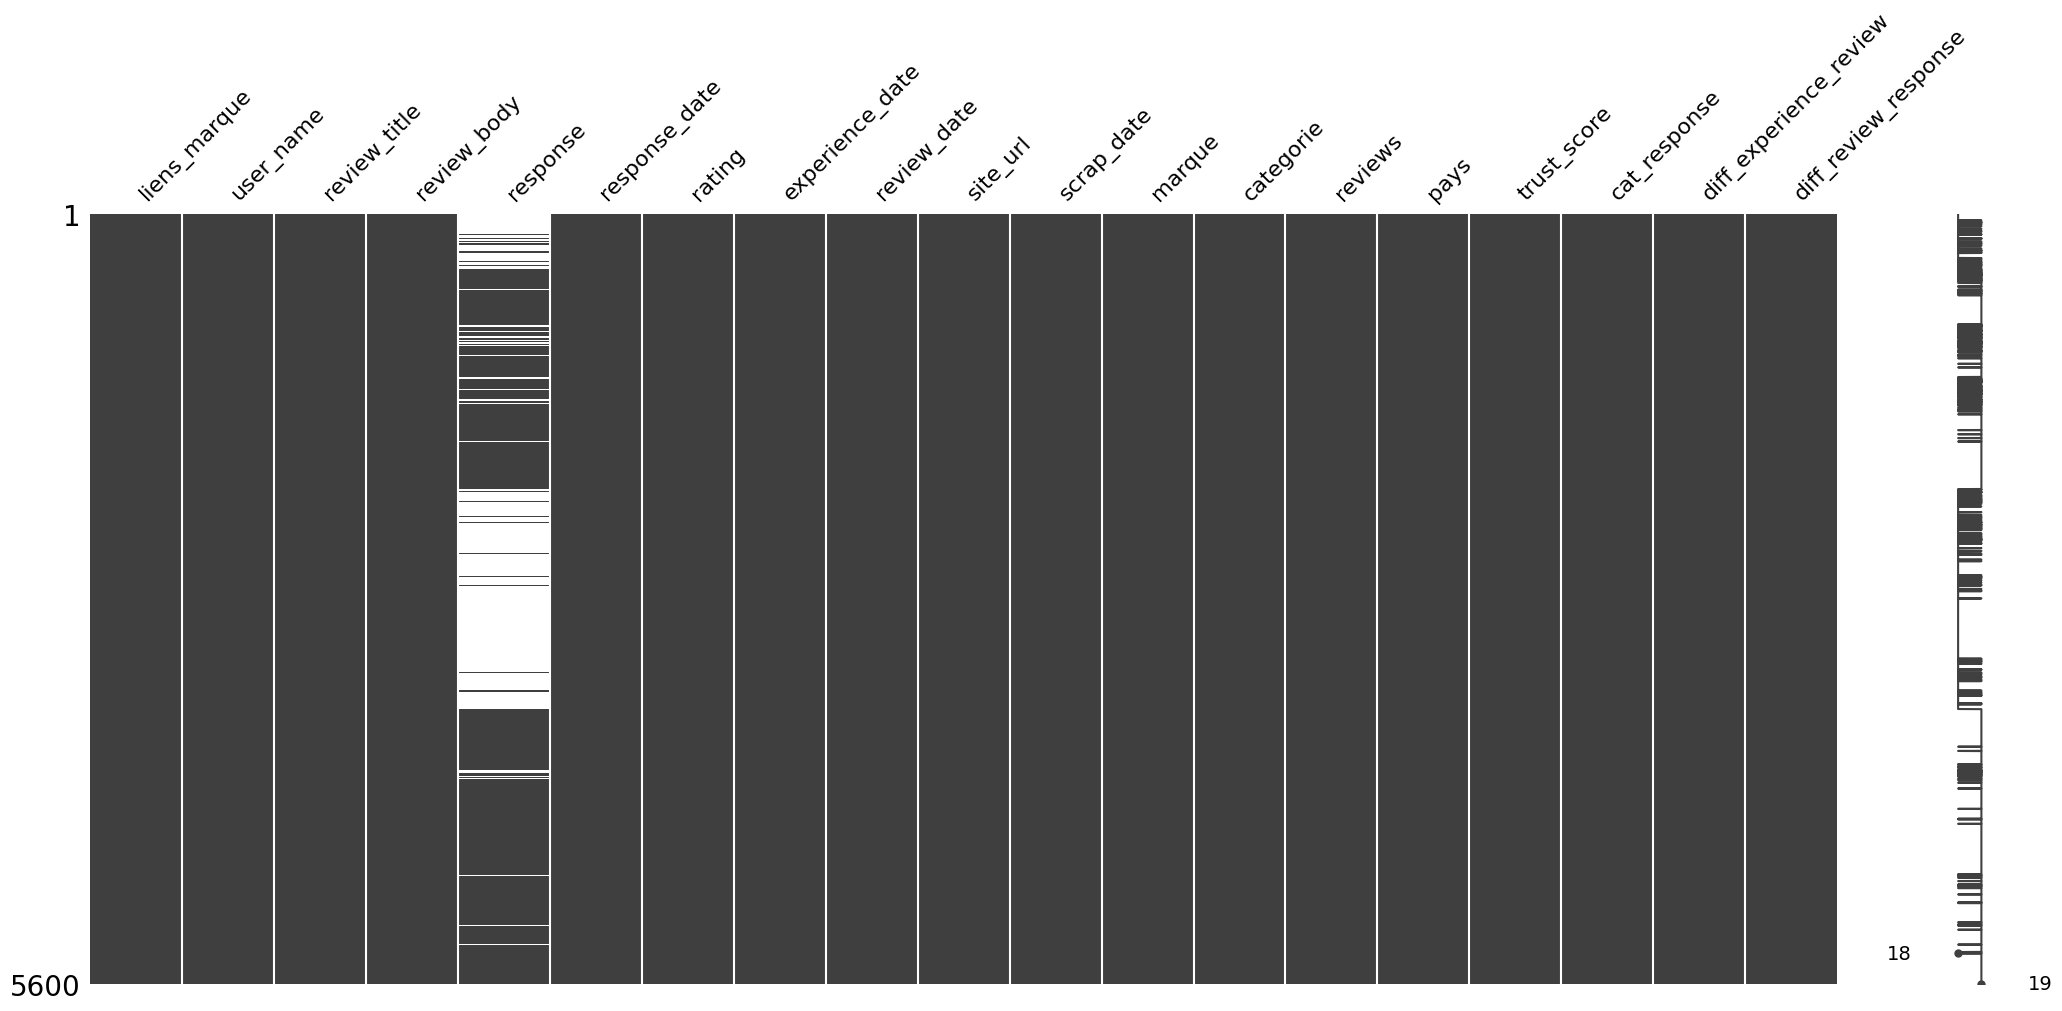

In [53]:
msn.matrix(data)

In [54]:
# Année
data["exp_year"] = data['experience_date'].dt.year
# Mois
data["exp_month"] = data['experience_date'].dt.month
# Jour du mois
data["exp_day"] = data['experience_date'].dt.day
#  jour de la semaine
data['exp_day_of_week'] = data['experience_date'].dt.day_name()
# Année
data["review_year"] = data['review_date'].dt.year
# Mois
data["review_month"] = data['review_date'].dt.month
# Jour du mois
data["review_day"] = data['review_date'].dt.day
#  jour de la semaine
data['review_day_of_week'] = data['review_date'].dt.day_name()

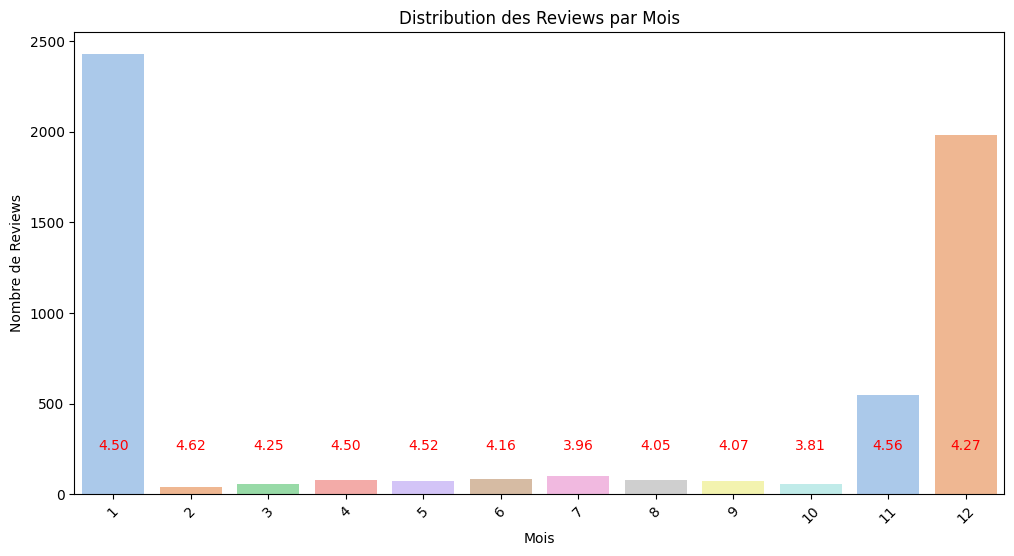

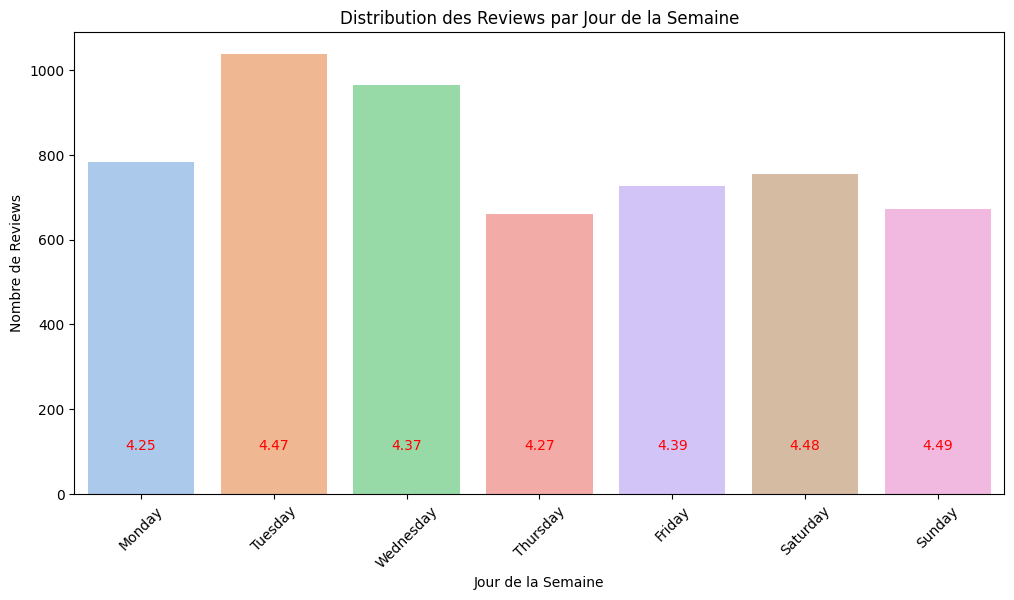

In [55]:

# Calcul de la moyenne des ratings par mois
mean_ratings_by_month = data.groupby('review_month')['rating'].mean().reset_index()
mean_ratings_by_month.columns = ['review_month', 'mean_rating']

# Définir l'ordre des jours de la semaine
ordre_jours = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertir la colonne en type catégorie avec l'ordre spécifié
data['review_day_of_week'] = pd.Categorical(data['review_day_of_week'], 
                                          categories=ordre_jours, 
                                          ordered=True)

# Calcul de la moyenne des ratings par jour de la semaine
mean_ratings_by_day = data.groupby('review_day_of_week')['rating'].mean().reset_index()
mean_ratings_by_day.columns = ['review_day_of_week', 'mean_rating']

# Visualisation de la distribution des reviews par mois avec la moyenne
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='review_month', data=data, palette='pastel')
plt.title("Distribution des Reviews par Mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de Reviews")
plt.xticks(rotation=45)

# Ajouter la moyenne sur chaque mois - correction du décalage
for i, row in mean_ratings_by_month.iterrows():
    ax.text(i, max(data.groupby('review_month').size()) * 0.1, 
            f'{row["mean_rating"]:.2f}', 
            ha='center',  # centrage horizontal
            fontsize=10, 
            color='red')

plt.show()

# Visualisation de la distribution des reviews par jour de la semaine avec la moyenne
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='review_day_of_week', data=data, palette='pastel')
plt.title("Distribution des Reviews par Jour de la Semaine")
plt.xlabel("Jour de la Semaine")
plt.ylabel("Nombre de Reviews")
plt.xticks(rotation=45)

# Ajouter la moyenne sur chaque jour - correction du décalage
for i, row in mean_ratings_by_day.iterrows():
    ax.text(i, max(data.groupby('review_day_of_week').size()) * 0.1,
            f'{row["mean_rating"]:.2f}', 
            ha='center',  # centrage horizontal
            fontsize=10, 
            color='red')

plt.show()


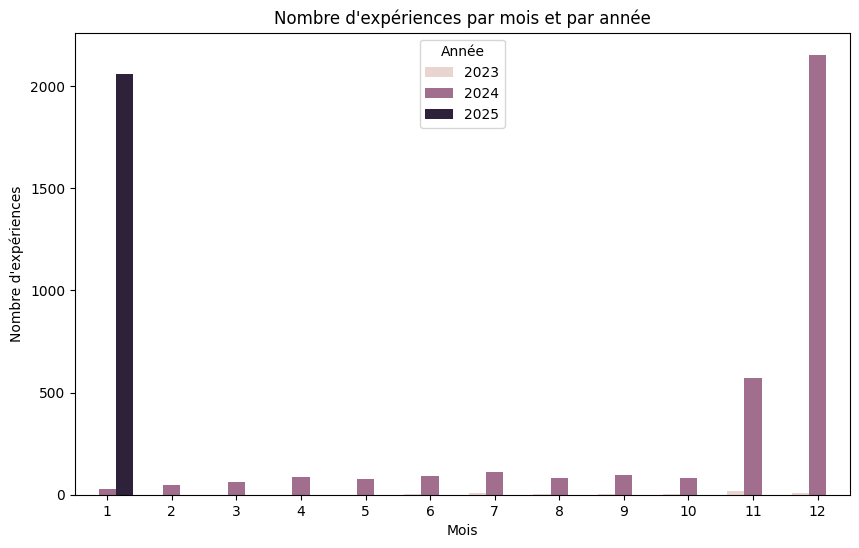

In [56]:
df_grouped = data.groupby(['exp_year', 'exp_month']).size().reset_index(name='experience_count')

# Créer un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='exp_month', y='experience_count', hue='exp_year', data=df_grouped)

# Ajouter des titres et labels
plt.title('Nombre d\'expériences par mois et par année')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'expériences')
plt.legend(title='Année')

# Afficher le graphique
plt.show()

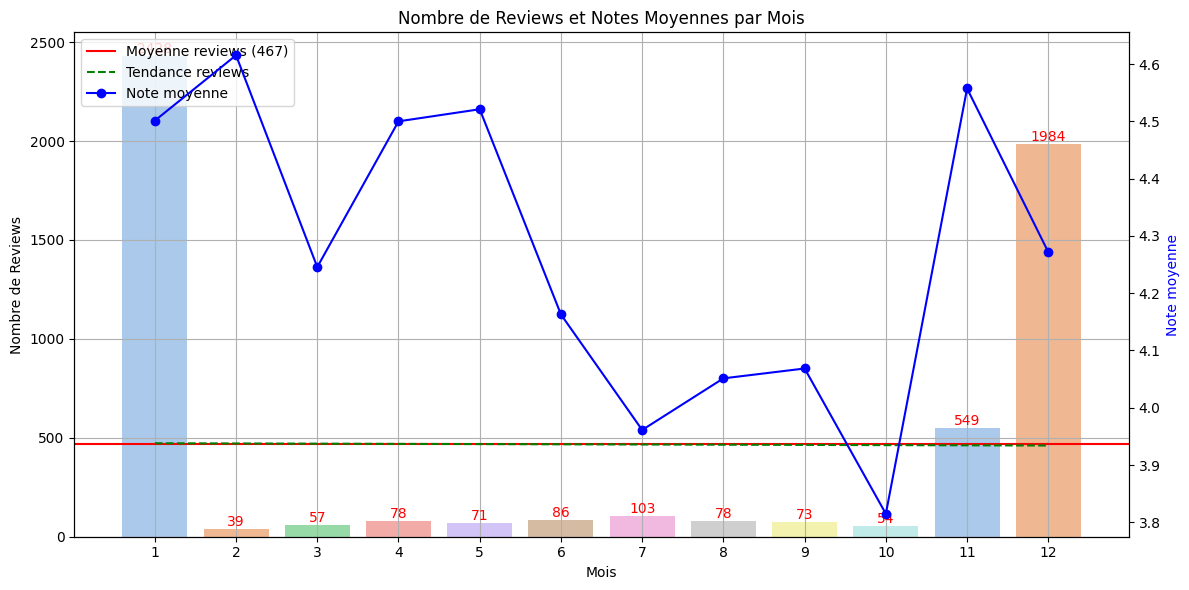

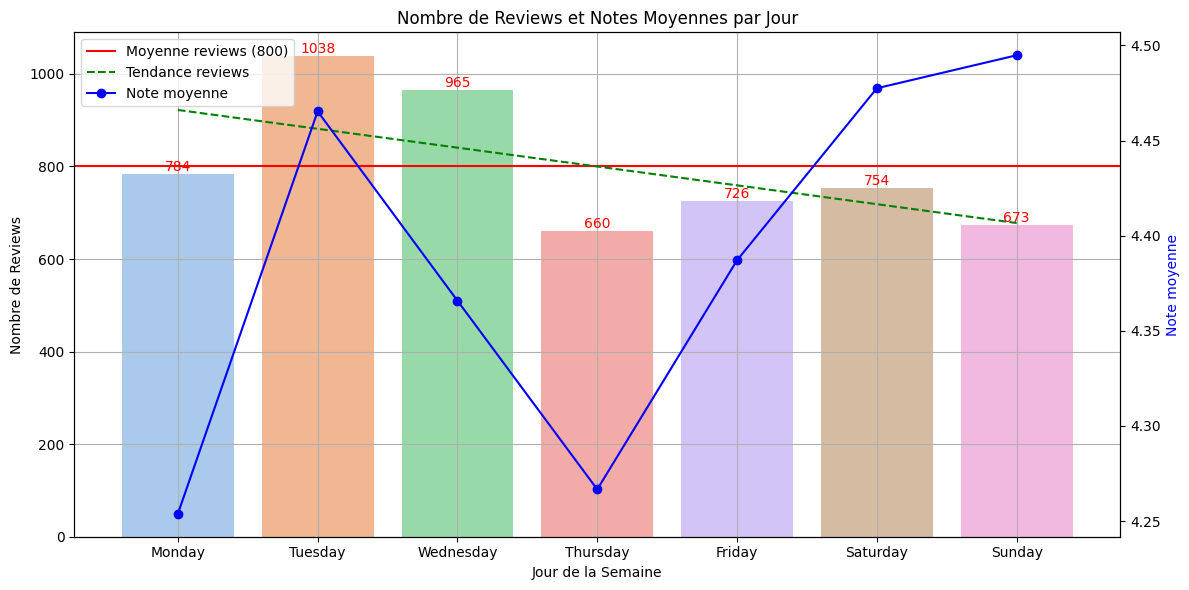

In [57]:
# Comptage du nombre de reviews par mois et par jour
count_reviews_by_month = data.groupby('review_month')['rating'].count().reset_index()
count_reviews_by_month.columns = ['review_month', 'count_reviews']

count_reviews_by_day = data.groupby('review_day_of_week')['rating'].count().reset_index()
count_reviews_by_day.columns = ['review_day_of_week', 'count_reviews']

# Calcul des moyennes des ratings
mean_ratings_by_month = data.groupby('review_month')['rating'].mean().reset_index()
mean_ratings_by_day = data.groupby('review_day_of_week')['rating'].mean().reset_index()

# Visualisation par mois
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barplot pour le nombre de reviews
sns.barplot(x='review_month', y='count_reviews', data=count_reviews_by_month, palette='pastel', ax=ax1)

# Création d'un deuxième axe pour les moyennes
ax2 = ax1.twinx()
ax2.plot(mean_ratings_by_month.index, mean_ratings_by_month['rating'], 'bo-', label='Note moyenne')

# Ajout de la ligne de moyenne du nombre de reviews
moyenne_reviews = count_reviews_by_month['count_reviews'].mean()
ax1.axhline(y=moyenne_reviews, color='r', linestyle='-', label=f'Moyenne reviews ({moyenne_reviews:.0f})')

# Ajout de la ligne de tendance du nombre de reviews
x = np.arange(len(count_reviews_by_month))
z = np.polyfit(x, count_reviews_by_month['count_reviews'], 1)
p = np.poly1d(z)
ax1.plot(x, p(x), "g--", label='Tendance reviews')

# Configuration des axes et labels
ax1.set_title("Nombre de Reviews et Notes Moyennes par Mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de Reviews", color='black')
ax2.set_ylabel("Note moyenne", color='blue')
plt.xticks(rotation=45)
ax1.grid(True)

# Affichage des nombres sur les barres
for i, row in count_reviews_by_month.iterrows():
    ax1.text(i, row['count_reviews'], 
             f'{row["count_reviews"]:.0f}', 
             ha='center',
             va='bottom',
             fontsize=10, 
             color='red')

# Légendes combinées
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Visualisation par jour de la semaine
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barplot pour le nombre de reviews
sns.barplot(x='review_day_of_week', y='count_reviews', data=count_reviews_by_day, palette='pastel', ax=ax1)

# Création d'un deuxième axe pour les moyennes
ax2 = ax1.twinx()
ax2.plot(mean_ratings_by_day.index, mean_ratings_by_day['rating'], 'bo-', label='Note moyenne')

# Ajout de la ligne de moyenne du nombre de reviews
moyenne_reviews = count_reviews_by_day['count_reviews'].mean()
ax1.axhline(y=moyenne_reviews, color='r', linestyle='-', label=f'Moyenne reviews ({moyenne_reviews:.0f})')

# Ajout de la ligne de tendance du nombre de reviews
x = np.arange(len(count_reviews_by_day))
z = np.polyfit(x, count_reviews_by_day['count_reviews'], 1)
p = np.poly1d(z)
ax1.plot(x, p(x), "g--", label='Tendance reviews')

# Configuration des axes et labels
ax1.set_title("Nombre de Reviews et Notes Moyennes par Jour")
ax1.set_xlabel("Jour de la Semaine")
ax1.set_ylabel("Nombre de Reviews", color='black')
ax2.set_ylabel("Note moyenne", color='blue')
plt.xticks(rotation=45)
ax1.grid(True)

# Affichage des nombres sur les barres
for i, row in count_reviews_by_day.iterrows():
    ax1.text(i, row['count_reviews'], 
             f'{row["count_reviews"]:.0f}', 
             ha='center',
             va='bottom',
             fontsize=10, 
             color='red')

# Légendes combinées
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [58]:
# Remplacement des jours par des chiffres dans la colonne 'review_day' on passe de jour du mois au jour de la semaine
data['review_day'] = data['review_day_of_week'].map(day_map)
data['exp_day'] = data['exp_day_of_week'].map(day_map)
# Affichage des premières lignes pour vérifier la transformation
print(data[['review_day_of_week', 'review_day', 'exp_day', 'exp_day_of_week']].head())

  review_day_of_week review_day  exp_day exp_day_of_week
0          Wednesday          3        4        Thursday
1            Tuesday          2        1          Monday
2             Friday          5        5          Friday
3          Wednesday          3        2         Tuesday
4          Wednesday          3        5          Friday


In [59]:
data.head(3)

liens_marque user_name                      review_title  \
0  www.younited-credit.com       GUY                           MERCI !   
1  www.younited-credit.com  Masselot       Rapide , simple et efficace   
2  www.younited-credit.com   cliente  Réponse ultra rapide et surtout…   

                                         review_body response  \
0  Bonjour je mets 5 étoiles car j'ai eu toute l'...     None   
1  Très accessible , il suffit de bien répondre e...     None   
2  Réponse ultra rapide et surtout accessible san...     None   

               response_date  rating experience_date review_date  \
0 2025-02-26 16:48:29.947347       5      2025-01-09  2025-01-15   
1 2025-02-26 16:48:29.947347       5      2025-01-06  2025-01-14   
2 2025-02-26 16:48:29.947347       5      2025-01-03  2025-01-10   

                                            site_url scrap_date  \
0  https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
1  https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
2  https://fr.trustpilot.com/review/www.younited-... 2025-01-15   

            marque categorie  reviews pays  trust_score cat_response  \
0  Younited Credit      bank    69598   FR          4.7            0   
1  Younited Credit      bank    69598   FR          4.7            0   
2  Younited Credit      bank    69598   FR          4.7            0   

   diff_experience_review  diff_review_response  exp_year  exp_month  exp_day  \
0                       6                    42      2025          1        4   
1                       8                    43      2025          1        1   
2                       7                    47      2025          1        5   

  exp_day_of_week  review_year  review_month review_day review_day_of_week  
0        Thursday         2025             1          3          Wednesday  
1          Monday         2025             1          2            Tuesday  
2          Friday         2025             1          5             Friday

In [60]:
data['review_month'] = pd.to_numeric(data['review_month'], errors='coerce')
data['review_day'] = pd.to_numeric(data['review_day'], errors='coerce')

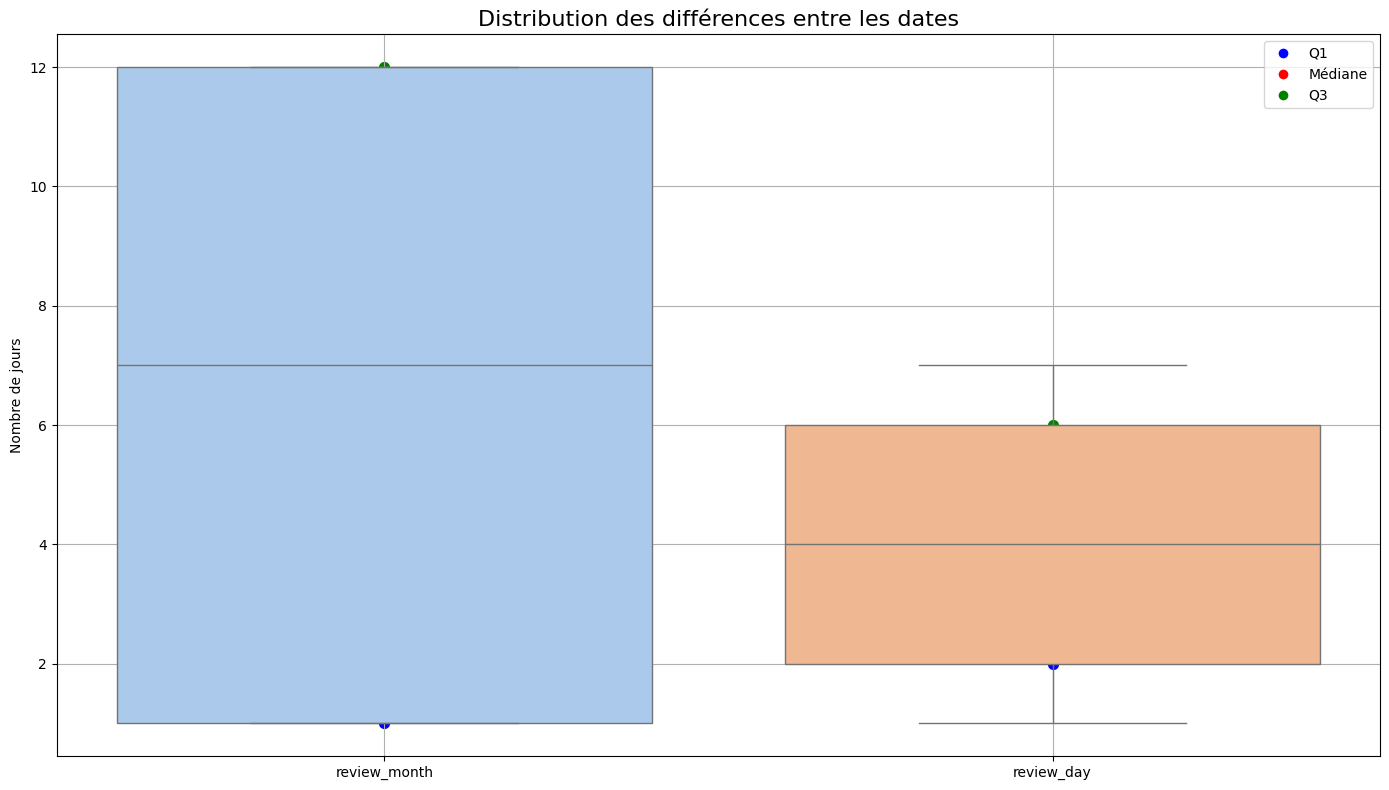

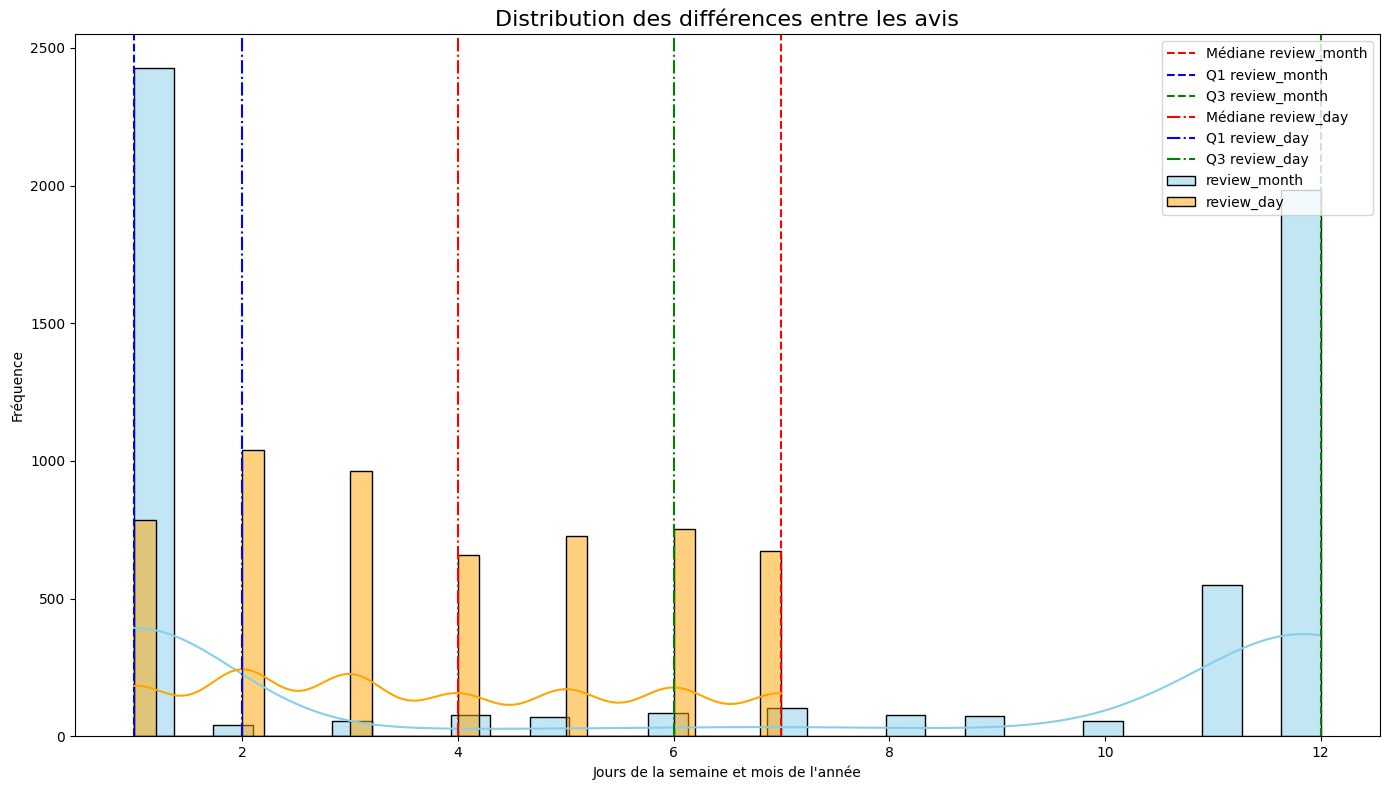

In [61]:
# Création du boxplot pour visualiser la distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[['review_month', 'review_day']], palette='pastel')

# Calcul des quartiles et de la médiane
Q1_review_month = data['review_month'].quantile(0.25)
Q3_review_month = data['review_month'].quantile(0.75)
median_review_month = data['review_month'].median()

Q1_review_day = data['review_day'].quantile(0.25)
Q3_review_day = data['review_day'].quantile(0.75)
median_review_day = data['review_day'].median()

# Ajout des marqueurs pour les quantiles et la médiane
plt.scatter(0, Q1_review_month, color='blue', s=50)
plt.scatter(0, median_review_month, color='red', s=50)
plt.scatter(0, Q3_review_month, color='green', s=50)

plt.scatter(1, Q1_review_day, color='blue', s=50)
plt.scatter(1, median_review_day, color='red', s=50)
plt.scatter(1, Q3_review_day, color='green', s=50)

# Ajout des titres et des axes
plt.title("Distribution des différences entre les dates", fontsize=16)
plt.xticks([0, 1], ['review_month', 'review_day'])
plt.ylabel("Nombre de jours")

# Création d'une légende propre
legend_labels = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Q1'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Médiane'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Q3')
]
plt.legend(handles=legend_labels, loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

# === DEUXIÈME GRAPHIQUE ===
# Histogramme avec densité, moyenne et quantiles
plt.figure(figsize=(14, 8))

sns.histplot(data['review_month'], color='skyblue', kde=True, label='review_month', bins=30)
plt.axvline(median_review_month, color='red', linestyle='--', label='Médiane review_month')
plt.axvline(Q1_review_month, color='blue', linestyle='--', label='Q1 review_month')
plt.axvline(Q3_review_month, color='green', linestyle='--', label='Q3 review_month')

sns.histplot(data['review_day'], color='orange', kde=True, label='review_day', bins=30)
plt.axvline(median_review_day, color='red', linestyle='-.', label='Médiane review_day')
plt.axvline(Q1_review_day, color='blue', linestyle='-.', label='Q1 review_day')
plt.axvline(Q3_review_day, color='green', linestyle='-.', label='Q3 review_day')

# Ajout des titres et axes
plt.title("Distribution des différences entre les avis", fontsize=16)
plt.xlabel("Jours de la semaine et mois de l'année")
plt.ylabel("Fréquence")

plt.legend()
plt.tight_layout()
plt.show()



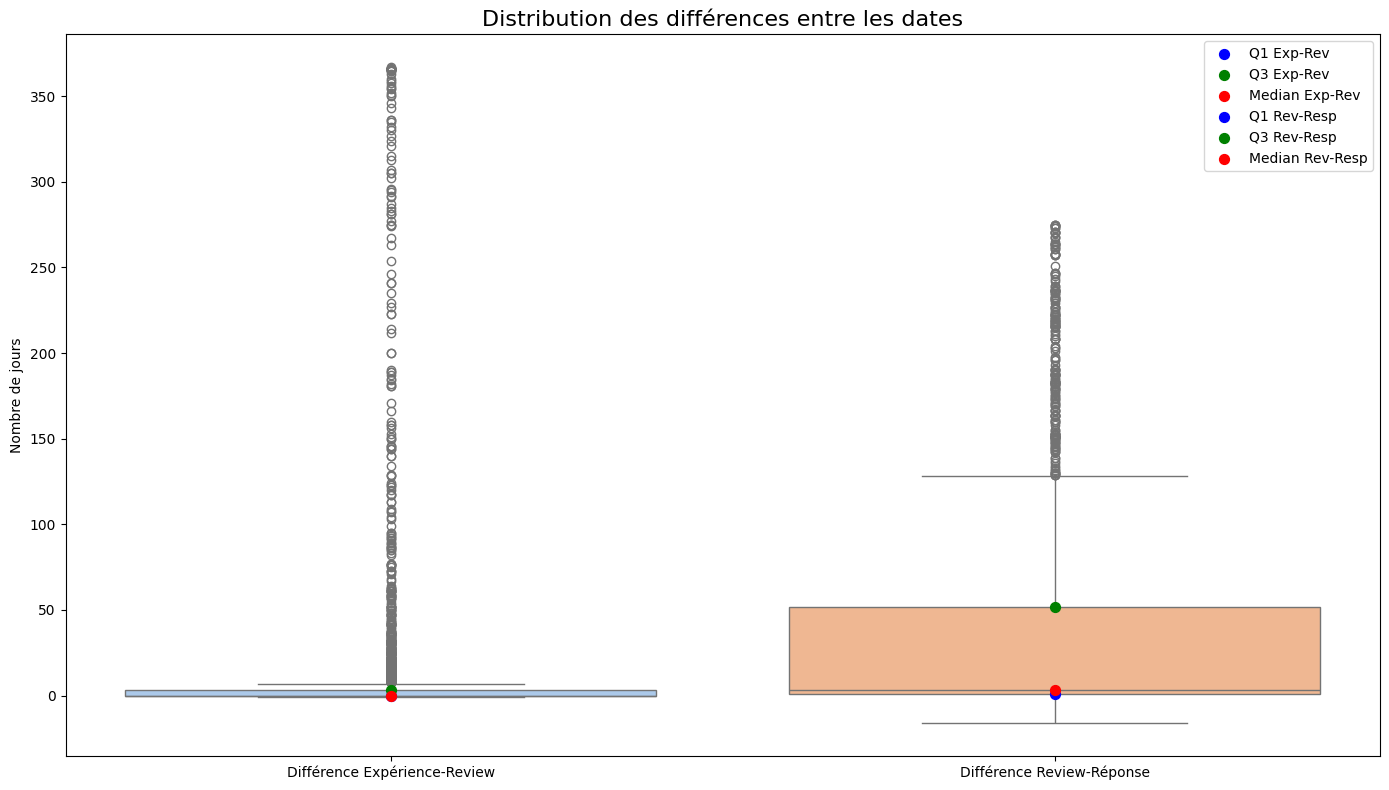

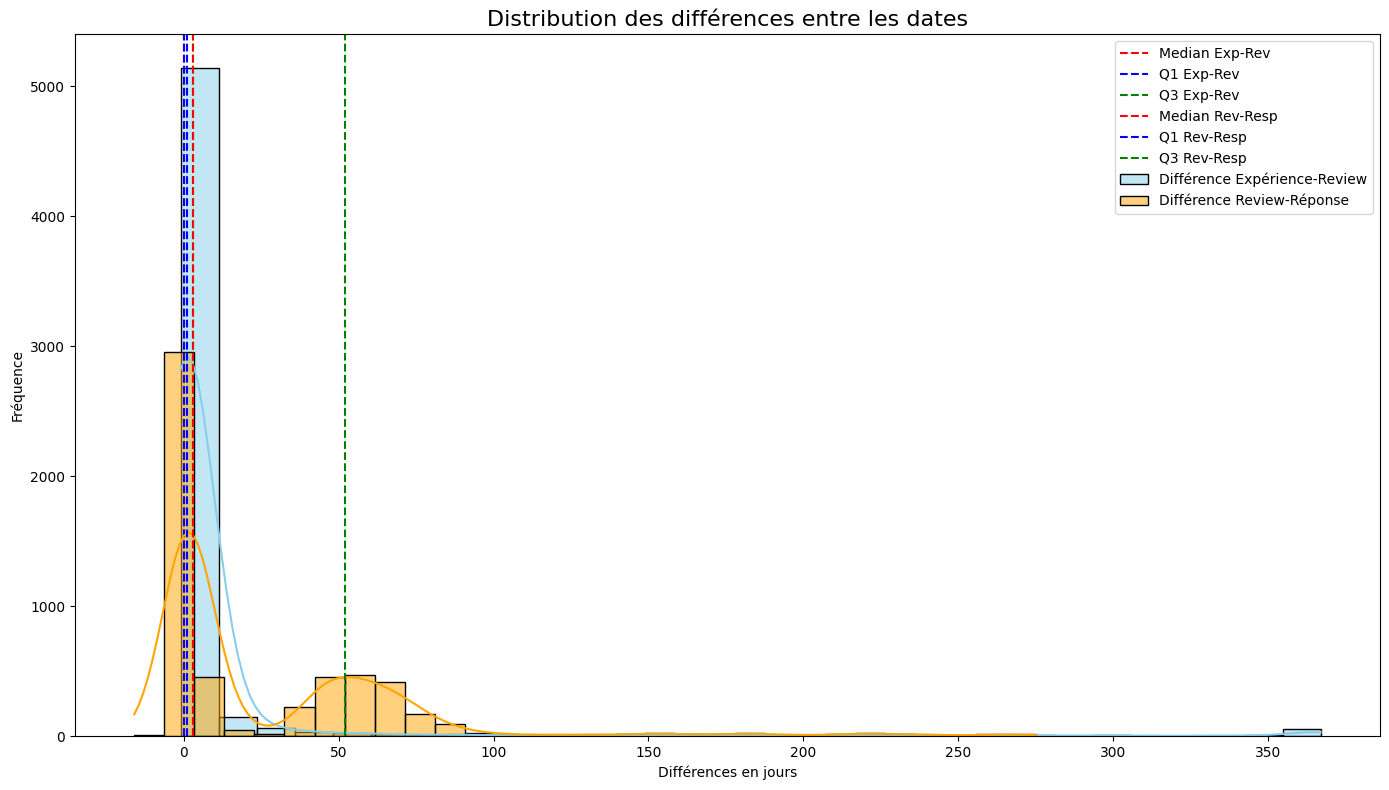

In [62]:
# Boxplot pour visualiser la distribution des différences
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[['diff_experience_review', 'diff_review_response']], palette='pastel')

# Calcul de la moyenne, médiane et quantiles
Q1_diff_exp_review = data['diff_experience_review'].quantile(0.25)
Q3_diff_exp_review = data['diff_experience_review'].quantile(0.75)

Q1_diff_review_response = data['diff_review_response'].quantile(0.25)
Q3_diff_review_response = data['diff_review_response'].quantile(0.75)

median_diff_exp_review = data['diff_experience_review'].median()
median_diff_review_response = data['diff_review_response'].median()

# Marquer les quantiles et la médiane
plt.scatter(x=[0], y=[Q1_diff_exp_review], color='blue', label='Q1 Exp-Rev', zorder=10, s=50)
plt.scatter(x=[0], y=[Q3_diff_exp_review], color='green', label='Q3 Exp-Rev', zorder=10, s=50)
plt.scatter(x=[0], y=[median_diff_exp_review], color='red', label='Median Exp-Rev', zorder=10, s=50)

plt.scatter(x=[1], y=[Q1_diff_review_response], color='blue', label='Q1 Rev-Resp', zorder=10, s=50)
plt.scatter(x=[1], y=[Q3_diff_review_response], color='green', label='Q3 Rev-Resp', zorder=10, s=50)
plt.scatter(x=[1], y=[median_diff_review_response], color='red', label='Median Rev-Resp', zorder=10, s=50)

# Titre et légendes
plt.title("Distribution des différences entre les dates", fontsize=16)
plt.xticks([0, 1], ['Différence Expérience-Review', 'Différence Review-Réponse'])
plt.ylabel("Nombre de jours")

plt.legend()
plt.tight_layout()
plt.show()

# Histogramme avec courbes de densité, moyenne et quantiles
plt.figure(figsize=(14, 8))
sns.histplot(data['diff_experience_review'], color='skyblue', kde=True, label='Différence Expérience-Review', bins=30)

# Marquer la moyenne et les quantiles avec des points rouges et bleus
plt.axvline(median_diff_exp_review, color='red', linestyle='--', label='Median Exp-Rev')
plt.axvline(Q1_diff_exp_review, color='blue', linestyle='--', label='Q1 Exp-Rev')
plt.axvline(Q3_diff_exp_review, color='green', linestyle='--', label='Q3 Exp-Rev')

sns.histplot(data['diff_review_response'], color='orange', kde=True, label='Différence Review-Réponse', bins=30)

# Marquer la moyenne et les quantiles avec des points rouges et bleus
plt.axvline(median_diff_review_response, color='red', linestyle='--', label='Median Rev-Resp')
plt.axvline(Q1_diff_review_response, color='blue', linestyle='--', label='Q1 Rev-Resp')
plt.axvline(Q3_diff_review_response, color='green', linestyle='--', label='Q3 Rev-Resp')

# Titre et légendes
plt.title("Distribution des différences entre les dates", fontsize=16)
plt.xlabel("Différences en jours")
plt.ylabel("Fréquence")

plt.legend()
plt.tight_layout()
plt.show()

Étant donné que lorsqu'aucune date de réponse n'est disponible, nous avons considéré la date du jour comme réponse, il est normal d'observer des délais parfois importants. Nous analyserons si cela a un impact sur notre étude. À noter qu'une réponse intervient toujours après l'attribution de la note. Sinon, cette colonne pourra être supprimée par la suite.

In [63]:
data.describe()

response_date       rating  \
count                           5600  5600.000000   
mean   2025-01-03 15:46:17.567764480     4.390179   
min              2024-02-22 00:00:00     1.000000   
25%              2024-12-18 00:00:00     5.000000   
50%              2025-01-13 00:00:00     5.000000   
75%    2025-02-26 16:48:29.947346944     5.000000   
max       2025-02-26 16:48:29.947347     5.000000   
std                              NaN     1.254993   

                     experience_date                    review_date  \
count                           5600                           5600   
mean   2024-11-24 19:08:23.999999744  2024-12-05 01:57:15.428571648   
min              2023-04-26 00:00:00            2024-02-21 00:00:00   
25%              2024-12-01 00:00:00            2024-12-07 00:00:00   
50%              2024-12-23 00:00:00            2024-12-27 00:00:00   
75%              2025-01-07 00:00:00            2025-01-10 00:00:00   
max              2025-01-15 00:00:00            2025-01-15 00:00:00   
std                              NaN                            NaN   

                scrap_date       reviews  trust_score  diff_experience_review  \
count                 5600   5600.000000  5600.000000             5600.000000   
mean   2025-01-15 00:00:00  27182.000000     4.364286               10.283929   
min    2025-01-15 00:00:00  11892.000000     3.700000               -1.000000   
25%    2025-01-15 00:00:00  16655.000000     4.100000                0.000000   
50%    2025-01-15 00:00:00  24436.500000     4.400000                0.000000   
75%    2025-01-15 00:00:00  31179.000000     4.500000                3.000000   
max    2025-01-15 00:00:00  69598.000000     4.700000              367.000000   
std                    NaN  14825.259156     0.281874               46.712786   

       diff_review_response     exp_year    exp_month      exp_day  \
count           5600.000000  5600.000000  5600.000000  5600.000000   
mean              29.313214  2024.358750     7.036786     3.646250   
min              -16.000000  2023.000000     1.000000     1.000000   
25%                1.000000  2024.000000     1.000000     2.000000   
50%                3.000000  2024.000000    10.000000     4.000000   
75%               52.000000  2025.000000    12.000000     5.000000   
max              275.000000  2025.000000    12.000000     7.000000   
std               45.424458     0.497946     5.058480     1.981709   

       review_year  review_month   review_day  
count  5600.000000   5600.000000  5600.000000  
mean   2024.433571      6.473036     3.796429  
min    2024.000000      1.000000     1.000000  
25%    2024.000000      1.000000     2.000000  
50%    2024.000000      7.000000     4.000000  
75%    2025.000000     12.000000     6.000000  
max    2025.000000     12.000000     7.000000  
std       0.495612      5.142234     1.970488

Text(0.5, 1.0, 'Répartition des notes par mois')

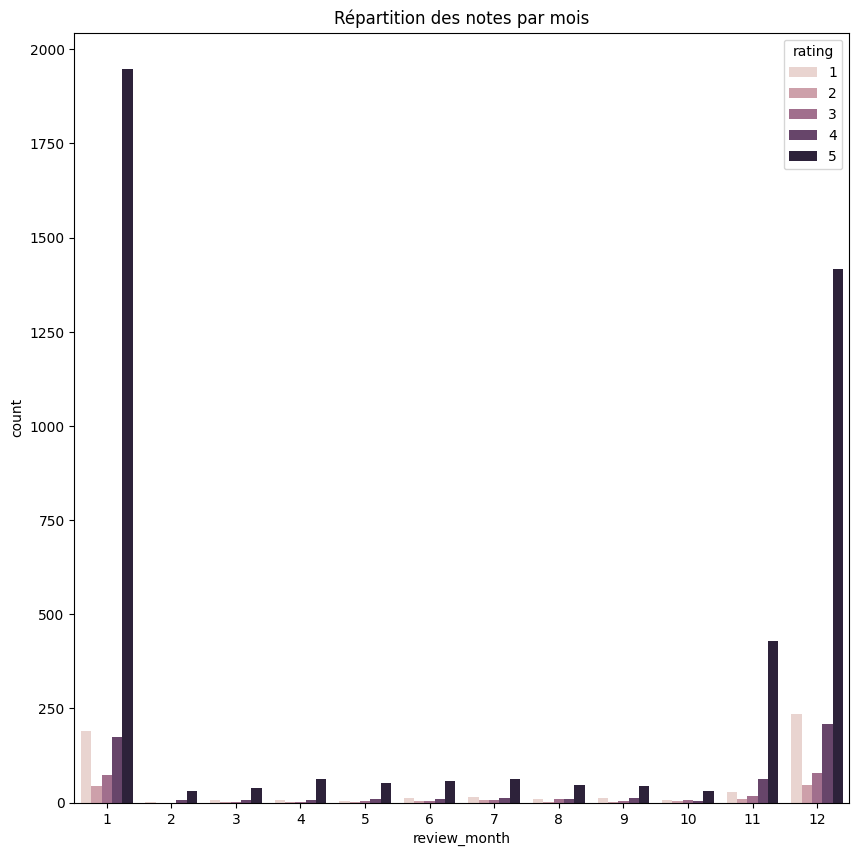

In [64]:
plt.figure(figsize=(10,10))
sns.countplot(x='review_month', hue='rating', data=data)
plt.title('Répartition des notes par mois')

Text(0.5, 1.0, "Nombre d'achat au cours des mois")

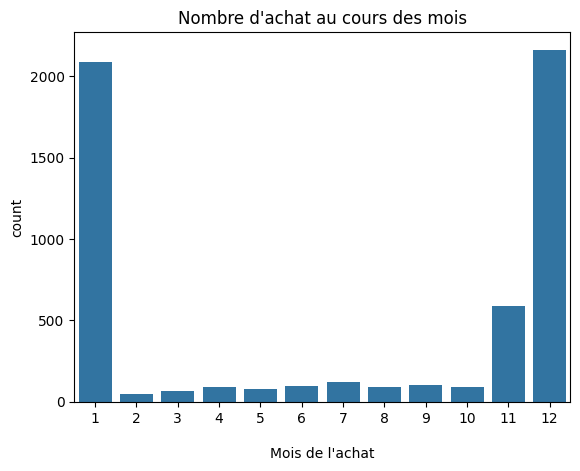

In [65]:
sns.countplot(x='exp_month', data=data)
plt.xlabel("\nMois de l'achat")
plt.title("Nombre d'achat au cours des mois")

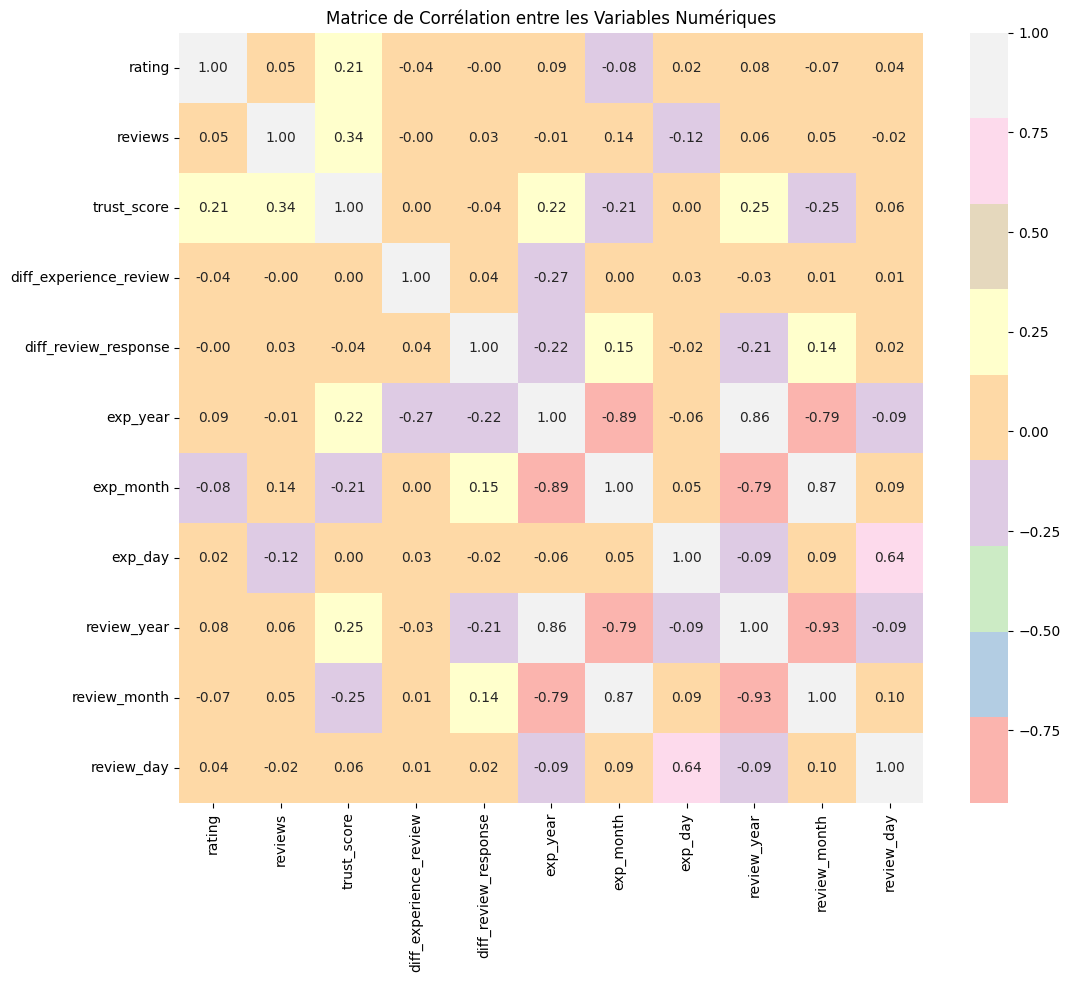

In [66]:
# Ne garder que les colonnes numériques
numerical_data = data.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation uniquement avec les valeurs numériques
correlation_matrix_numerical = numerical_data.corr()

# Visualisation avec Seaborn (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numerical, annot=True, fmt='.2f', cmap='Pastel1', cbar=True)
plt.title("Matrice de Corrélation entre les Variables Numériques")
plt.show()

In [67]:
# Affichage de la matrice de corrélation uniquement pour les colonnes numériques
print("Matrice de corrélation entre les variables numériques :\n")

correlation_matrix_numerical

Matrice de corrélation entre les variables numériques :



rating   reviews  trust_score  \
rating                  1.000000  0.054006     0.213181   
reviews                 0.054006  1.000000     0.335189   
trust_score             0.213181  0.335189     1.000000   
diff_experience_review -0.044009 -0.002123     0.001628   
diff_review_response   -0.000186  0.027734    -0.038729   
exp_year                0.092352 -0.013612     0.216259   
exp_month              -0.079404  0.136424    -0.214953   
exp_day                 0.020104 -0.121315     0.002094   
review_year             0.077429  0.060647     0.248171   
review_month           -0.072748  0.047475    -0.247315   
review_day              0.038192 -0.020009     0.057040   

                        diff_experience_review  diff_review_response  \
rating                               -0.044009             -0.000186   
reviews                              -0.002123              0.027734   
trust_score                           0.001628             -0.038729   
diff_experience_review                1.000000              0.036280   
diff_review_response                  0.036280              1.000000   
exp_year                             -0.271988             -0.223298   
exp_month                             0.001898              0.154241   
exp_day                               0.029024             -0.017110   
review_year                          -0.025353             -0.208255   
review_month                          0.012624              0.144667   
review_day                            0.011405              0.020393   

                        exp_year  exp_month   exp_day  review_year  \
rating                  0.092352  -0.079404  0.020104     0.077429   
reviews                -0.013612   0.136424 -0.121315     0.060647   
trust_score             0.216259  -0.214953  0.002094     0.248171   
diff_experience_review -0.271988   0.001898  0.029024    -0.025353   
diff_review_response   -0.223298   0.154241 -0.017110    -0.208255   
exp_year                1.000000  -0.891149 -0.056347     0.859738   
exp_month              -0.891149   1.000000  0.047034    -0.787659   
exp_day                -0.056347   0.047034  1.000000    -0.085122   
review_year             0.859738  -0.787659 -0.085122     1.000000   
review_month           -0.794985   0.865525  0.085514    -0.931264   
review_day             -0.087195   0.087565  0.643656    -0.093952   

                        review_month  review_day  
rating                     -0.072748    0.038192  
reviews                     0.047475   -0.020009  
trust_score                -0.247315    0.057040  
diff_experience_review      0.012624    0.011405  
diff_review_response        0.144667    0.020393  
exp_year                   -0.794985   -0.087195  
exp_month                   0.865525    0.087565  
exp_day                     0.085514    0.643656  
review_year                -0.931264   -0.093952  
review_month                1.000000    0.096527  
review_day                  0.096527    1.000000

La matrice de corrélation montre les relations entre les variables numériques dans notre dataframe :

Les corrélations indiquent que les variables trust_score, reviews, et review_id sont fortement corrélées, ce qui reflète potentiellement une influence directe sur la fréquence et la qualité des reviews.
Les colonnes diff_experience_review et diff_review_response montrent des corrélations relativement faibles, indiquant une séparation dans la manière dont ces deux intervalles sont perçus.
Les colonnes review_day et review_month montrent une faible corrélation avec les autres variables, mais restent utiles pour segmenter les analyses temporelles des reviews.
Les corrélations doivent être interprétées avec précaution, car certaines variables sont liées sans être nécessairement causales.
Colonnes à analyser avec précaution :

review_id semble présenter une corrélation importante avec plusieurs autres variables, ce qui peut être dû à une duplication ou à des identifiants uniques similaires.
review_day et review_month sont principalement utilisés pour des analyses temporelles, mais leur faible corrélation avec d'autres variables indique qu’elles ne devraient pas être les principales dans l’analyse.

La matrice de corrélation montre les relations linéaires entre les variables numériques. On remarque ici plusieurs corrélations intéressantes :

-rating a une corrélation modérée avec trust_score (0.21). Cela peut indiquer que les notes sont influencées par la confiance perçue.


-reviews (le nombre de reviews) est également positivement corrélé avec trust_score (0.33), ce qui suggère que plus un produit reçoit de reviews, plus il est perçu comme fiable.


-diff_experience_review (différence entre la date d'expérience et la date de la revue) et diff_review_response (différence entre la date de la revue et la réponse) montrent une faible corrélation entre elles.


-diff_review_response a une corrélation légèrement négative avec rating (-0.03), ce qui pourrait indiquer que des délais plus longs entre les avis et les réponses pourraient avoir un léger impact négatif sur la satisfaction des utilisateurs.


**Commentaire sur les corrélations à considérer :**

-trust_score semble avoir un effet significatif sur rating.

-diff_review_response pourrait être une variable importante à analyser plus en profondeur pour identifier son impact sur les ratings.

La corrélation faible ou nulle entre diff_experience_review et diff_review_response pourrait signifier qu'elles n'ont pas une forte relation entre elles, mais restent importantes pour comprendre les délais.

nous lavons deja remarque,que nous avons le plus de reponse poru les avis a 3 etiles cela explique pourquoi nous avons cette correlation.

La matrice de corrélation montre les relations entre les variables numériques du dataset. Les corrélations révèlent des liens faibles entre rating, reviews, diff_experience_review, et diff_review_response. Le trust_score est fortement lié à la fréquence des reviews et aux identifiants des reviews. Les colonnes à conserver pour l’analyse des ratings sont : rating, reviews, trust_score, diff_experience_review, diff_review_response, et review_month.

### Review = Review_title + Review_body

In [68]:
# Créer la colonne review_id en incrémentant
data['review_id'] = range(1, len(data) + 1)

In [69]:
# Transformer review_id en index
data.set_index('review_id', inplace=True)

In [70]:
data["review"]= data['review_title'] + ' ' + data['review_body']

In [71]:
def afficher_ligne(data, index):
    """ une fonction qui permet d'afficher toutes
    les colonnes d'une ligne spécifique d'un DataFrame.

    parametres:

    data : dataframe
    index : int
        l'index de la ligne à afficher
    """
    # Vérifier si l'index existe dans le DataFrame
    if index in data.index:
        print(f"Ligne {index}:")
        # Parcourir chaque colonne et afficher le nom de la colonne et sa valeur
        for col in data.columns:
            print(f"{col} : {data.at[index, col]}")
        print("------------")
    else:
        print(f"L'index {index} n'existe pas dans le DataFrame.")

In [72]:
def replace_texte(cell_value):
    try:
        pd.to_datetime(cell_value, format='%B %d, %Y')
        return 'aaaaa pas de commentaire!'  # Remplacez par 'pas de commentaire' si pas de commentaire
    except ValueError:
        return cell_value  # Conservez si un commentaire existe

data['review'] = data['review'].apply(replace_texte)

def replace_value(row):
    if row['review'] == 'aaaaa pas de commentaire!':
        return row['review_title']  # Remplace 'aaaaa pas de commentaire!' par le titre du commentaire
    else:
        return row['review']  # Conserve la valeur de 'review' si elle n'est pas vide

# Appliquer la fonction sur chaque ligne du DataFrame
data['review'] = data.apply(replace_value, axis=1)


In [73]:
# Exemple d'appel de la fonction
afficher_ligne(data, 2048)  

Ligne 2048:
liens_marque : igraal.com
user_name : Emy
review_title : J'mon avis Igraal ai toujours été très satisfaite de…
review_body : J'ai toujours été très satisfaite de Igraal. Je l'utilise dès que possible. Si les transactions ne s'affichent pas, je contacte le service client. Ils sont très réactifs et répondent toujours à lames besoins.
response : None
response_date : 2025-02-26 16:48:29.947347
rating : 5
experience_date : 2025-01-08 00:00:00
review_date : 2025-01-08 00:00:00
site_url : https://fr.trustpilot.com/review/igraal.com?page=3
scrap_date : 2025-01-15 00:00:00
marque : iGraal
categorie : bank
reviews : 34340
pays : FR
trust_score : 4.4
cat_response : 0
diff_experience_review : 0
diff_review_response : 49
exp_year : 2025
exp_month : 1
exp_day : 3
exp_day_of_week : Wednesday
review_year : 2025
review_month : 1
review_day : 3
review_day_of_week : Wednesday
review : J'mon avis Igraal ai toujours été très satisfaite de… J'ai toujours été très satisfaite de Igraal. Je l'utili

#### Emojis , caracteres, caracteres speciaux et majuscules

In [74]:
# Détecter le nombre de caractères spéciaux
def count_special_characters(text):
    if isinstance(text, str):
        return len(re.findall(r'[^\w\s]', text))  # Tout sauf des lettres, chiffres et espaces
    return 0

# Détecter le nombre de majuscules
def count_uppercase_characters(text):
    if isinstance(text, str):
        return sum(1 for char in text if char.isupper())  # Compte les majuscules
    return 0

# Compter la longueur totale des caractères
def count_total_characters(text):
    if isinstance(text, str):
        return len(text)  # Longueur du texte
    return 0

# Appliquer les fonctions sur la colonne 'review'
data['num_special_characters'] = data['review'].apply(count_special_characters)
data['num_uppercase_characters'] = data['review'].apply(count_uppercase_characters)
data['total_characters'] = data['review'].apply(count_total_characters)

In [75]:
data.head()

liens_marque user_name  \
review_id                                      
1          www.younited-credit.com       GUY   
2          www.younited-credit.com  Masselot   
3          www.younited-credit.com   cliente   
4          www.younited-credit.com     Hondo   
5          www.younited-credit.com     Sonia   

                                       review_title  \
review_id                                             
1                                           MERCI !   
2                       Rapide , simple et efficace   
3                  Réponse ultra rapide et surtout…   
4                     Rapport service client au top   
5          Elle m'a permise de réaliser mon projet…   

                                                 review_body response  \
review_id                                                               
1          Bonjour je mets 5 étoiles car j'ai eu toute l'...     None   
2          Très accessible , il suffit de bien répondre e...     None   
3          Réponse ultra rapide et surtout accessible san...     None   
4          Rapport service client au top , joignable à l’...     None   
5          Elle m'a permise de réaliser mon projet de lon...     None   

                       response_date  rating experience_date review_date  \
review_id                                                                  
1         2025-02-26 16:48:29.947347       5      2025-01-09  2025-01-15   
2         2025-02-26 16:48:29.947347       5      2025-01-06  2025-01-14   
3         2025-02-26 16:48:29.947347       5      2025-01-03  2025-01-10   
4         2025-02-26 16:48:29.947347       5      2025-01-07  2025-01-15   
5         2025-02-26 16:48:29.947347       5      2025-01-10  2025-01-15   

                                                    site_url scrap_date  \
review_id                                                                 
1          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
2          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
3          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
4          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
5          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   

                    marque categorie  reviews pays  trust_score cat_response  \
review_id                                                                      
1          Younited Credit      bank    69598   FR          4.7            0   
2          Younited Credit      bank    69598   FR          4.7            0   
3          Younited Credit      bank    69598   FR          4.7            0   
4          Younited Credit      bank    69598   FR          4.7            0   
5          Younited Credit      bank    69598   FR          4.7            0   

           diff_experience_review  diff_review_response  exp_year  exp_month  \
review_id                                                                      
1                               6                    42      2025          1   
2                               8                    43      2025          1   
3                               7                    47      2025          1   
4                               8                    42      2025          1   
5                               5                    42      2025          1   

           exp_day exp_day_of_week  review_year  review_month  review_day  \
review_id                                                                   
1                4        Thursday         2025             1           3   
2                1          Monday         2025             1           2   
3                5          Friday         2025             1           5   
4                2         Tuesday         2025             1           3   
5                5          Friday         2025             1           3   

          review_day_of_week  \
review_id                      
1 

In [76]:
# Exemple d'appel de la fonction
afficher_ligne(data, 2048)  

Ligne 2048:
liens_marque : igraal.com
user_name : Emy
review_title : J'mon avis Igraal ai toujours été très satisfaite de…
review_body : J'ai toujours été très satisfaite de Igraal. Je l'utilise dès que possible. Si les transactions ne s'affichent pas, je contacte le service client. Ils sont très réactifs et répondent toujours à lames besoins.
response : None
response_date : 2025-02-26 16:48:29.947347
rating : 5
experience_date : 2025-01-08 00:00:00
review_date : 2025-01-08 00:00:00
site_url : https://fr.trustpilot.com/review/igraal.com?page=3
scrap_date : 2025-01-15 00:00:00
marque : iGraal
categorie : bank
reviews : 34340
pays : FR
trust_score : 4.4
cat_response : 0
diff_experience_review : 0
diff_review_response : 49
exp_year : 2025
exp_month : 1
exp_day : 3
exp_day_of_week : Wednesday
review_year : 2025
review_month : 1
review_day : 3
review_day_of_week : Wednesday
review : J'mon avis Igraal ai toujours été très satisfaite de… J'ai toujours été très satisfaite de Igraal. Je l'utili

In [77]:
# Fonction pour extraire les emojis
def extract_emojis(text):
    emojis = re.findall(r'[\U0001F600-\U0001F64F]', text)  # Emoji Unicode Range
    return emojis

# Fonction pour compter les emojis positifs et négatifs
def count_positive_negative_emojis(text):
    positive_emojis = [emoji for emoji in extract_emojis(text) if emoji in ['😀', '😁', '😂', '🤣', '😃', '😄', '😅', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '😐', '😑','👍', '👏', '🙌', '🤝', '🙏', '✌️','✌', '🤞', '🤟', '🤘', '🤙', '👌', '👈', '👉', '👆', '👇', '☝️', '✋', '🤚', '🖐️', '🖖','👋', '🤗', '🤩','💖','💓', '💕', '💞', '💘' ,'💗' ,'💝','❤️','🧡' ,'💛' ,'💚', '💙' ,'💜' ,'🤎', '🖤','❤' ,'🤍', '💟', '💫', '💯']]  # Liste des emojis positifs
    negative_emojis = [emoji for emoji in extract_emojis(text) if emoji in ['😔', '😕', '😖', '😣', '😢', '😥', '😰', '😨', '😩', '😫', '😤', '😡', '😠', '😈', '👿', '💀', '☠️', '💩', '🤡','👎','👊', '🖕','💔']]  # Liste des emojis négatifs
    
    return len(positive_emojis), len(negative_emojis)

# Appliquer la fonction à la colonne review_title et review_body
data[['positive_emojis', 'negative_emojis']] = data.apply(lambda row: pd.Series(count_positive_negative_emojis(row['review'])), axis=1)

# Affichage des premières lignes après ajout des colonnes
data.head()

liens_marque user_name  \
review_id                                      
1          www.younited-credit.com       GUY   
2          www.younited-credit.com  Masselot   
3          www.younited-credit.com   cliente   
4          www.younited-credit.com     Hondo   
5          www.younited-credit.com     Sonia   

                                       review_title  \
review_id                                             
1                                           MERCI !   
2                       Rapide , simple et efficace   
3                  Réponse ultra rapide et surtout…   
4                     Rapport service client au top   
5          Elle m'a permise de réaliser mon projet…   

                                                 review_body response  \
review_id                                                               
1          Bonjour je mets 5 étoiles car j'ai eu toute l'...     None   
2          Très accessible , il suffit de bien répondre e...     None   
3          Réponse ultra rapide et surtout accessible san...     None   
4          Rapport service client au top , joignable à l’...     None   
5          Elle m'a permise de réaliser mon projet de lon...     None   

                       response_date  rating experience_date review_date  \
review_id                                                                  
1         2025-02-26 16:48:29.947347       5      2025-01-09  2025-01-15   
2         2025-02-26 16:48:29.947347       5      2025-01-06  2025-01-14   
3         2025-02-26 16:48:29.947347       5      2025-01-03  2025-01-10   
4         2025-02-26 16:48:29.947347       5      2025-01-07  2025-01-15   
5         2025-02-26 16:48:29.947347       5      2025-01-10  2025-01-15   

                                                    site_url scrap_date  \
review_id                                                                 
1          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
2          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
3          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
4          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
5          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   

                    marque categorie  reviews pays  trust_score cat_response  \
review_id                                                                      
1          Younited Credit      bank    69598   FR          4.7            0   
2          Younited Credit      bank    69598   FR          4.7            0   
3          Younited Credit      bank    69598   FR          4.7            0   
4          Younited Credit      bank    69598   FR          4.7            0   
5          Younited Credit      bank    69598   FR          4.7            0   

           diff_experience_review  diff_review_response  exp_year  exp_month  \
review_id                                                                      
1                               6                    42      2025          1   
2                               8                    43      2025          1   
3                               7                    47      2025          1   
4                               8                    42      2025          1   
5                               5                    42      2025          1   

           exp_day exp_day_of_week  review_year  review_month  review_day  \
review_id                                                                   
1                4        Thursday         2025             1           3   
2                1          Monday         2025             1           2   
3                5          Friday         2025             1           5   
4                2         Tuesday         2025             1           3   
5                5          Friday         2025             1           3   

          review_day_of_week  \
review_id                      
1 

In [78]:
# Appliquer la fonction à la colonne review_title et review_body
data['extracted_emojis'] = data['review'].apply(extract_emojis)
data['extracted_emojis'] = data['review'].apply(extract_emojis)
data_with_emojis = data[data['extracted_emojis'].apply(lambda x: len(x) > 0)]

# Afficher les résultats
data_with_emojis.head(3)

liens_marque         user_name  \
review_id                                              
8          www.younited-credit.com        Patrick. B   
35         www.younited-credit.com         DOMINIQUE   
240        www.younited-credit.com  bernard lauletta   

                                     review_title  \
review_id                                           
8                                          Au Top   
35         J'ai été très contente de la rapidité…   
240             Expérience à refaire sans aucune…   

                                                 review_body response  \
review_id                                                               
8          Bonjour, J'ai déjà eu affaire à cette société ...     None   
35         J'ai été très contente de la rapidité du trans...     None   
240        Expérience à refaire sans aucune hésitation mo...     None   

                       response_date  rating experience_date review_date  \
review_id                                                                  
8         2025-02-26 16:48:29.947347       5      2024-12-31  2025-01-06   
35        2025-02-26 16:48:29.947347       5      2024-12-30  2025-01-04   
240       2025-02-26 16:48:29.947347       5      2024-12-16  2024-12-22   

                                                    site_url scrap_date  \
review_id                                                                 
8          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
35         https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
240        https://fr.trustpilot.com/review/www.younited-... 2025-01-15   

                    marque categorie  reviews pays  trust_score cat_response  \
review_id                                                                      
8          Younited Credit      bank    69598   FR          4.7            0   
35         Younited Credit      bank    69598   FR          4.7            0   
240        Younited Credit      bank    69598   FR          4.7            0   

           diff_experience_review  diff_review_response  exp_year  exp_month  \
review_id                                                                      
8                               6                    51      2024         12   
35                              5                    53      2024         12   
240                             6                    66      2024         12   

           exp_day exp_day_of_week  review_year  review_month  review_day  \
review_id                                                                   
8                2         Tuesday         2025             1           1   
35               1          Monday         2025             1           6   
240              1          Monday         2024            12           7   

          review_day_of_week  \
review_id                      
8                     Monday   
35                  Saturday   
240                   Sunday   

                                                      review  \
review_id                                                      
8          Au Top Bonjour, J'ai déjà eu affaire à cette s...   
35         J'ai été très contente de la rapidité… J'ai ét...   
240        Expérience à refaire sans aucune… Expérience à...   

           num_special_characters  num_uppercase_characters  total_characters  \
review_id                                                                       
8                              15                         7               410   
35                             11                         2               162   
240                             5                         3               191   

           positive_emojis  negative_emojis extracted_emojis  
review_id                                                     
8                        1                0              [😉]  
35                       0                0              [😗]  
240                     

In [79]:
# Groupement par 'rating' et calcul des moyennes
rating_analysis = data.groupby('rating').agg({
    'total_characters': 'mean',
    'num_special_characters': 'mean',
    'num_uppercase_characters': 'mean',
    'positive_emojis': 'mean',
    'negative_emojis': 'mean'
}).reset_index()

# Renommer les colonnes pour clarification
rating_analysis.columns = ['rating', 'avg_total_characters', 'avg_special_characters', 'avg_uppercase_characters', 'avg_positive_emojis', 'avg_negative_emojis']

# Afficher les résultats
rating_analysis

rating  avg_total_characters  avg_special_characters  \
0       1            399.743833               13.102467   
1       2            282.016000                8.904000   
2       3            211.179612                5.970874   
3       4            130.657692                3.638462   
4       5            104.441971                2.877783   

   avg_uppercase_characters  avg_positive_emojis  avg_negative_emojis  
0                 13.223909             0.026565             0.030361  
1                  6.000000             0.000000             0.000000  
2                  4.422330             0.000000             0.004854  
3                  3.436538             0.005769             0.001923  
4                  3.329938             0.015159             0.000237

In [80]:
data.positive_emojis.value_counts(), data.negative_emojis.value_counts()

(positive_emojis
 0    5541
 1      47
 2       7
 4       2
 3       2
 6       1
 Name: count, dtype: int64,
 negative_emojis
 0    5591
 1       5
 3       2
 4       2
 Name: count, dtype: int64)

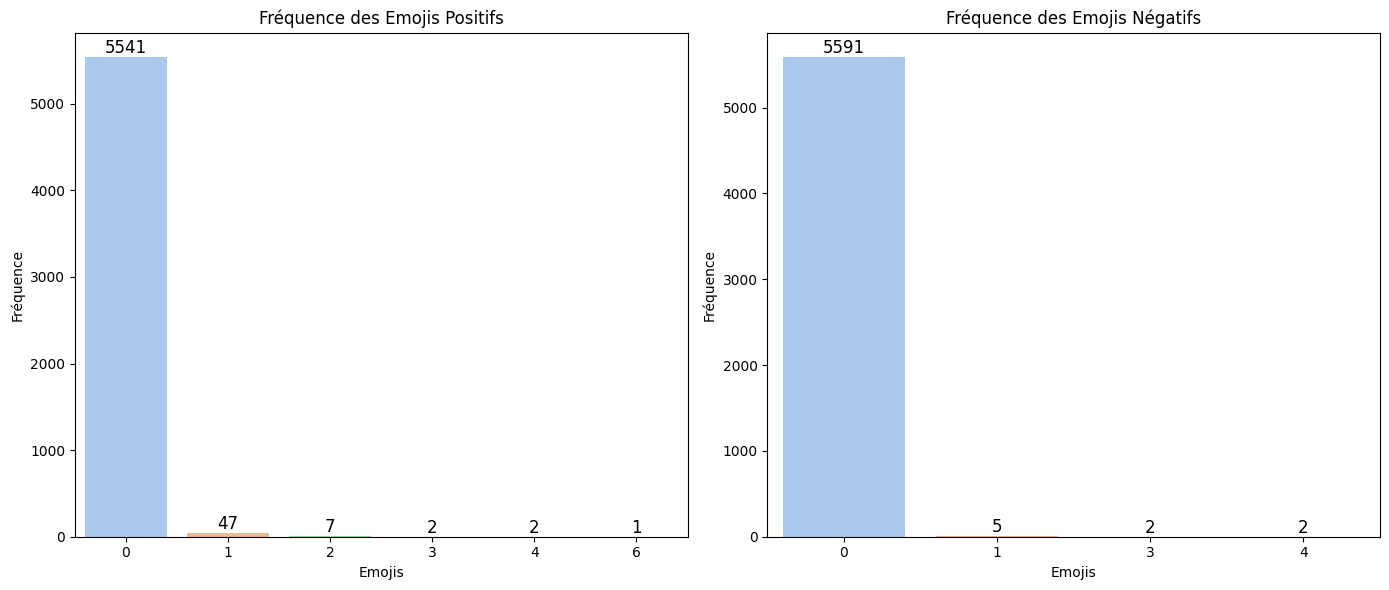

In [81]:
# Calculer les fréquences des emojis positifs et négatifs
positive_counts = data['positive_emojis'].value_counts()
negative_counts = data['negative_emojis'].value_counts()

# Créer un graphique avec deux sous-graphes (un pour les emojis positifs et un pour les emojis négatifs)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour les emojis positifs avec une palette pastel
sns.barplot(x=positive_counts.index, y=positive_counts.values, ax=axes[0], palette='pastel')
axes[0].set_title('Fréquence des Emojis Positifs')
axes[0].set_xlabel('Emojis')
axes[0].set_ylabel('Fréquence')

# Ajouter des libellés sur les barres
for i, value in enumerate(positive_counts.values):
    axes[0].text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Graphique pour les emojis négatifs avec une palette pastel
sns.barplot(x=negative_counts.index, y=negative_counts.values, ax=axes[1], palette='pastel')
axes[1].set_title('Fréquence des Emojis Négatifs')
axes[1].set_xlabel('Emojis')
axes[1].set_ylabel('Fréquence')

# Ajouter des libellés sur les barres
for i, value in enumerate(negative_counts.values):
    axes[1].text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Afficher les graphiques
plt.tight_layout()
plt.show()

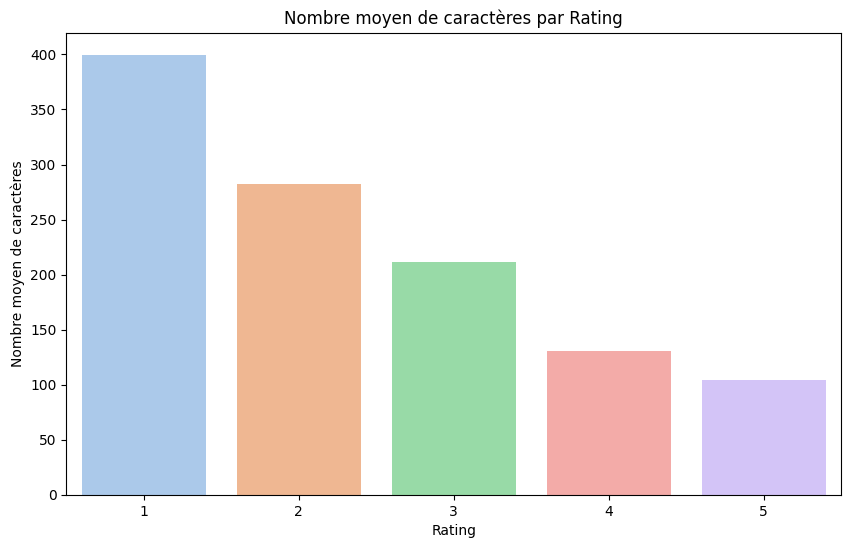

In [82]:
# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='avg_total_characters', data=rating_analysis, palette='pastel')
plt.title("Nombre moyen de caractères par Rating")
plt.xlabel("Rating")
plt.ylabel("Nombre moyen de caractères")
plt.show()

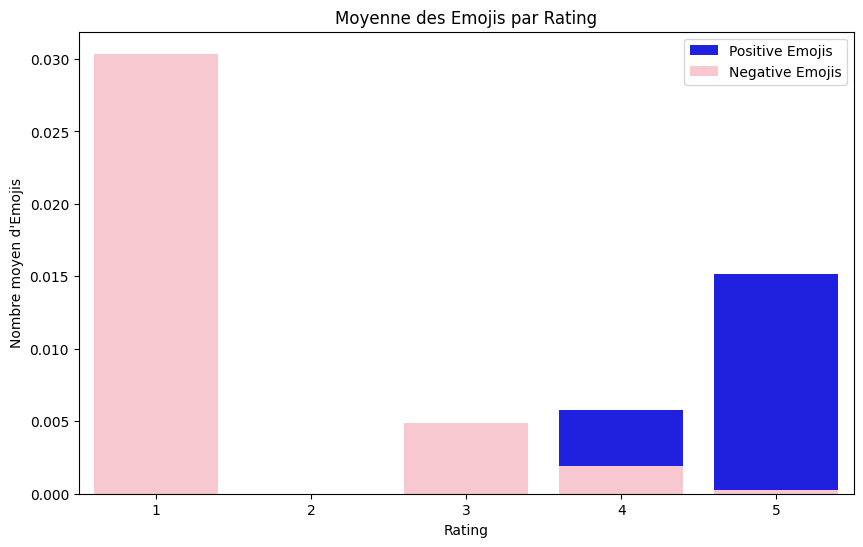

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='avg_positive_emojis', data=rating_analysis, color='blue', label='Positive Emojis')
sns.barplot(x='rating', y='avg_negative_emojis', data=rating_analysis, color='pink', label='Negative Emojis')
plt.title("Moyenne des Emojis par Rating")
plt.xlabel("Rating")
plt.ylabel("Nombre moyen d'Emojis")
plt.legend()
plt.show()

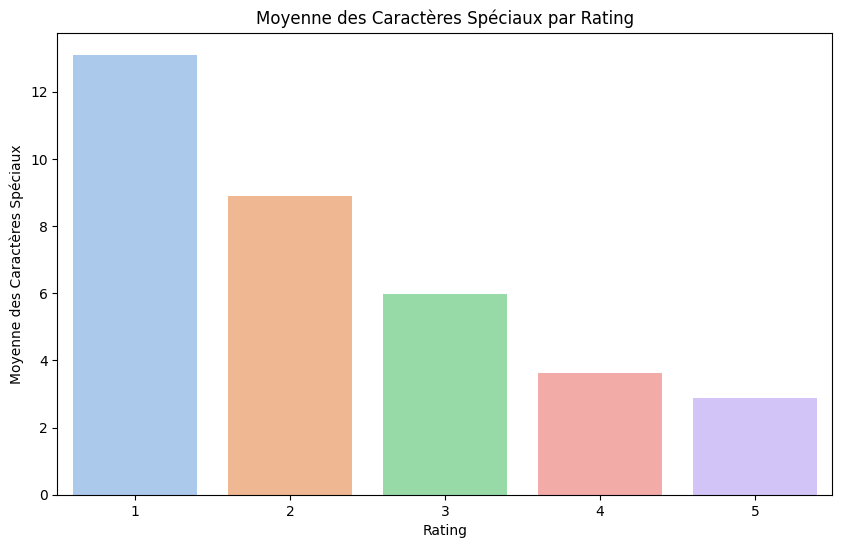

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='avg_special_characters', data=rating_analysis, palette='pastel')
plt.title("Moyenne des Caractères Spéciaux par Rating")
plt.xlabel("Rating")
plt.ylabel("Moyenne des Caractères Spéciaux")
plt.show()

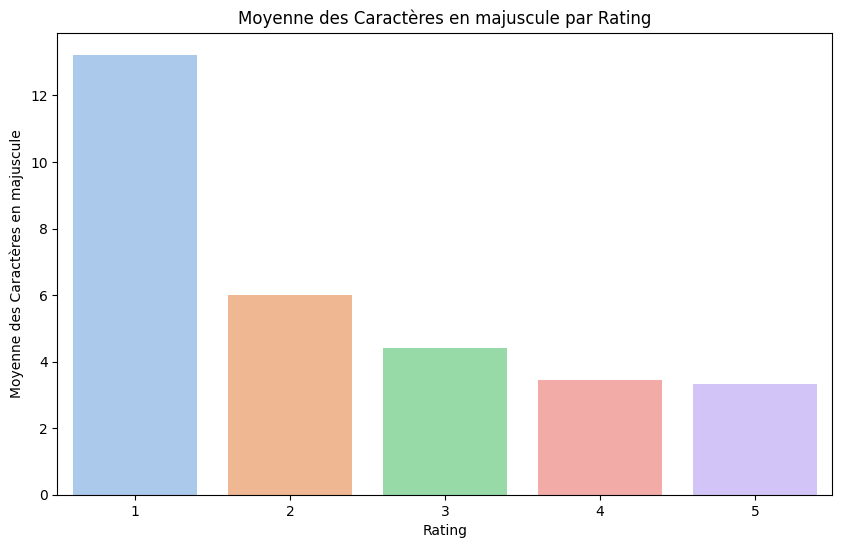

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='avg_uppercase_characters', data=rating_analysis, palette='pastel')
plt.title("Moyenne des Caractères en majuscule par Rating")
plt.xlabel("Rating")
plt.ylabel("Moyenne des Caractères en majuscule")
plt.show()

In [86]:
afficher_ligne(data, 2000)

Ligne 2000:
liens_marque : lepotcommun.fr
user_name : Vismes
review_title : RAPIDE ET SIMPLE
review_body : Date de l'expérience: 20 novembre 2024
response : Réponse : Le Pot Commun
response_date : 2024-11-20 00:00:00
rating : 5
experience_date : 2024-11-20 00:00:00
review_date : 2024-11-20 00:00:00
site_url : https://fr.trustpilot.com/review/lepotcommun.fr?page=20
scrap_date : 2025-01-15 00:00:00
marque : Le Pot Commun
categorie : bank
reviews : 25708
pays : FR
trust_score : 4.5
cat_response : 1
diff_experience_review : 0
diff_review_response : 0
exp_year : 2024
exp_month : 11
exp_day : 3
exp_day_of_week : Wednesday
review_year : 2024
review_month : 11
review_day : 3
review_day_of_week : Wednesday
review : RAPIDE ET SIMPLE Date de l'expérience: 20 novembre 2024
num_special_characters : 2
num_uppercase_characters : 15
total_characters : 55
positive_emojis : 0
negative_emojis : 0
extracted_emojis : []
------------


### Traduction des reviews

In [87]:
from langdetect import detect

Avant de commencer la traduction des commentaires, il est nécessaire de supprimer les caractères spéciaux, les émojis dans la colonne à traduire. 

In [88]:
import emoji

In [89]:
def remove_special_characters_and_emojis(text):
    if not isinstance(text, str):  
        return ""  # Gérer les valeurs NaN ou non textuelles
    
    # Supprime les emojis
    text = emoji.replace_emoji(text, replace=' ')  

    # Supprime les caractères spéciaux en conservant lettres, chiffres, ponctuation standard et espaces
    text = re.sub(r'[^a-zA-Z0-9\sàáâäçèéêëìíîïñòóôöùúûüýÿ\s,.;\'-]', ' ', text)
    
    # Suppression des espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

data['commentaire_text'] = data['review'].apply(remove_special_characters_and_emojis)

# Vérification après nettoyage
print(data['commentaire_text'].sample(5))

review_id
3647    Problème cb Je n'avais pas reçu ma cb et le te...
320     Je trouve personnellement que le Je trouve per...
2970    Très bonne banque en ligne Très bonne banque e...
5113    Pratique pour aider financièrement a a été un ...
5433    Toujours à l'écoute du client Toujours à l'éco...
Name: commentaire_text, dtype: object


In [90]:
# Fonction pour vérifier la présence d'un emoji
def contains_emoji(text):
    # Expression régulière pour détecter les emojis
    emoji_pattern = re.compile(
        "["  
        "\U0001F600-\U0001F64F"  # Emoticônes
        "\U0001F300-\U0001F5FF"  # Symboles et pictogrammes divers
        "\U0001F680-\U0001F6FF"  # Transports et cartes
        "\U0001F700-\U0001F77F"  # Alchimie
        "\U0001F780-\U0001F7FF"  # Symboles géométriques
        "\U0001F800-\U0001F8FF"  # Symboles divers
        "\U0001F900-\U0001F9FF"  # Émojis supplémentaires
        "\U0001FA00-\U0001FA6F"  # Emoticônes supplémentaires
        "\U0001FA70-\U0001FAFF"  # Symboles spéciaux
        "\U00002702-\U000027B0"  # Symboles de main
        "\U000024C2-\U0001F251"  # Lettres, symboles et caractères divers
        "]", flags=re.UNICODE)
    
    return bool(emoji_pattern.search(text))

# Appliquer la fonction sur la colonne 'commentaire_text'
data['contains_emoji'] = data['commentaire_text'].apply(lambda x: contains_emoji(str(x)))

# Afficher les résultats
print(data['contains_emoji'].value_counts())

contains_emoji
False    5600
Name: count, dtype: int64


In [91]:
from collections import Counter

# Fonction pour lister les caractères spéciaux restants
def find_special_characters(text):
    if isinstance(text, str):
        return re.findall(r'[^a-zA-Z0-9\sàáâäçèéêëìíîïñòóôöùúûüýÿ,.;\'-]', text)
    return []

# Appliquer la fonction à toute la colonne
special_chars = data['commentaire_text'].apply(find_special_characters)

# Compter la fréquence des caractères spéciaux
all_special_chars = [char for sublist in special_chars for char in sublist]
Counter(all_special_chars)


Counter()

In [92]:
afficher_ligne(data, 201)

Ligne 201:
liens_marque : www.younited-credit.com
user_name : Mme NEDJMA Logane
review_title : Ce n’est pas un tx 0%
review_body : Il n’y a qu’au moment de finaliser le crédit que j’ai vu apparaître le taux. J’étais dans l’urgence donc je n’ai pas eu le choix. Sinon niveau plan de remboursement c’est plutôt pas mal !
response : Réponse : Younited Credit
response_date : 2024-12-30 00:00:00
rating : 2
experience_date : 2024-12-17 00:00:00
review_date : 2024-12-26 00:00:00
site_url : https://fr.trustpilot.com/review/www.younited-credit.com?page=11
scrap_date : 2025-01-15 00:00:00
marque : Younited Credit
categorie : bank
reviews : 69598
pays : FR
trust_score : 4.7
cat_response : 1
diff_experience_review : 9
diff_review_response : 4
exp_year : 2024
exp_month : 12
exp_day : 2
exp_day_of_week : Tuesday
review_year : 2024
review_month : 12
review_day : 4
review_day_of_week : Thursday
review : Ce n’est pas un tx 0% Il n’y a qu’au moment de finaliser le crédit que j’ai vu apparaître le taux. J’

In [93]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Pour garantir la reproductibilité

def detect_language(text):
    try:
        return detect(text)
    except Exception as e:
        print(f"Erreur de détection de langue : {e}")
        return 'Non détectée'

# Appliquez la fonction à la colonne 'commentaires'
data['langue'] = data['commentaire_text'].apply(detect_language)

print('Langue détectée')

## supprimer les lignes avec langue = Non détectée

critère_sup = (data['langue'] == 'Non détectée')

print('avant sup',data['langue'].count())
data = data.drop(data[critère_sup].index)
print('après sup',data['langue'].count())


Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Erreur de détection de langue : No features in text.
Langue détectée
avant sup 5600
après sup 5589


In [94]:
data.head(2)

liens_marque user_name                 review_title  \
review_id                                                                   
1          www.younited-credit.com       GUY                      MERCI !   
2          www.younited-credit.com  Masselot  Rapide , simple et efficace   

                                                 review_body response  \
review_id                                                               
1          Bonjour je mets 5 étoiles car j'ai eu toute l'...     None   
2          Très accessible , il suffit de bien répondre e...     None   

                       response_date  rating experience_date review_date  \
review_id                                                                  
1         2025-02-26 16:48:29.947347       5      2025-01-09  2025-01-15   
2         2025-02-26 16:48:29.947347       5      2025-01-06  2025-01-14   

                                                    site_url scrap_date  \
review_id                                                                 
1          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
2          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   

                    marque categorie  reviews pays  trust_score cat_response  \
review_id                                                                      
1          Younited Credit      bank    69598   FR          4.7            0   
2          Younited Credit      bank    69598   FR          4.7            0   

           diff_experience_review  diff_review_response  exp_year  exp_month  \
review_id                                                                      
1                               6                    42      2025          1   
2                               8                    43      2025          1   

           exp_day exp_day_of_week  review_year  review_month  review_day  \
review_id                                                                   
1                4        Thursday         2025             1           3   
2                1          Monday         2025             1           2   

          review_day_of_week  \
review_id                      
1                  Wednesday   
2                    Tuesday   

                                                      review  \
review_id                                                      
1          MERCI ! Bonjour je mets 5 étoiles car j'ai eu ...   
2          Rapide , simple et efficace Très accessible , ...   

           num_special_characters  num_uppercase_characters  total_characters  \
review_id                                                                       
1                               7                         7               329   
2                               9                         4               289   

           positive_emojis  negative_emojis extracted_emojis  \
review_id                                                      
1                        0                0               []   
2                        0                0               []   

                                            commentaire_text  contains_emoji  \
review_id                                                                      
1          MERCI Bonjour je mets 5 étoiles car j'ai eu to...           False   
2          Rapide , simple et efficace Très accessible , ...           False   

          langue  
review_id         
1             fr  
2             fr

In [95]:
commentaires_par_langue = data['langue'].value_counts()
print(commentaires_par_langue)

langue
fr    5319
en      85
ca      54
es      28
ro      27
it      24
de      15
nl       9
sk       5
da       3
af       3
fi       2
no       2
so       2
sv       1
sq       1
sw       1
cy       1
pt       1
sl       1
lt       1
hu       1
et       1
lv       1
tr       1
Name: count, dtype: int64


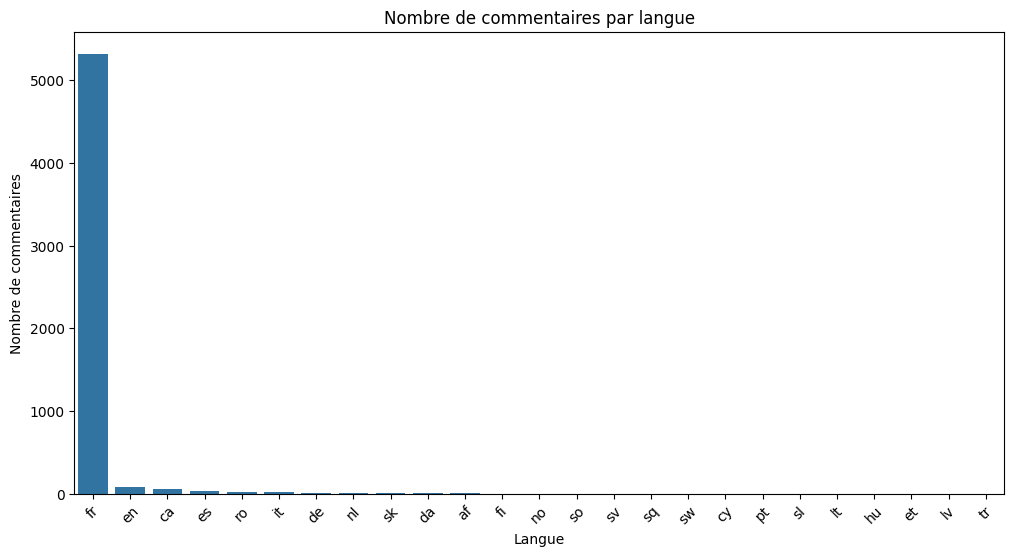

In [96]:
# Graphe : Nombre de commentaires par langue
plt.figure(figsize=(12,6))
sns.countplot(x='langue', data=data, order=commentaires_par_langue.index)
plt.title('Nombre de commentaires par langue')
plt.xticks(rotation=45)
plt.xlabel('Langue')
plt.ylabel('Nombre de commentaires')
plt.show()


In [97]:
# Grouper les données par 'langue_complete' et compter les avis
avis_par_langue = data.groupby('langue')['rating'].count().sort_values(ascending=False)

In [98]:
# Triez les données par ordre décroissant
grouped_data_pie_c = data.groupby(['langue', 'rating']).size().unstack(fill_value=0)
grouped_data_pie_c = grouped_data_pie_c.stack().reset_index(name='count')
grouped_data_pie_c = grouped_data_pie_c.sort_values(by='count', ascending=False)

# Afficher les 5 premières lignes après tri
grouped_data_pie_c.head(5)


langue  rating  count
49     fr       5   3981
45     fr       1    517
48     fr       4    500
47     fr       3    201
46     fr       2    120

In [99]:
grouped_data_pie = data.groupby(['langue', 'rating']).size().unstack(fill_value=0)

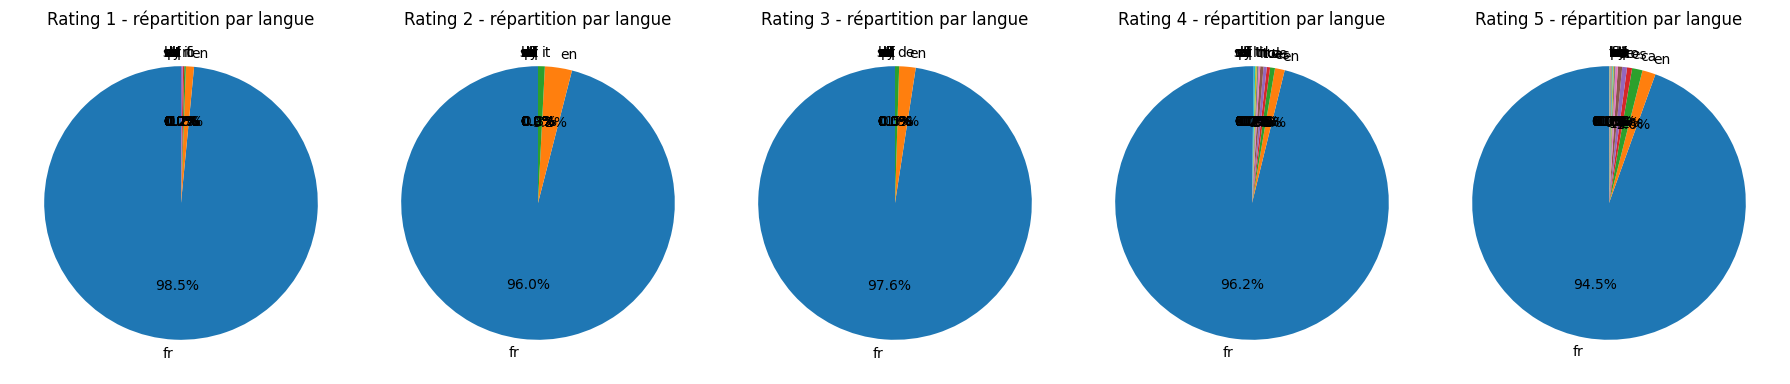

In [100]:
# Changer la taille du graphique
plt.figure(figsize=(18, 8))

for idx, rating in enumerate(grouped_data_pie.columns, start=1):
    plt.subplot(1, 5, idx)  # Crée un subplot pour chaque rating (5 sous-graphiques)
    
    # Données pour le pie chart
    data_plot = grouped_data_pie[rating].sort_values(ascending=False)
    
    # Le pie chart
    plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', startangle=90)
    
    plt.title(f'Rating {rating} - répartition par langue')
    
plt.tight_layout()
plt.show()

nous allons traduire tous nos reviews en anglais


In [101]:
from deep_translator import GoogleTranslator

# test de Traduction
text = "Bonjour tout le monde"
translated_text = GoogleTranslator(source='fr', target='en').translate(text)

print(translated_text)


Hello everyone


In [102]:
import time

In [103]:
from deep_translator import GoogleTranslator


# Filtrer les commentaires qui ne sont pas déjà en anglais
data_processed = data[data["langue"] != "en"].copy()

# Initialiser le traducteur
translator = GoogleTranslator(source="auto", target="en")

# Fonction de traduction avec gestion d'erreurs
def safe_translate(text):
    try:
        return translator.translate(text)
    except Exception as e:
        print(f"Erreur de traduction : {e}")
        return text  # Retourne le texte original en cas d'erreur

# Traduction par batch pour éviter les limites d'API
batch_size = 50  # Nombre de commentaires par batch
total_batches = len(data_processed) // batch_size + 1

for i in range(total_batches):
    print(f"🔄 Traitement du batch {i+1}/{total_batches}...")
    
    batch_start = i * batch_size
    batch_end = batch_start + batch_size
    batch_data = data_processed.iloc[batch_start:batch_end]
    
    # Traduire les commentaires
    data_processed.loc[batch_data.index, "commentaire_en"] = batch_data["commentaire_text"].apply(
        lambda x: safe_translate(x)  # Plus besoin de x.name
    )
    
    # Mettre à jour le statut de traduction (OK ou erreur)
    data_processed.loc[batch_data.index, 'verif_traduction'] = data_processed.loc[batch_data.index, 'commentaire_en'].apply(
        lambda x: 'OK' if 'Erreur de traduction' not in x else 'Erreur'
    )
    
    # Pause pour éviter les blocages de l'API
    time.sleep(2)

# Mettre à jour le DataFrame original avec les résultats
data_processed.loc[data_processed.index, "commentaire_en"] = data_processed["commentaire_en"]
data_processed.loc[data_processed.index, "verif_traduction"] = data_processed["verif_traduction"]


🔄 Traitement du batch 1/111...
🔄 Traitement du batch 2/111...
🔄 Traitement du batch 3/111...
🔄 Traitement du batch 4/111...
🔄 Traitement du batch 5/111...
🔄 Traitement du batch 6/111...
🔄 Traitement du batch 7/111...
🔄 Traitement du batch 8/111...
🔄 Traitement du batch 9/111...
🔄 Traitement du batch 10/111...
🔄 Traitement du batch 11/111...
🔄 Traitement du batch 12/111...
🔄 Traitement du batch 13/111...
🔄 Traitement du batch 14/111...
🔄 Traitement du batch 15/111...
🔄 Traitement du batch 16/111...
🔄 Traitement du batch 17/111...
🔄 Traitement du batch 18/111...
🔄 Traitement du batch 19/111...
🔄 Traitement du batch 20/111...
🔄 Traitement du batch 21/111...
🔄 Traitement du batch 22/111...
🔄 Traitement du batch 23/111...
🔄 Traitement du batch 24/111...
🔄 Traitement du batch 25/111...
🔄 Traitement du batch 26/111...
🔄 Traitement du batch 27/111...
🔄 Traitement du batch 28/111...
🔄 Traitement du batch 29/111...
🔄 Traitement du batch 30/111...
🔄 Traitement du batch 31/111...
🔄 Traitement du b

In [104]:
afficher_ligne(data_processed, 2222)

Ligne 2222:
liens_marque : igraal.com
user_name : Mohamed amine Dris
review_title : très bon application
review_body : très bon application, je recommande
response : None
response_date : 2025-02-26 16:48:29.947347
rating : 4
experience_date : 2024-09-21 00:00:00
review_date : 2024-12-18 00:00:00
site_url : https://fr.trustpilot.com/review/igraal.com?page=12
scrap_date : 2025-01-15 00:00:00
marque : iGraal
categorie : bank
reviews : 34340
pays : FR
trust_score : 4.4
cat_response : 0
diff_experience_review : 88
diff_review_response : 70
exp_year : 2024
exp_month : 9
exp_day : 6
exp_day_of_week : Saturday
review_year : 2024
review_month : 12
review_day : 3
review_day_of_week : Wednesday
review : très bon application très bon application, je recommande
num_special_characters : 1
num_uppercase_characters : 0
total_characters : 56
positive_emojis : 0
negative_emojis : 0
extracted_emojis : []
commentaire_text : très bon application très bon application, je recommande
contains_emoji : False
la

In [105]:
#on controle nos langues
data_processed.verif_traduction.value_counts()

verif_traduction
OK    5504
Name: count, dtype: int64

In [106]:
data_processed.head(5)

liens_marque user_name  \
review_id                                      
1          www.younited-credit.com       GUY   
2          www.younited-credit.com  Masselot   
3          www.younited-credit.com   cliente   
4          www.younited-credit.com     Hondo   
5          www.younited-credit.com     Sonia   

                                       review_title  \
review_id                                             
1                                           MERCI !   
2                       Rapide , simple et efficace   
3                  Réponse ultra rapide et surtout…   
4                     Rapport service client au top   
5          Elle m'a permise de réaliser mon projet…   

                                                 review_body response  \
review_id                                                               
1          Bonjour je mets 5 étoiles car j'ai eu toute l'...     None   
2          Très accessible , il suffit de bien répondre e...     None   
3          Réponse ultra rapide et surtout accessible san...     None   
4          Rapport service client au top , joignable à l’...     None   
5          Elle m'a permise de réaliser mon projet de lon...     None   

                       response_date  rating experience_date review_date  \
review_id                                                                  
1         2025-02-26 16:48:29.947347       5      2025-01-09  2025-01-15   
2         2025-02-26 16:48:29.947347       5      2025-01-06  2025-01-14   
3         2025-02-26 16:48:29.947347       5      2025-01-03  2025-01-10   
4         2025-02-26 16:48:29.947347       5      2025-01-07  2025-01-15   
5         2025-02-26 16:48:29.947347       5      2025-01-10  2025-01-15   

                                                    site_url scrap_date  \
review_id                                                                 
1          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
2          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
3          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
4          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   
5          https://fr.trustpilot.com/review/www.younited-... 2025-01-15   

                    marque categorie  reviews pays  trust_score cat_response  \
review_id                                                                      
1          Younited Credit      bank    69598   FR          4.7            0   
2          Younited Credit      bank    69598   FR          4.7            0   
3          Younited Credit      bank    69598   FR          4.7            0   
4          Younited Credit      bank    69598   FR          4.7            0   
5          Younited Credit      bank    69598   FR          4.7            0   

           diff_experience_review  diff_review_response  exp_year  exp_month  \
review_id                                                                      
1                               6                    42      2025          1   
2                               8                    43      2025          1   
3                               7                    47      2025          1   
4                               8                    42      2025          1   
5                               5                    42      2025          1   

           exp_day exp_day_of_week  review_year  review_month  review_day  \
review_id                                                                   
1                4        Thursday         2025             1           3   
2                1          Monday         2025             1           2   
3                5          Friday         2025             1           5   
4                2         Tuesday         2025             1           3   
5                5          Friday         2025             1           3   

          review_day_of_week  \
review_id                      
1 

In [107]:
afficher_ligne(data_processed, 1991)

Ligne 1991:
liens_marque : lepotcommun.fr
user_name : Nathalie
review_title : Rapide
review_body : RapideSécurisée
response : Réponse : Le Pot Commun
response_date : 2024-11-21 00:00:00
rating : 5
experience_date : 2024-11-21 00:00:00
review_date : 2024-11-21 00:00:00
site_url : https://fr.trustpilot.com/review/lepotcommun.fr?page=20
scrap_date : 2025-01-15 00:00:00
marque : Le Pot Commun
categorie : bank
reviews : 25708
pays : FR
trust_score : 4.5
cat_response : 1
diff_experience_review : 0
diff_review_response : 0
exp_year : 2024
exp_month : 11
exp_day : 4
exp_day_of_week : Thursday
review_year : 2024
review_month : 11
review_day : 4
review_day_of_week : Thursday
review : Rapide RapideSécurisée
num_special_characters : 0
num_uppercase_characters : 3
total_characters : 22
positive_emojis : 0
negative_emojis : 0
extracted_emojis : []
commentaire_text : Rapide RapideSécurisée
contains_emoji : False
langue : fr
commentaire_en : Fast rapidized
verif_traduction : OK
------------


In [108]:
import os

# Chemin de sortie pour le fichier JSON
output_json_path = r'C:\Users\mbouc\supply_sentiment\data treatment\Prediction\data_translated.json'

# Vérifier si le dossier existe, sinon le créer
output_dir = os.path.dirname(output_json_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Convertir les colonnes Timestamp en chaînes de caractères
data_processed = data_processed.applymap(lambda x: x.strftime('%Y-%m-%d %H:%M:%S') if isinstance(x, pd.Timestamp) else x)

# Convertir le DataFrame en dictionnaire pour l'exportation JSON
data_processed_json = data_processed.to_dict(orient="records")

# Sauvegarder dans un fichier JSON
with open(output_json_path, 'w', encoding='utf-8') as f:
    json.dump(data_processed_json, f, ensure_ascii=False, indent=4)

print(f'Fichier JSON enregistré à {output_json_path}')


Fichier JSON enregistré à C:\Users\mbouc\supply_sentiment\data treatment\Prediction\data_translated.json


# **Analyse: Data Processed** 

In [109]:
#chemin du fichier json
input_json_path = r'C:\Users\mbouc\supply_sentiment\data treatment\Prediction\data_translated.json'

#lire le fichier JSON
with open(input_json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

#convertir la liste du dictionnaire en dataframe
df = pd.DataFrame(data)

#afficher les 3 premieres lignes
df.head(3)

liens_marque user_name                      review_title  \
0  www.younited-credit.com       GUY                           MERCI !   
1  www.younited-credit.com  Masselot       Rapide , simple et efficace   
2  www.younited-credit.com   cliente  Réponse ultra rapide et surtout…   

                                         review_body response  \
0  Bonjour je mets 5 étoiles car j'ai eu toute l'...     None   
1  Très accessible , il suffit de bien répondre e...     None   
2  Réponse ultra rapide et surtout accessible san...     None   

         response_date  rating      experience_date          review_date  \
0  2025-02-26 16:48:29       5  2025-01-09 00:00:00  2025-01-15 00:00:00   
1  2025-02-26 16:48:29       5  2025-01-06 00:00:00  2025-01-14 00:00:00   
2  2025-02-26 16:48:29       5  2025-01-03 00:00:00  2025-01-10 00:00:00   

                                            site_url           scrap_date  \
0  https://fr.trustpilot.com/review/www.younited-...  2025-01-15 00:00:00   
1  https://fr.trustpilot.com/review/www.younited-...  2025-01-15 00:00:00   
2  https://fr.trustpilot.com/review/www.younited-...  2025-01-15 00:00:00   

            marque categorie  reviews pays  trust_score cat_response  \
0  Younited Credit      bank    69598   FR          4.7            0   
1  Younited Credit      bank    69598   FR          4.7            0   
2  Younited Credit      bank    69598   FR          4.7            0   

   diff_experience_review  diff_review_response  exp_year  exp_month  exp_day  \
0                       6                    42      2025          1        4   
1                       8                    43      2025          1        1   
2                       7                    47      2025          1        5   

  exp_day_of_week  review_year  review_month  review_day review_day_of_week  \
0        Thursday         2025             1           3          Wednesday   
1          Monday         2025             1           2            Tuesday   
2          Friday         2025             1           5             Friday   

                                              review  num_special_characters  \
0  MERCI ! Bonjour je mets 5 étoiles car j'ai eu ...                       7   
1  Rapide , simple et efficace Très accessible , ...                       9   
2  Réponse ultra rapide et surtout… Réponse ultra...                       9   

   num_uppercase_characters  total_characters  positive_emojis  \
0                         7               329                0   
1                         4               289                0   
2                         5               330                0   

   negative_emojis extracted_emojis  \
0                0               []   
1                0               []   
2                0               []   

                                    commentaire_text  contains_emoji langue  \
0  MERCI Bonjour je mets 5 étoiles car j'ai eu to...           False     fr   
1  Rapide , simple et efficace Très accessible , ...           False     fr   
2  Réponse ultra rapide et surtout Réponse ultra ...           False     fr   

                                      commentaire_en verif_traduction  
0  Thank you hello I put 5 stars because I had al...               OK  
1  Fast, simple and efficient very accessible, ju...               OK  
2  Ultra fast response and especially ultra fast ...               OK

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   liens_marque              5504 non-null   object 
 1   user_name                 5504 non-null   object 
 2   review_title              5504 non-null   object 
 3   review_body               5504 non-null   object 
 4   response                  3462 non-null   object 
 5   response_date             5504 non-null   object 
 6   rating                    5504 non-null   int64  
 7   experience_date           5504 non-null   object 
 8   review_date               5504 non-null   object 
 9   site_url                  5504 non-null   object 
 10  scrap_date                5504 non-null   object 
 11  marque                    5504 non-null   object 
 12  categorie                 5504 non-null   object 
 13  reviews                   5504 non-null   int64  
 14  pays    

In [111]:
df.describe()

rating       reviews  trust_score  diff_experience_review  \
count  5504.000000   5504.000000  5504.000000             5504.000000   
mean      4.389353  27267.353743     4.366170               10.065225   
std       1.255814  14889.536752     0.282148               45.984487   
min       1.000000  11892.000000     3.700000               -1.000000   
25%       5.000000  16655.000000     4.100000                0.000000   
50%       5.000000  25708.000000     4.400000                0.000000   
75%       5.000000  31179.000000     4.500000                3.000000   
max       5.000000  69598.000000     4.700000              367.000000   

       diff_review_response     exp_year    exp_month      exp_day  \
count           5504.000000  5504.000000  5504.000000  5504.000000   
mean              28.613190  2024.360647     7.030342     3.644259   
std               44.368678     0.497699     5.066807     1.982820   
min              -16.000000  2023.000000     1.000000     1.000000   
25%                1.000000  2024.000000     1.000000     2.000000   
50%                3.000000  2024.000000    10.000000     4.000000   
75%               52.000000  2025.000000    12.000000     5.000000   
max              275.000000  2025.000000    12.000000     7.000000   

       review_year  review_month   review_day  num_special_characters  \
count  5504.000000   5504.000000  5504.000000             5504.000000   
mean   2024.435138      6.463118     3.797057                4.200036   
std       0.495820      5.149174     1.971094                6.958389   
min    2024.000000      1.000000     1.000000                0.000000   
25%    2024.000000      1.000000     2.000000                1.000000   
50%    2024.000000      7.000000     4.000000                2.000000   
75%    2025.000000     12.000000     6.000000                5.000000   
max    2025.000000     12.000000     7.000000              141.000000   

       num_uppercase_characters  total_characters  positive_emojis  \
count               5504.000000       5504.000000      5504.000000   
mean                   3.931868        143.771984         0.013990   
std                    8.975803        184.154301         0.165057   
min                    0.000000         15.000000         0.000000   
25%                    2.000000         56.000000         0.000000   
50%                    2.000000         88.000000         0.000000   
75%                    3.000000        160.000000         0.000000   
max                  284.000000       2697.000000         6.000000   

       negative_emojis  
count      5504.000000  
mean          0.003452  
std           0.099913  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           4.000000

## Création de nouvelles collonnes : categories : Cat_characters, Cat_cap_characters, rating_bis

In [112]:
# Définissez les intervalles et les étiquettes correspondantes
intervals = [0, 10 , 30 , 50, 100 , float('inf')]  # Les intervalles
labels = [1, 2, 3, 4 , 5]  # Les étiquettes correspondantes
# Utilisez la fonction cut pour créer une nouvelle colonne 'categories'
df['Cat_characters'] = pd.cut(df['total_characters'], bins=intervals, labels=labels)

#########################

# Définissez les intervalles et les étiquettes correspondantes
intervals = [0, 10, 30, 50, 100, float('inf')]  # Les intervalles
labels = [1, 2, 3, 4, 5]  # Les étiquettes correspondantes
# Utilisez la fonction cut pour créer une nouvelle colonne 'categories'
df['Cat_cap_characters'] = pd.cut(df['num_uppercase_characters'], bins=intervals, labels=labels)

#### regrouper les notes en deux catégories
df['rating_bis'] = df['rating'].replace({1 : 0 , 2 : 0 , 3 : 0, 4 : 1 , 5 : 1}, inplace = False)

print(df['Cat_characters'].unique())
print(df['Cat_cap_characters'].unique())
print(df['rating_bis'].unique())

[5, 4, 3, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
[1, 2, NaN, 3, 5, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
[1 0]


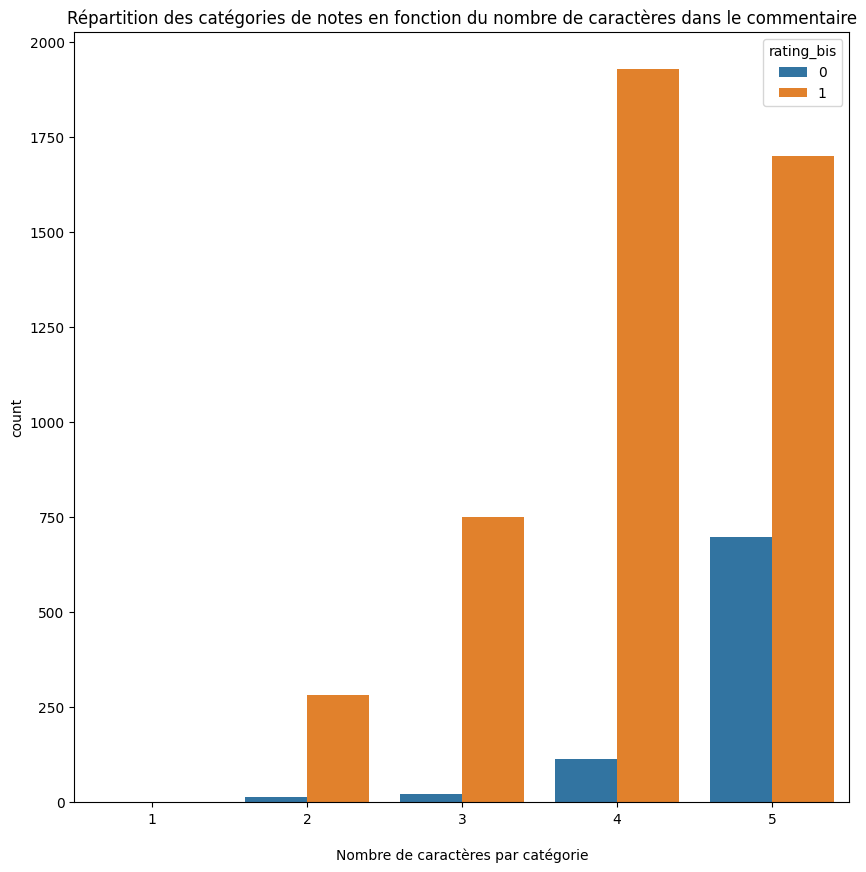

In [113]:
plt.figure(figsize=(10,10))
sns.countplot(x='Cat_characters', hue='rating_bis', data=df);
plt.xlabel('\nNombre de caractères par catégorie')
plt.title('Répartition des catégories de notes en fonction du nombre de caractères dans le commentaire');

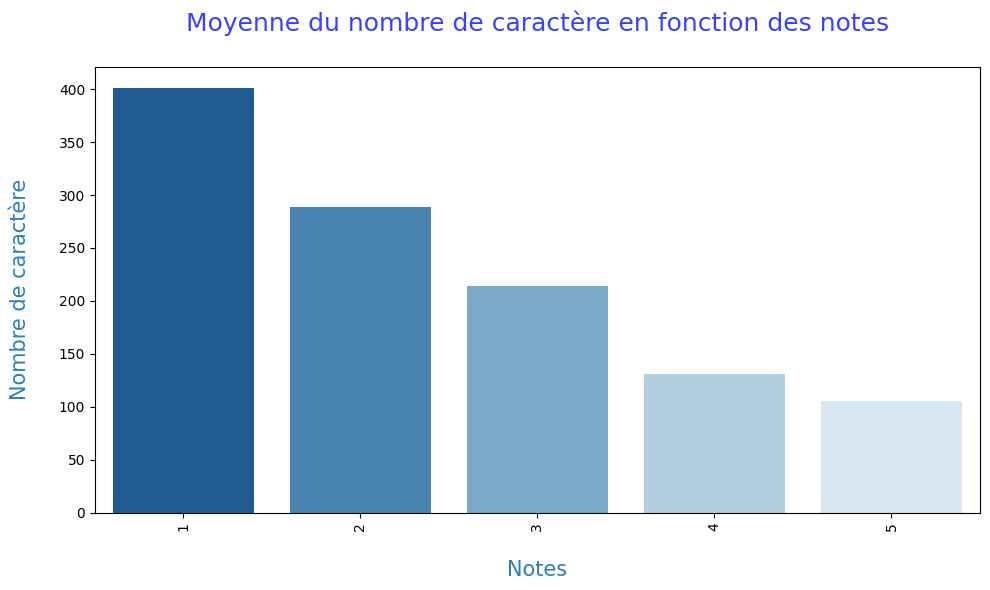

In [114]:
notescar = df[['total_characters','rating']].groupby('rating').mean().sort_values(by='total_characters', ascending=False)
notescar.reset_index(0, inplace=True)
notescar.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= notescar['rating'], y= notescar['total_characters'], palette="Blues_r")
plt.xlabel('\nNotes', fontsize=15, color='#2980b9')
plt.ylabel('Nombre de caractère\n', fontsize=15, color='#2980b9')
plt.title("Moyenne du nombre de caractère en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 90)
plt.tight_layout()

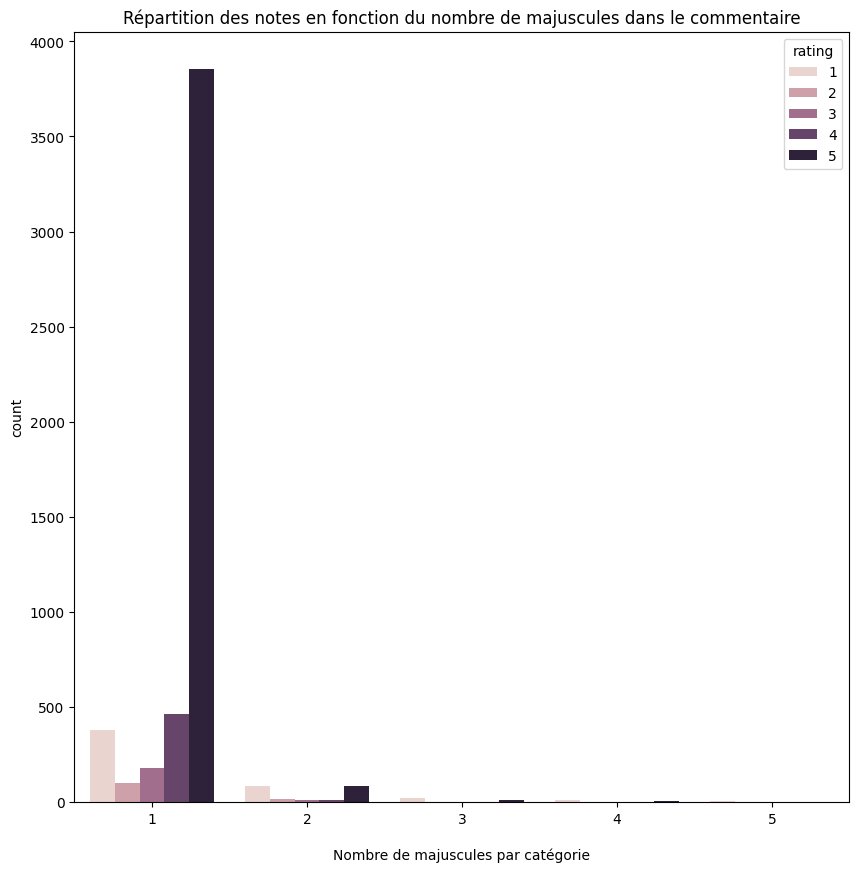

In [115]:
plt.figure(figsize=(10,10))
sns.countplot(x='Cat_cap_characters', hue='rating', data=df);
plt.xlabel('\nNombre de majuscules par catégorie')
plt.title('Répartition des notes en fonction du nombre de majuscules dans le commentaire');

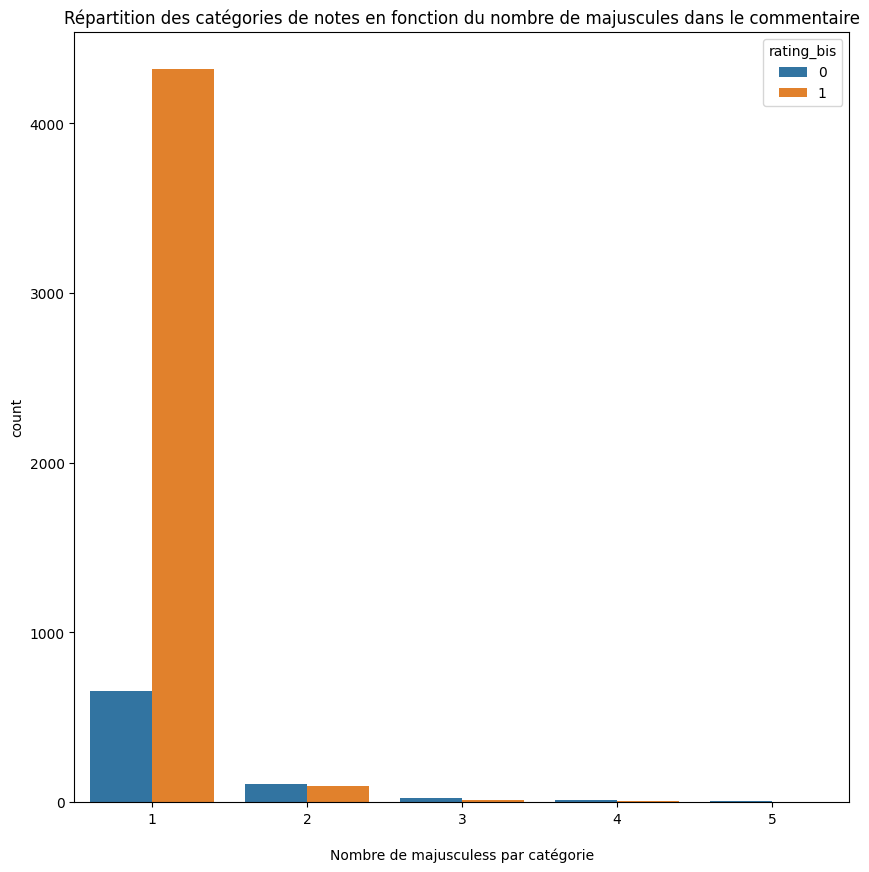

In [116]:
plt.figure(figsize=(10,10))
sns.countplot(x='Cat_cap_characters', hue='rating_bis', data=df);
plt.xlabel('\nNombre de majusculess par catégorie')
plt.title('Répartition des catégories de notes en fonction du nombre de majuscules dans le commentaire');

   rating  Cat_cap_characters
0       1            1.354251
1       2            1.159292
2       3            1.082902
4       5            1.031598
3       4            1.027254


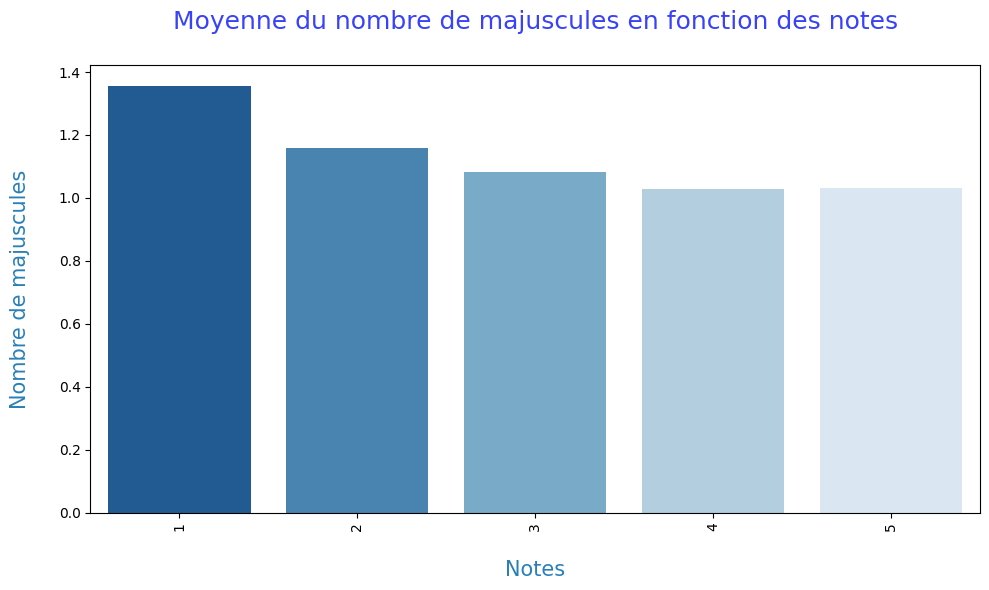

In [117]:
# Assurer que 'Cat_cap_characters' est bien un nombre
df['Cat_cap_characters'] = pd.to_numeric(df['Cat_cap_characters'], errors='coerce')

# Calcul de la moyenne des majuscules par note
notesmaj = df.groupby('rating', as_index=False)['Cat_cap_characters'].mean()
notesmaj = notesmaj.sort_values(by='Cat_cap_characters', ascending=False)

# Affichage des 10 premières lignes
print(notesmaj.head(10))

# Visualisation
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='Cat_cap_characters', data=notesmaj, palette="Blues_r")
plt.xlabel('\nNotes', fontsize=15, color='#2980b9')
plt.ylabel('Nombre de majuscules\n', fontsize=15, color='#2980b9')
plt.title("Moyenne du nombre de majuscules en fonction des notes\n", fontsize=18, color='#3742fa')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

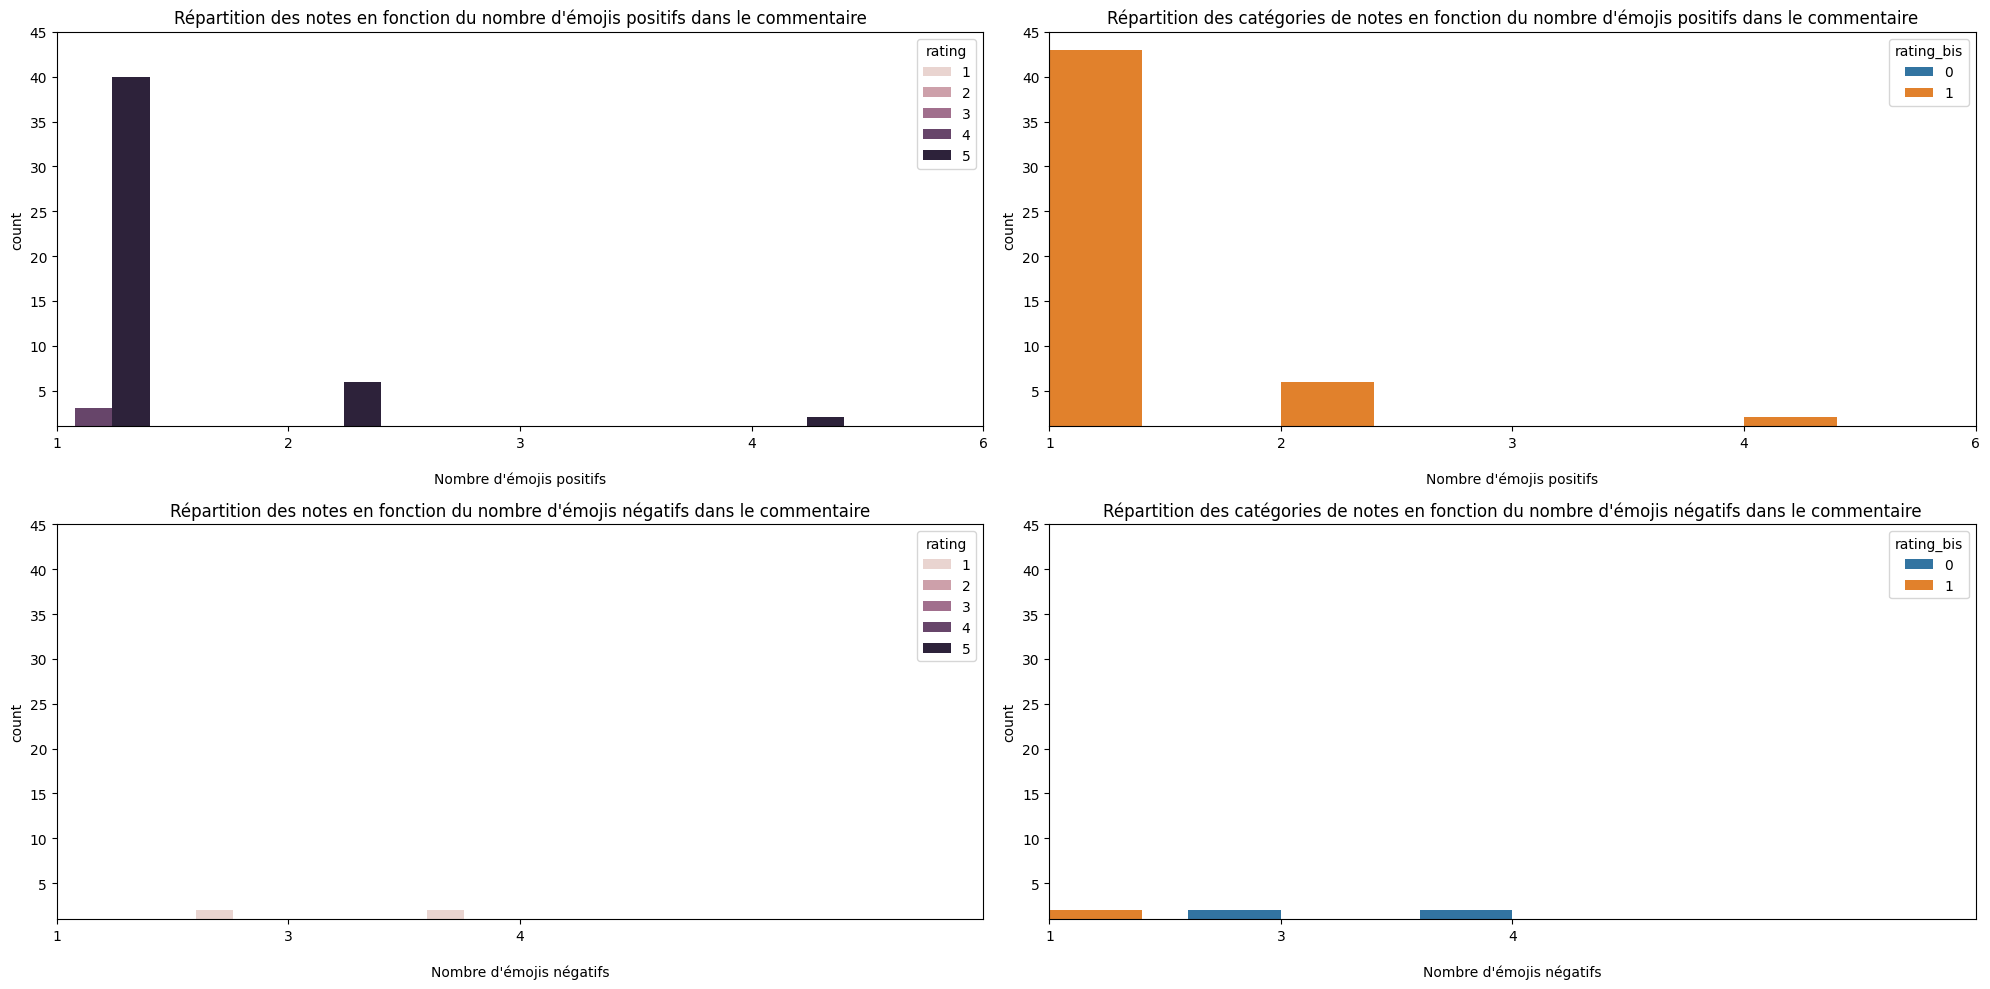

In [118]:
# Création d'une figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Premier graphique : emojis positifs vs rating
sns.countplot(x='positive_emojis', hue='rating', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel("\nNombre d'émojis positifs")
axes[0, 0].set_xlim(1, 5)
axes[0, 0].set_ylim(1, 45)
axes[0, 0].set_title("Répartition des notes en fonction du nombre d'émojis positifs dans le commentaire")

# Deuxième graphique : emojis positifs vs rating_bis
sns.countplot(x='positive_emojis', hue='rating_bis', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel("\nNombre d'émojis positifs")
axes[0, 1].set_xlim(1, 5)
axes[0, 1].set_ylim(1, 45)
axes[0, 1].set_title("Répartition des catégories de notes en fonction du nombre d'émojis positifs dans le commentaire")

# Troisième graphique : emojis négatifs vs rating
sns.countplot(x='negative_emojis', hue='rating', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel("\nNombre d'émojis négatifs")
axes[1, 0].set_xlim(1, 5)
axes[1, 0].set_ylim(1, 45)
axes[1, 0].set_title("Répartition des notes en fonction du nombre d'émojis négatifs dans le commentaire")

# Quatrième graphique : emojis négatifs vs rating_bis
sns.countplot(x='negative_emojis', hue='rating_bis', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel("\nNombre d'émojis négatifs")
axes[1, 1].set_xlim(1, 5)
axes[1, 1].set_ylim(1, 45)
axes[1, 1].set_title("Répartition des catégories de notes en fonction du nombre d'émojis négatifs dans le commentaire")

# Ajustement de l'affichage
plt.tight_layout()
plt.show()

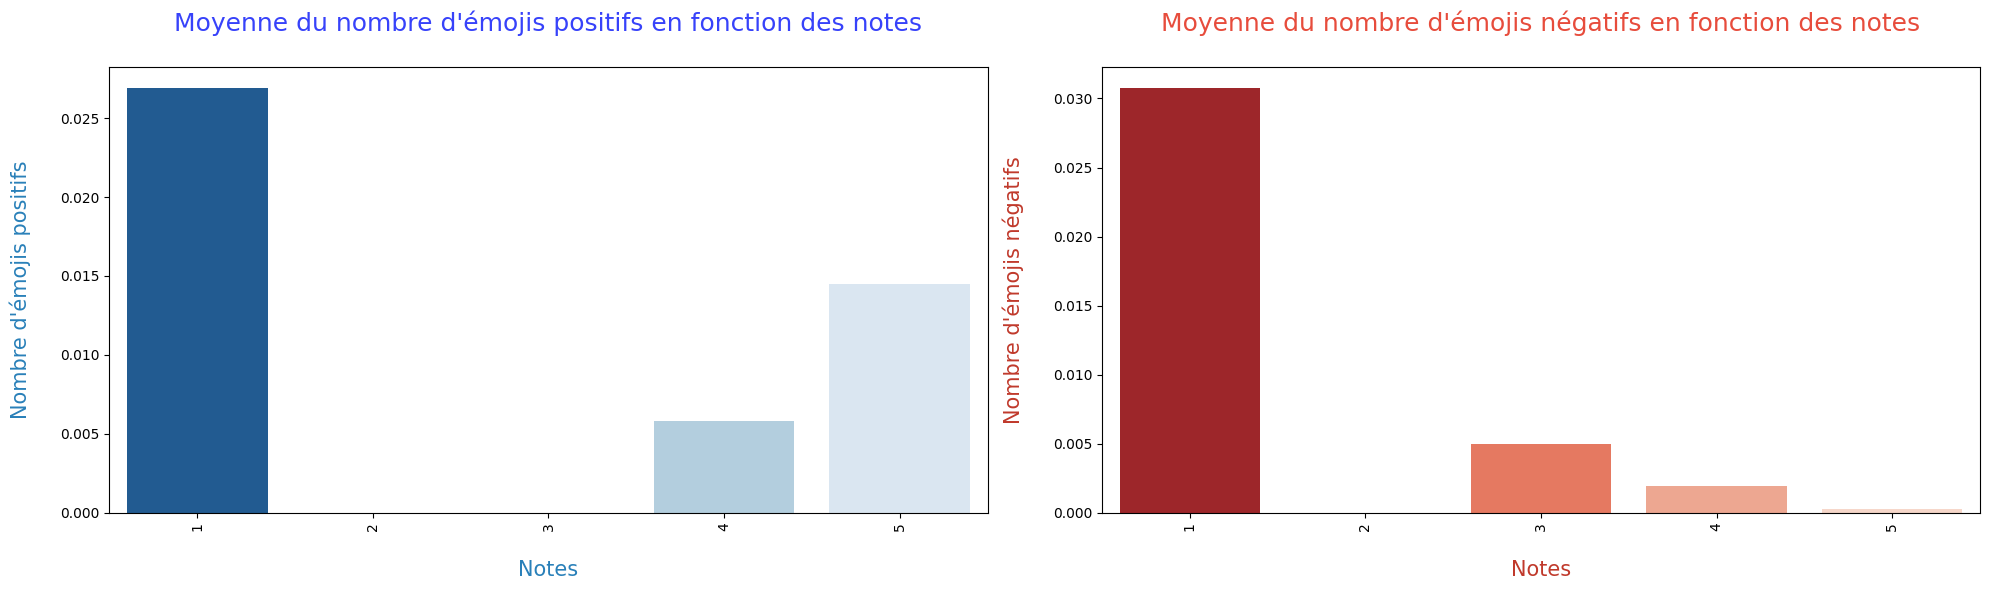

In [119]:
# Création d'une figure avec 2 sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Moyenne des emojis positifs par note
notespo = df[['positive_emojis', 'rating']].groupby('rating').mean().sort_values(by='positive_emojis', ascending=False)
notespo.reset_index(inplace=True)

# Premier graphique - Émojis positifs
sns.barplot(x=notespo['rating'], y=notespo['positive_emojis'], palette="Blues_r", ax=axes[0])
axes[0].set_xlabel("\nNotes", fontsize=15, color='#2980b9')
axes[0].set_ylabel("Nombre d'émojis positifs\n", fontsize=15, color='#2980b9')
axes[0].set_title("Moyenne du nombre d'émojis positifs en fonction des notes\n", fontsize=18, color='#3742fa')

# Moyenne des emojis négatifs par note
notesneg = df[['negative_emojis', 'rating']].groupby('rating').mean().sort_values(by='negative_emojis', ascending=False)
notesneg.reset_index(inplace=True)

# Deuxième graphique - Émojis négatifs
sns.barplot(x=notesneg['rating'], y=notesneg['negative_emojis'], palette="Reds_r", ax=axes[1])
axes[1].set_xlabel("\nNotes", fontsize=15, color='#c0392b')
axes[1].set_ylabel("Nombre d'émojis négatifs\n", fontsize=15, color='#c0392b')
axes[1].set_title("Moyenne du nombre d'émojis négatifs en fonction des notes\n", fontsize=18, color='#e74c3c')

# Rotation des ticks et ajustement de l'affichage
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [123]:
df.columns

Index(['liens_marque', 'user_name', 'review_title', 'review_body', 'response',
       'response_date', 'rating', 'experience_date', 'review_date', 'site_url',
       'scrap_date', 'marque', 'categorie', 'reviews', 'pays', 'trust_score',
       'cat_response', 'diff_experience_review', 'diff_review_response',
       'exp_year', 'exp_month', 'exp_day', 'exp_day_of_week', 'review_year',
       'review_month', 'review_day', 'review_day_of_week', 'review',
       'num_special_characters', 'num_uppercase_characters',
       'total_characters', 'positive_emojis', 'negative_emojis',
       'extracted_emojis', 'commentaire_text', 'contains_emoji', 'langue',
       'commentaire_en', 'verif_traduction', 'Cat_characters',
       'Cat_cap_characters', 'rating_bis'],
      dtype='object')

In [129]:
# compter le nombre de point d'intérogation '?'
df['nombre_point_intero'] = df['review'].apply(lambda x: x.count('?'))
# compter le nombre de point d'exclamation '!'
df['nombre_point_exclam'] = df['review'].apply(lambda x: x.count('!'))

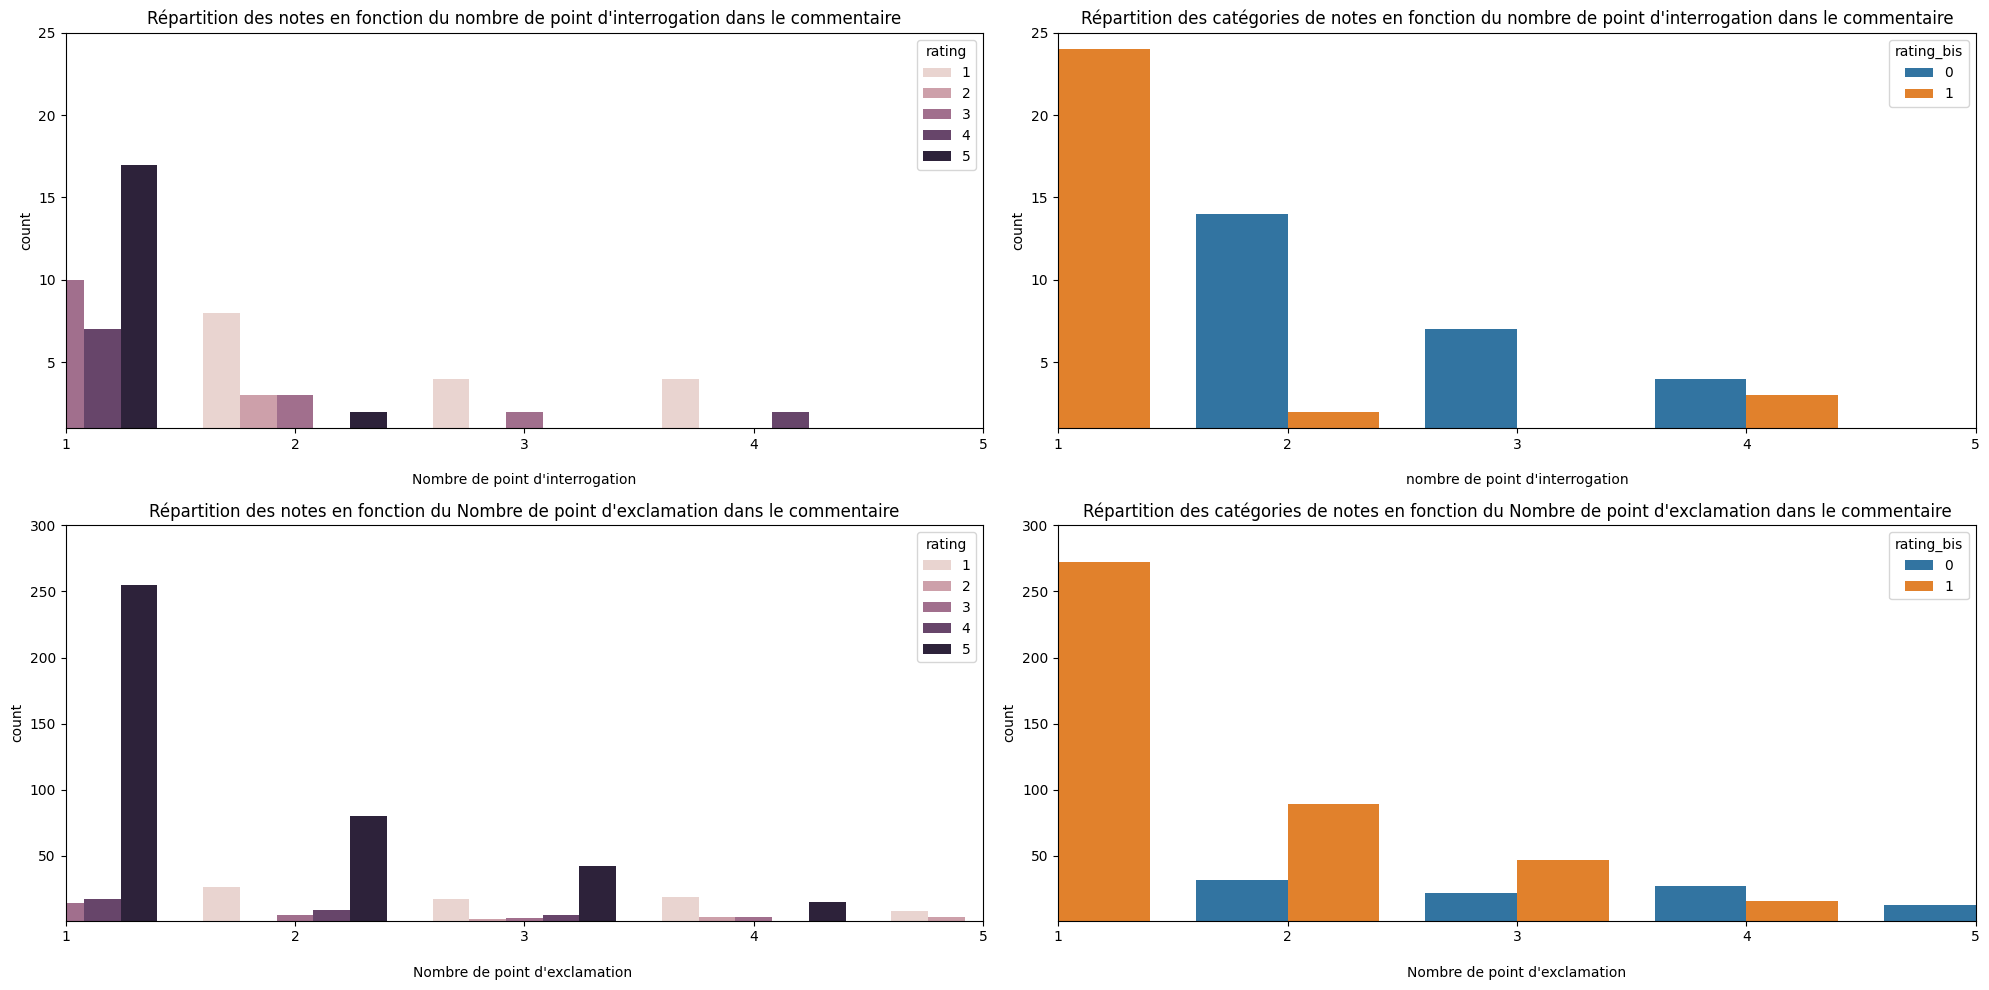

In [135]:
# Création d'une figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Premier graphique : emojis positifs vs rating
sns.countplot(x='nombre_point_intero', hue='rating', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel("\nNombre de point d'interrogation")
axes[0, 0].set_xlim(1, 5)
axes[0, 0].set_ylim(1, 25)
axes[0, 0].set_title("Répartition des notes en fonction du nombre de point d'interrogation dans le commentaire")

# Deuxième graphique : emojis positifs vs rating_bis
sns.countplot(x='nombre_point_intero', hue='rating_bis', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel("\nnombre de point d'interrogation")
axes[0, 1].set_xlim(1, 5)
axes[0, 1].set_ylim(1, 25)
axes[0, 1].set_title("Répartition des catégories de notes en fonction du nombre de point d'interrogation dans le commentaire")

# Troisième graphique : emojis négatifs vs rating
sns.countplot(x='nombre_point_exclam', hue='rating', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel("\nNombre de point d'exclamation ")
axes[1, 0].set_xlim(1, 5)
axes[1, 0].set_ylim(1, 300)
axes[1, 0].set_title("Répartition des notes en fonction du Nombre de point d'exclamation dans le commentaire")

# Quatrième graphique : emojis négatifs vs rating_bis
sns.countplot(x='nombre_point_exclam', hue='rating_bis', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel("\nNombre de point d'exclamation")
axes[1, 1].set_xlim(1, 5)
axes[1, 1].set_ylim(1, 300)
axes[1, 1].set_title("Répartition des catégories de notes en fonction du Nombre de point d'exclamation dans le commentaire")

# Ajustement de l'affichage
plt.tight_layout()
plt.show()

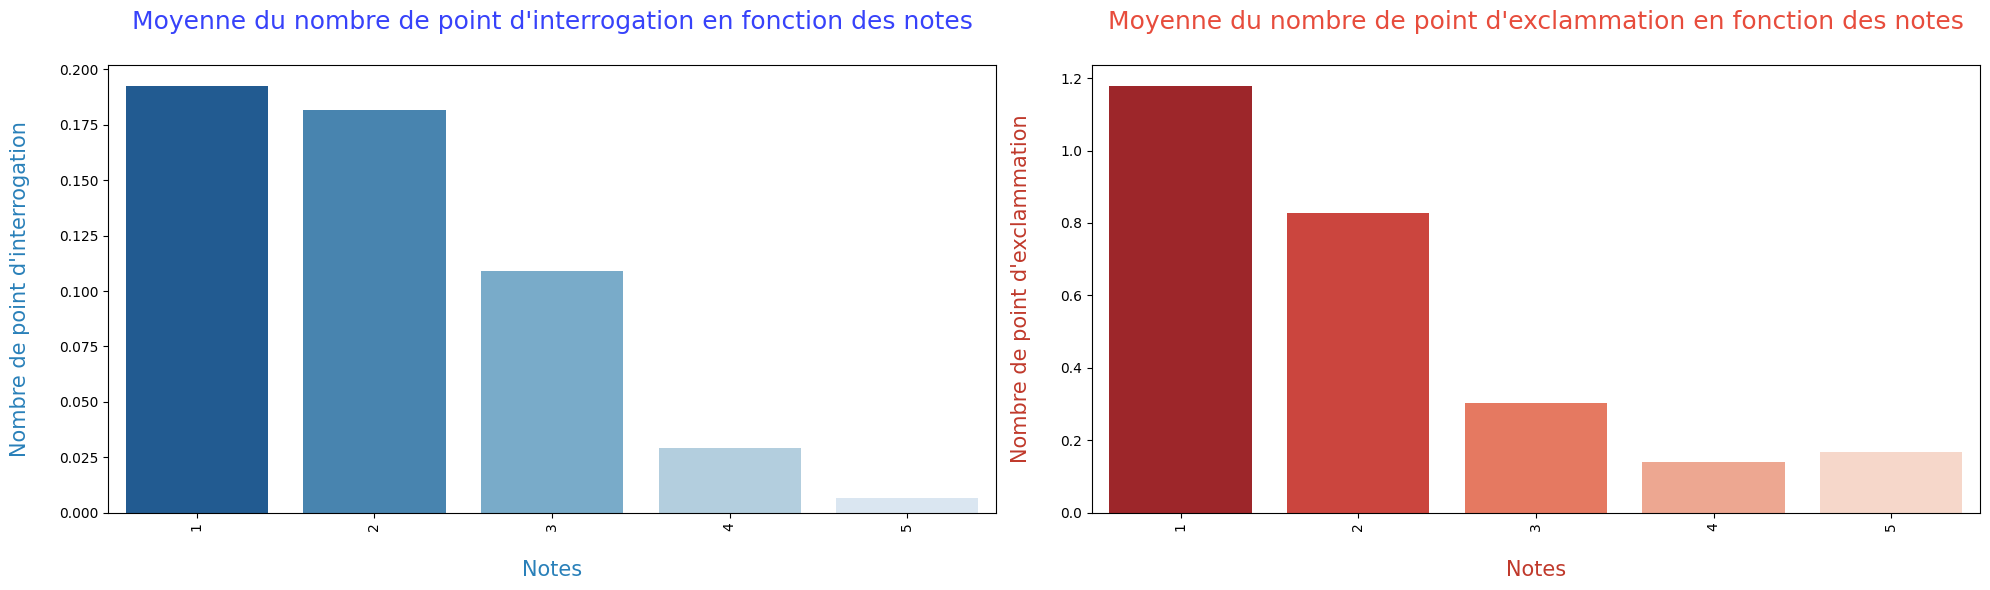

In [136]:
# Création d'une figure avec 2 sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Moyenne des emojis positifs par note
notespo = df[['nombre_point_intero', 'rating']].groupby('rating').mean().sort_values(by='nombre_point_intero', ascending=False)
notespo.reset_index(inplace=True)

# Premier graphique - Émojis positifs
sns.barplot(x=notespo['rating'], y=notespo['nombre_point_intero'], palette="Blues_r", ax=axes[0])
axes[0].set_xlabel("\nNotes", fontsize=15, color='#2980b9')
axes[0].set_ylabel("Nombre de point d'interrogation\n", fontsize=15, color='#2980b9')
axes[0].set_title("Moyenne du nombre de point d'interrogation en fonction des notes\n", fontsize=18, color='#3742fa')

# Moyenne des emojis négatifs par note
notesneg = df[['nombre_point_exclam', 'rating']].groupby('rating').mean().sort_values(by='nombre_point_exclam', ascending=False)
notesneg.reset_index(inplace=True)

# Deuxième graphique - Émojis négatifs
sns.barplot(x=notesneg['rating'], y=notesneg['nombre_point_exclam'], palette="Reds_r", ax=axes[1])
axes[1].set_xlabel("\nNotes", fontsize=15, color='#c0392b')
axes[1].set_ylabel("Nombre de point d'exclammation\n", fontsize=15, color='#c0392b')
axes[1].set_title("Moyenne du nombre de point d'exclammation en fonction des notes\n", fontsize=18, color='#e74c3c')

# Rotation des ticks et ajustement de l'affichage
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [121]:
df.columns

Index(['liens_marque', 'user_name', 'review_title', 'review_body', 'response',
       'response_date', 'rating', 'experience_date', 'review_date', 'site_url',
       'scrap_date', 'marque', 'categorie', 'reviews', 'pays', 'trust_score',
       'cat_response', 'diff_experience_review', 'diff_review_response',
       'exp_year', 'exp_month', 'exp_day', 'exp_day_of_week', 'review_year',
       'review_month', 'review_day', 'review_day_of_week', 'review',
       'num_special_characters', 'num_uppercase_characters',
       'total_characters', 'positive_emojis', 'negative_emojis',
       'extracted_emojis', 'commentaire_text', 'contains_emoji', 'langue',
       'commentaire_en', 'verif_traduction', 'Cat_characters',
       'Cat_cap_characters', 'rating_bis'],
      dtype='object')

## Création de nouvelle collonne : Sentiment 

La fonction que nous allons créer va classer les sentiments en fonction des valeurs de rating :

- 0, 1, 2 : Sentiment négatif.
- 4, 5 : Sentiment positif.
- 3 : Sentiment neutre.
Explication de la fonction :

def classifier_sentiment(rating) : Cette fonction prend en entrée la colonne rating et retourne un sentiment en fonction de la valeur.

- Si le rating est inférieur à 3, le sentiment sera négatif.
- Si le rating est 3, le sentiment sera neutre.
- Si le rating est supérieur ou égal à 4, le sentiment sera positif.

In [137]:
# Créer la fonction pour classifier le sentiment
def classifier_sentiment(rating):
    if rating <= 2:
        return 'Négatif'
    elif rating == 3:
        return 'Neutre'
    elif rating >= 4:
        return 'Positif'
    else:
        return 'Inconnu'

# Appliquer la fonction au dataframe
df['sentiment'] = df['rating'].apply(classifier_sentiment)

# Vérification des résultats
print(df[['rating', 'sentiment']].head(10))  # Affiche les premières entrées pour voir le résultat de la classification

   rating sentiment
0       5   Positif
1       5   Positif
2       5   Positif
3       5   Positif
4       5   Positif
5       5   Positif
6       5   Positif
7       5   Positif
8       5   Positif
9       5   Positif


In [138]:
# Calculer le pourcentage de chaque sentiment
sentiment_counts = (df['sentiment'].value_counts(normalize=True) * 100).round(2)
# Afficher les pourcentages
print(sentiment_counts)

sentiment
Positif    84.68
Négatif    11.65
Neutre      3.67
Name: proportion, dtype: float64


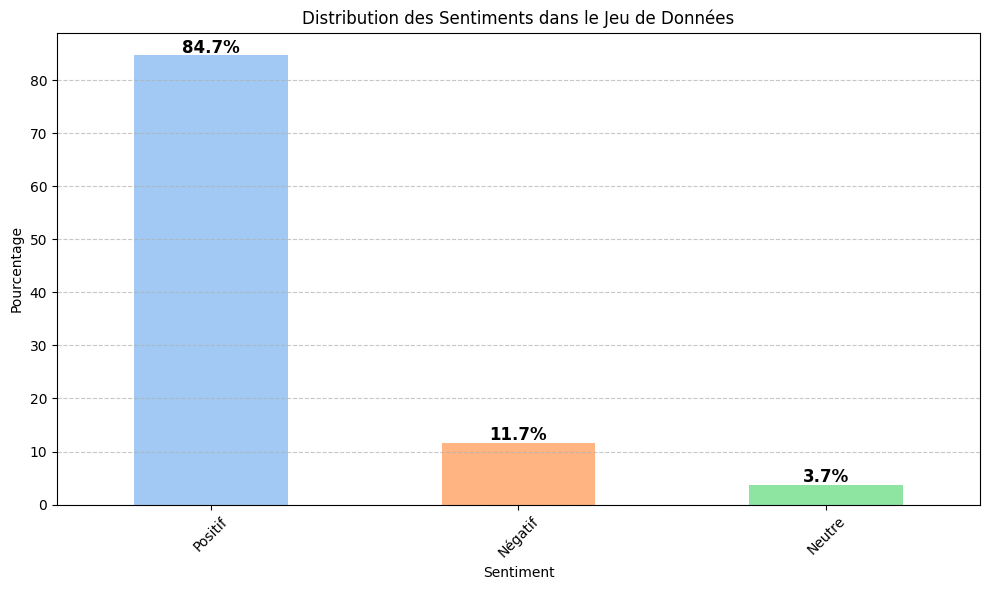

In [139]:
# Plotting
plt.figure(figsize=(10, 6))
ax = sentiment_counts.plot(kind='bar', color = sns.color_palette('pastel'))

# Annotation des pourcentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center', fontsize=12, fontweight='bold')

plt.title('Distribution des Sentiments dans le Jeu de Données')
plt.xlabel('Sentiment')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)  # Rotation des noms des sentiments
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Lignes de la grille

plt.tight_layout()  # Ajustement de l'affichage

plt.show()

In [141]:
# Groupement par 'sentiment'
sentiment_analysis = df.groupby('sentiment').agg({
    'total_characters': 'mean',
    'num_special_characters': 'mean',
    'num_uppercase_characters': 'mean',
    'positive_emojis': 'mean',
    'negative_emojis': 'mean'
}).reset_index()

# Renommer les colonnes
sentiment_analysis.columns = ['sentiment', 'avg_total_characters', 'avg_special_characters', 'avg_uppercase_characters', 'avg_positive_emojis', 'avg_negative_emojis']

# Afficher les résultats
sentiment_analysis


sentiment  avg_total_characters  avg_special_characters  \
0    Neutre            214.168317                6.054455   
1   Négatif            380.067083               12.436817   
2   Positif            108.224844                2.986913   

   avg_uppercase_characters  avg_positive_emojis  avg_negative_emojis  
0                  4.480198             0.000000             0.004950  
1                  9.770671             0.021841             0.024961  
2                  3.105128             0.013516             0.000429

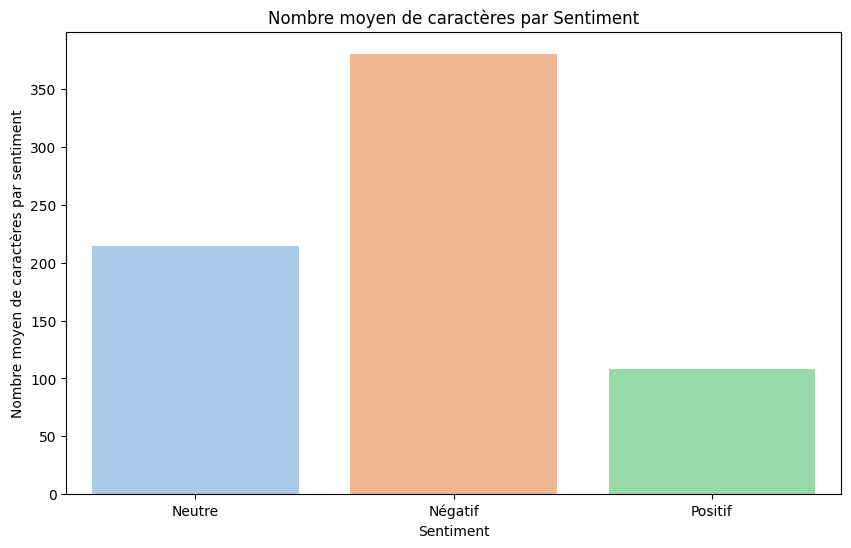

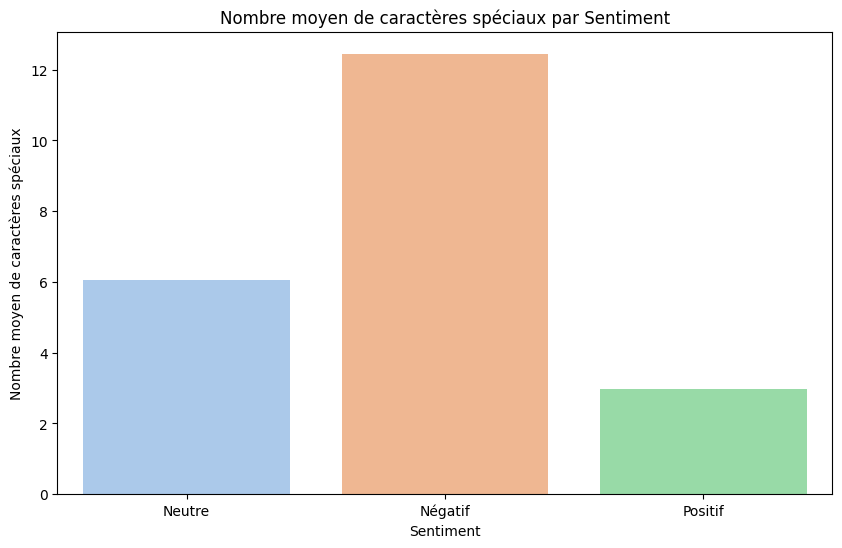

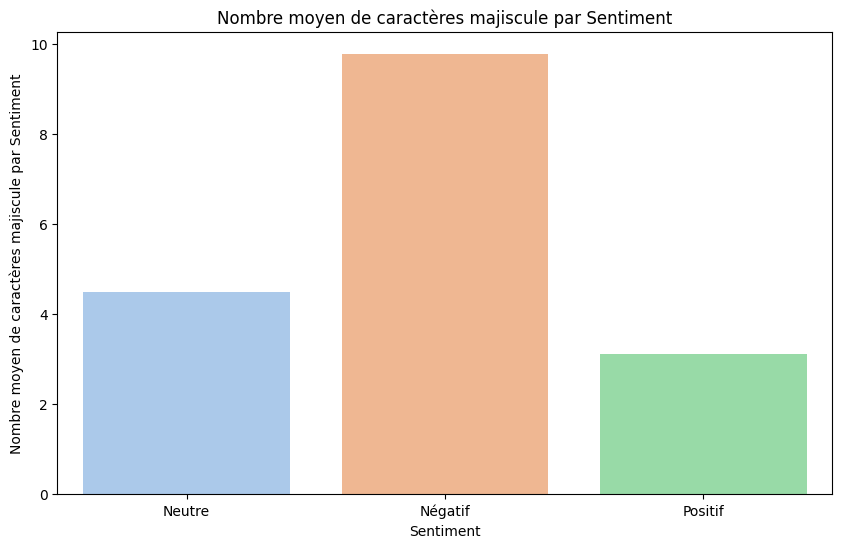

In [142]:
# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='avg_total_characters', data=sentiment_analysis, palette='pastel')
plt.title("Nombre moyen de caractères par Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Nombre moyen de caractères par sentiment")
plt.show()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='avg_special_characters', data=sentiment_analysis, palette='pastel')
plt.title("Nombre moyen de caractères spéciaux par Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Nombre moyen de caractères spéciaux")
plt.show()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='avg_uppercase_characters', data=sentiment_analysis, palette='pastel')
plt.title("Nombre moyen de caractères majiscule par Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Nombre moyen de caractères majiscule par Sentiment")
plt.show()

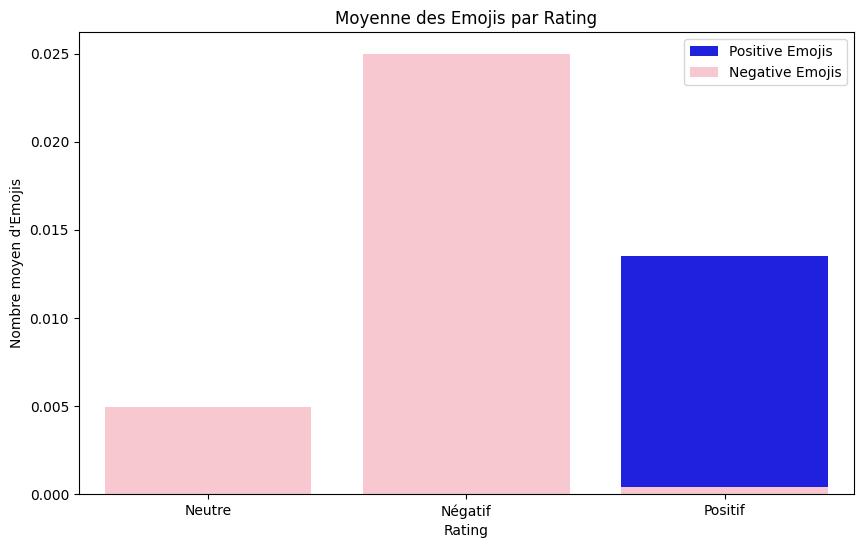

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='avg_positive_emojis', data=sentiment_analysis, color='blue', label='Positive Emojis')
sns.barplot(x='sentiment', y='avg_negative_emojis', data=sentiment_analysis, color='pink', label='Negative Emojis')
plt.title("Moyenne des Emojis par Rating")
plt.xlabel("Rating")
plt.ylabel("Nombre moyen d'Emojis")
plt.legend()
plt.show()

In [145]:
df.columns

Index(['liens_marque', 'user_name', 'review_title', 'review_body', 'response',
       'response_date', 'rating', 'experience_date', 'review_date', 'site_url',
       'scrap_date', 'marque', 'categorie', 'reviews', 'pays', 'trust_score',
       'cat_response', 'diff_experience_review', 'diff_review_response',
       'exp_year', 'exp_month', 'exp_day', 'exp_day_of_week', 'review_year',
       'review_month', 'review_day', 'review_day_of_week', 'review',
       'num_special_characters', 'num_uppercase_characters',
       'total_characters', 'positive_emojis', 'negative_emojis',
       'extracted_emojis', 'commentaire_text', 'contains_emoji', 'langue',
       'commentaire_en', 'verif_traduction', 'Cat_characters',
       'Cat_cap_characters', 'rating_bis', 'nombre_point_intero',
       'nombre_point_exclam', 'sentiment'],
      dtype='object')

In [147]:
df['message_len'] = df['review'].apply(lambda x: len(x.split(' ')))
df.head()

liens_marque user_name  \
0  www.younited-credit.com       GUY   
1  www.younited-credit.com  Masselot   
2  www.younited-credit.com   cliente   
3  www.younited-credit.com     Hondo   
4  www.younited-credit.com     Sonia   

                               review_title  \
0                                   MERCI !   
1               Rapide , simple et efficace   
2          Réponse ultra rapide et surtout…   
3             Rapport service client au top   
4  Elle m'a permise de réaliser mon projet…   

                                         review_body response  \
0  Bonjour je mets 5 étoiles car j'ai eu toute l'...     None   
1  Très accessible , il suffit de bien répondre e...     None   
2  Réponse ultra rapide et surtout accessible san...     None   
3  Rapport service client au top , joignable à l’...     None   
4  Elle m'a permise de réaliser mon projet de lon...     None   

         response_date  rating      experience_date          review_date  \
0  2025-02-26 16:48:29       5  2025-01-09 00:00:00  2025-01-15 00:00:00   
1  2025-02-26 16:48:29       5  2025-01-06 00:00:00  2025-01-14 00:00:00   
2  2025-02-26 16:48:29       5  2025-01-03 00:00:00  2025-01-10 00:00:00   
3  2025-02-26 16:48:29       5  2025-01-07 00:00:00  2025-01-15 00:00:00   
4  2025-02-26 16:48:29       5  2025-01-10 00:00:00  2025-01-15 00:00:00   

                                            site_url           scrap_date  \
0  https://fr.trustpilot.com/review/www.younited-...  2025-01-15 00:00:00   
1  https://fr.trustpilot.com/review/www.younited-...  2025-01-15 00:00:00   
2  https://fr.trustpilot.com/review/www.younited-...  2025-01-15 00:00:00   
3  https://fr.trustpilot.com/review/www.younited-...  2025-01-15 00:00:00   
4  https://fr.trustpilot.com/review/www.younited-...  2025-01-15 00:00:00   

            marque categorie  reviews pays  trust_score cat_response  \
0  Younited Credit      bank    69598   FR          4.7            0   
1  Younited Credit      bank    69598   FR          4.7            0   
2  Younited Credit      bank    69598   FR          4.7            0   
3  Younited Credit      bank    69598   FR          4.7            0   
4  Younited Credit      bank    69598   FR          4.7            0   

   diff_experience_review  diff_review_response  exp_year  exp_month  exp_day  \
0                       6                    42      2025          1        4   
1                       8                    43      2025          1        1   
2                       7                    47      2025          1        5   
3                       8                    42      2025          1        2   
4                       5                    42      2025          1        5   

  exp_day_of_week  review_year  review_month  review_day review_day_of_week  \
0        Thursday         2025             1           3          Wednesday   
1          Monday         2025             1           2            Tuesday   
2          Friday         2025             1           5             Friday   
3         Tuesday         2025             1           3          Wednesday   
4          Friday         2025             1           3          Wednesday   

                                              review  num_special_characters  \
0  MERCI ! Bonjour je mets 5 étoiles car j'ai eu ...                       7   
1  Rapide , simple et efficace Très accessible , ...                       9   
2  Réponse ultra rapide et surtout… Réponse ultra...                       9   
3  Rapport service client au top Rapport service ...                       6   
4  Elle m'a permise de réaliser mon projet… Elle ...                       3   

   num_uppercase_characters  total_characters  positive_emojis  \
0                         7               329                0   
1                         4               289                0   
2                         5               330                0   
3                         4            

         count       mean        std  min   25%   50%   75%    max
rating                                                            
1        520.0  69.001923  65.980335  3.0  27.0  48.0  90.0  447.0
2        121.0  48.975207  46.465662  3.0  19.0  36.0  59.0  262.0
3        202.0  36.643564  33.586625  2.0  16.0  27.0  44.0  197.0
4        514.0  21.770428  20.694798  2.0   9.0  15.5  27.0  226.0
5       4147.0  17.100313  16.745320  2.0   8.0  12.0  21.0  401.0


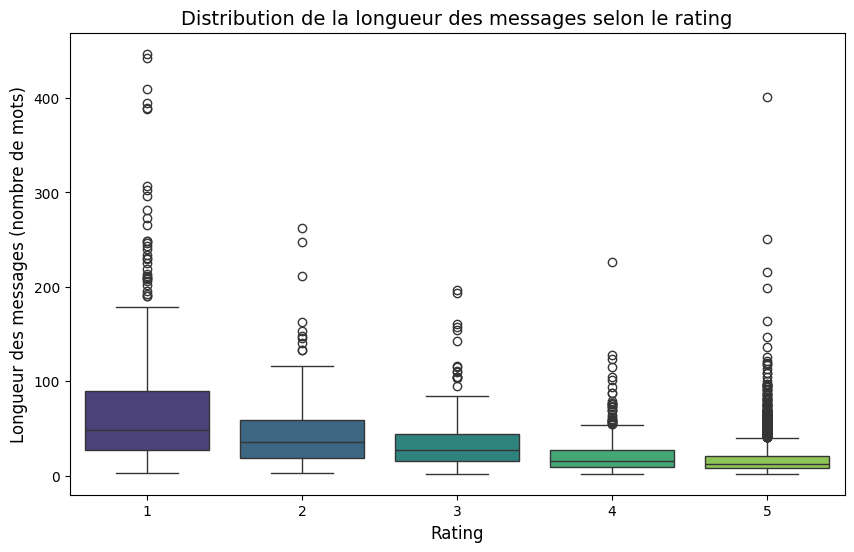

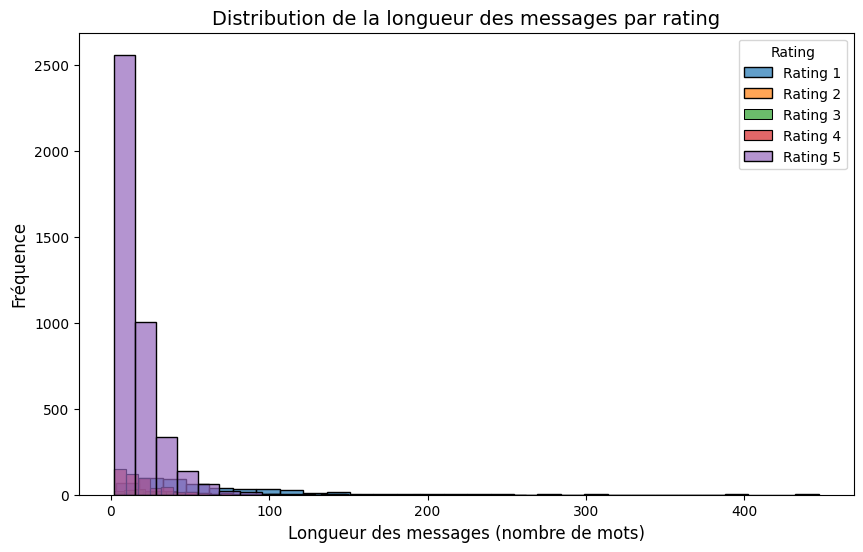

In [148]:
# Ajouter la longueur des messages
df['message_len'] = df['review'].apply(lambda x: len(str(x).split(' ')))

# Statistiques descriptives par rating
print(df.groupby('rating')['message_len'].describe())

# Boxplot pour visualiser la distribution de la longueur des messages selon le rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='message_len', palette='viridis')
plt.title('Distribution de la longueur des messages selon le rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Longueur des messages (nombre de mots)', fontsize=12)
plt.show()

# Histogrammes empilés pour visualiser la distribution par rating
plt.figure(figsize=(10, 6))
for rating in sorted(df['rating'].unique()):
    sns.histplot(
        df[df['rating'] == rating]['message_len'], 
        label=f'Rating {rating}', kde=False, bins=30, alpha=0.7
    )

plt.title('Distribution de la longueur des messages par rating', fontsize=14)
plt.xlabel('Longueur des messages (nombre de mots)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend(title='Rating')
plt.show()

            count       mean        std  min   25%   50%   75%    max
sentiment                                                            
Neutre      202.0  36.643564  33.586625  2.0  16.0  27.0  44.0  197.0
Négatif     641.0  65.221529  63.219268  3.0  25.0  45.0  84.0  447.0
Positif    4661.0  17.615319  17.284797  2.0   8.0  12.0  21.0  401.0


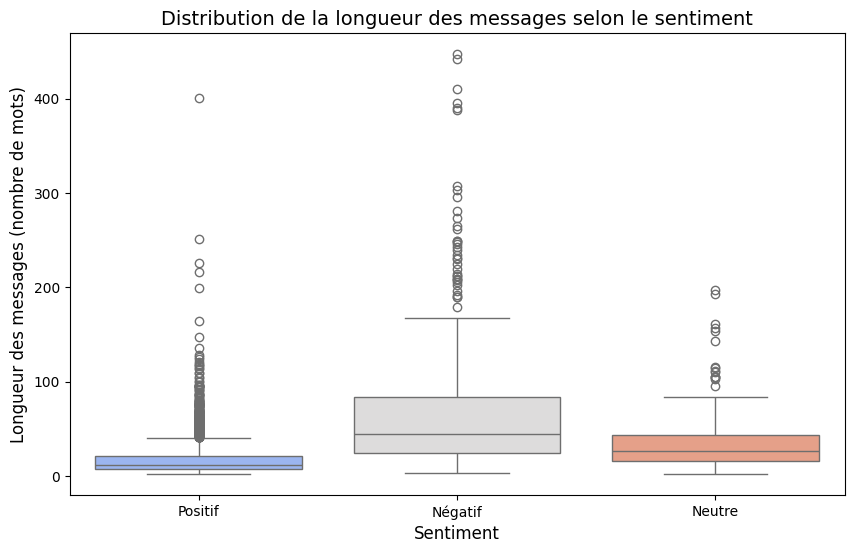

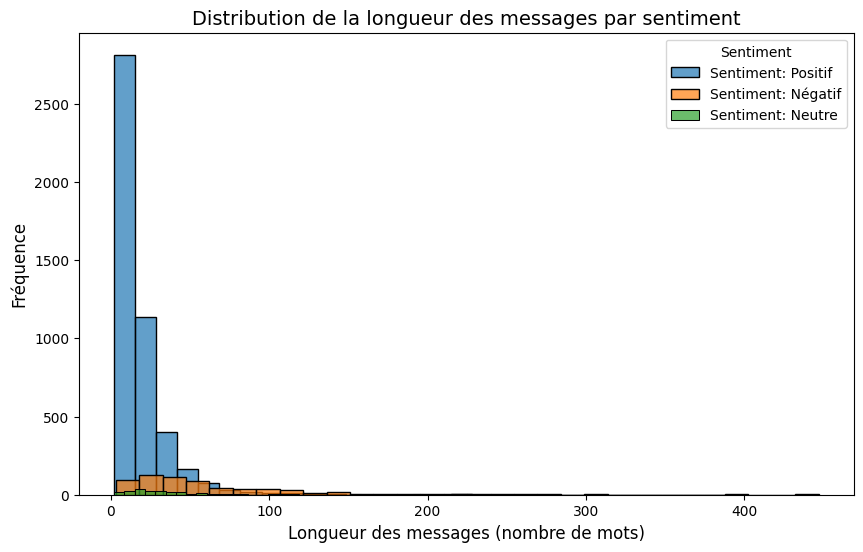

In [149]:
# Statistiques descriptives par sentiment
print(df.groupby('sentiment')['message_len'].describe())

# Boxplot pour la distribution selon le sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='message_len', palette='coolwarm')
plt.title('Distribution de la longueur des messages selon le sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Longueur des messages (nombre de mots)', fontsize=12)
plt.show()

# Histogrammes empilés pour visualiser la distribution par sentiment
plt.figure(figsize=(10, 6))
for sentiment in df['sentiment'].unique():
    sns.histplot(
        df[df['sentiment'] == sentiment]['message_len'], 
        label=f'Sentiment: {sentiment}', kde=False, bins=30, alpha=0.7
    )

plt.title('Distribution de la longueur des messages par sentiment', fontsize=14)
plt.xlabel('Longueur des messages (nombre de mots)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend(title='Sentiment')
plt.show()

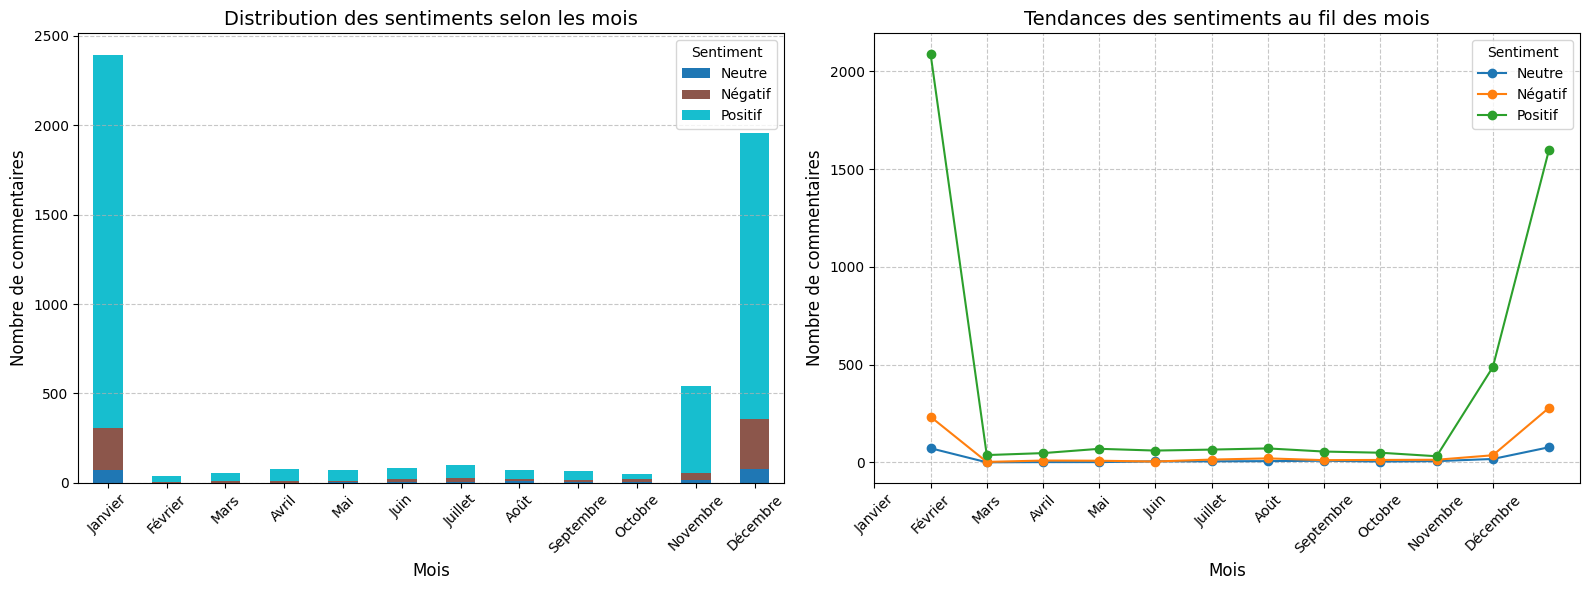

In [150]:
# Grouper par mois et sentiment, et compter
monthly_sentiment_distribution = df.groupby(['review_month', 'sentiment']).size().unstack(fill_value=0)

# Création du subplot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Graphique en barres empilées (à gauche)
monthly_sentiment_distribution.plot(kind='bar', stacked=True, ax=ax[0], colormap='tab10')
ax[0].set_title('Distribution des sentiments selon les mois', fontsize=14)
ax[0].set_xlabel('Mois', fontsize=12)
ax[0].set_ylabel('Nombre de commentaires', fontsize=12)
ax[0].legend(title='Sentiment', loc='upper right')
ax[0].set_xticks(range(12))
ax[0].set_xticklabels([
    'Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 
    'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'
], rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Graphique en lignes (à droite)
monthly_sentiment_distribution.plot(kind='line', ax=ax[1], marker='o')
ax[1].set_title('Tendances des sentiments au fil des mois', fontsize=14)
ax[1].set_xlabel('Mois', fontsize=12)
ax[1].set_ylabel('Nombre de commentaires', fontsize=12)
ax[1].legend(title='Sentiment', loc='upper right')
ax[1].set_xticks(range(12))
ax[1].set_xticklabels([
    'Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 
    'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'
], rotation=45)
ax[1].grid(axis='both', linestyle='--', alpha=0.7)

# Ajustement des espaces et affichage
plt.tight_layout()
plt.show()

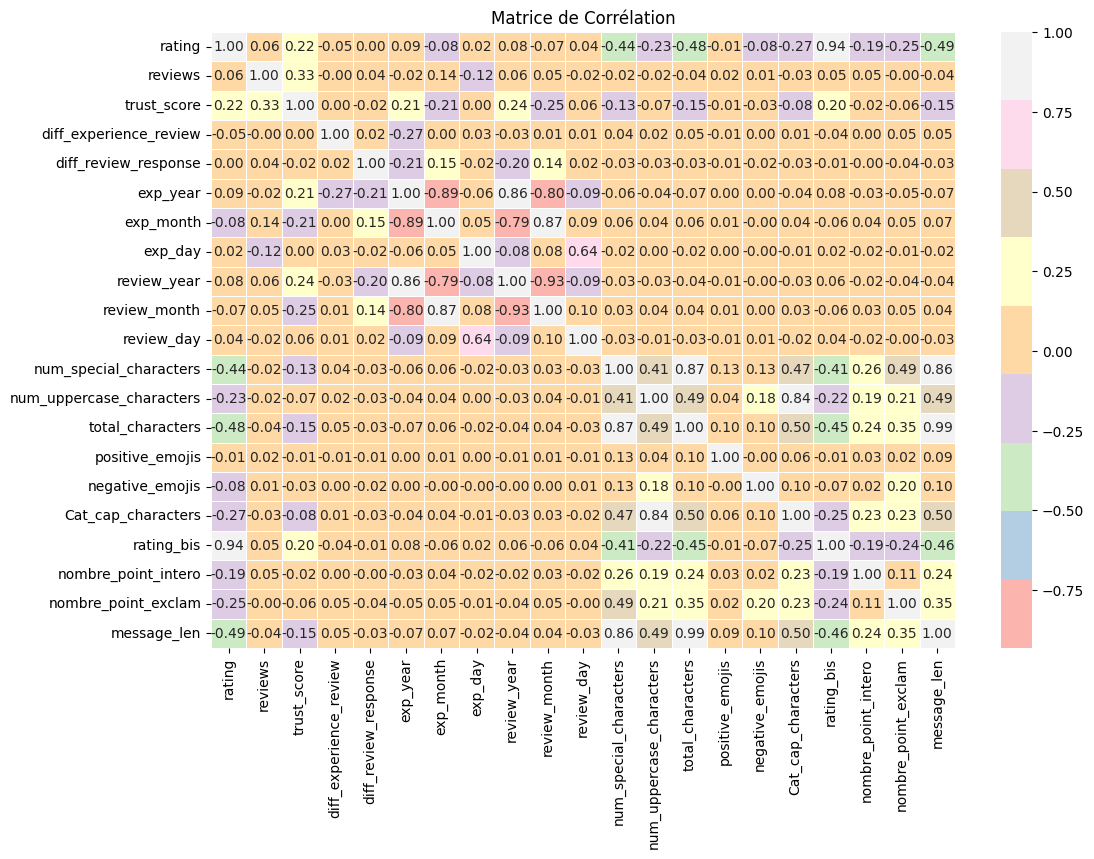

In [151]:
# Étape 1 : Sélectionner les colonnes numériques
numerical_data = df.select_dtypes(include=['number'])

# Étape 2 : Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Étape 3 : Visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [152]:
correlation_matrix

rating   reviews  trust_score  \
rating                    1.000000  0.055219     0.216271   
reviews                   0.055219  1.000000     0.332757   
trust_score               0.216271  0.332757     1.000000   
diff_experience_review   -0.046030 -0.001229     0.003582   
diff_review_response      0.001869  0.040516    -0.024203   
exp_year                  0.091041 -0.016255     0.212683   
exp_month                -0.078395  0.138367    -0.213098   
exp_day                   0.018197 -0.121358     0.001546   
review_year               0.075441  0.058123     0.244496   
review_month             -0.071448  0.049507    -0.245189   
review_day                0.038828 -0.019251     0.055911   
num_special_characters   -0.436716 -0.021823    -0.126236   
num_uppercase_characters -0.234243 -0.023691    -0.067154   
total_characters         -0.479563 -0.044204    -0.146482   
positive_emojis          -0.010503  0.019528    -0.009736   
negative_emojis          -0.080231  0.008133    -0.032600   
Cat_cap_characters       -0.266802 -0.027009    -0.082035   
rating_bis                0.936982  0.052195     0.203997   
nombre_point_intero      -0.192890  0.049747    -0.016246   
nombre_point_exclam      -0.251773 -0.003074    -0.061753   
message_len              -0.490780 -0.044372    -0.149466   

                          diff_experience_review  diff_review_response  \
rating                                 -0.046030              0.001869   
reviews                                -0.001229              0.040516   
trust_score                             0.003582             -0.024203   
diff_experience_review                  1.000000              0.022332   
diff_review_response                    0.022332              1.000000   
exp_year                               -0.268687             -0.213993   
exp_month                               0.004551              0.154973   
exp_day                                 0.032611             -0.021786   
review_year                            -0.025618             -0.201591   
review_month                            0.014947              0.144576   
review_day                              0.010924              0.021468   
num_special_characters                  0.042333             -0.031668   
num_uppercase_characters                0.024625             -0.030662   
total_characters                        0.054084             -0.026029   
positive_emojis                        -0.012714             -0.009112   
negative_emojis                         0.004658             -0.020728   
Cat_cap_characters                      0.013493             -0.033209   
rating_bis                             -0.043701             -0.008450   
nombre_point_intero                     0.003973             -0.004886   
nombre_point_exclam                     0.048485             -0.042236   
message_len                             0.051916             -0.026745   

                          exp_year  exp_month   exp_day  review_year  \
rating                    0.091041  -0.078395  0.018197     0.075441   
reviews                  -0.016255   0.138367 -0.121358     0.058123   
trust_score               0.212683  -0.213098  0.001546     0.244496   
diff_experience_review   -0.268687   0.004551  0.032611    -0.025618   
diff_review_response     -0.213993   0.154973 -0.021786    -0.201591   
exp_year                  1.000000  -0.892706 -0.055952     0.860292   
exp_month                -0.892706   1.000000  0.046221    -0.787475   
exp_day                  -0.055952   0.046221  1.000000    -0.083732   
review_year               0.860292  -0.787475 -0.083732     1.000000   
review_month             -0.796319   0.865602  0.084503    -0.931290   
review_day               -0.087831   0.088409  0.642038    -0.094262   
num_special_characters   -0.058090   0.055823 -0.017640    -0.030185   
num_uppercase_characters -0.037211   0.035192  0.001099    -0.033761   
total_characters         -0.069519   0.062714 -0

**1. Colonnes liées à l'utilisateur ou au produit :**

- *user_name* : Si cette colonne contient des informations uniques pour chaque utilisateur, il est peu probable que cela aide ton modèle, sauf si tu veux identifier des biais par utilisateur. Tu pourrais donc la supprimer.
- *review_title et review_body* : Bien que ce soient des colonnes textuelles, elles peuvent être traitées avec des techniques de traitement du langage naturel (NLP) pour extraire des informations utiles, mais elles sont très volumineuses, donc probablement à transformer avant.
- *response et response_date* : Ces colonnes peuvent être intéressantes si tu cherches à analyser les interactions, mais elles ne semblent pas essentielles pour la prédiction du rating.
- *scrap_date* : A moins que la date de récupération des données n'influence le modèle, elle pourrait être supprimée.
- *site_url* : Elle est probablement redondante ou peu informative et peut être supprimée.

**2. Colonnes temporelles :**

- *experience_date, review_date, exp_year, exp_month, exp_day, exp_day_of_week, review_year, review_month, review_day, review_day_of_week* : Ces colonnes peuvent être utiles pour capturer la saisonnalité ou l'impact du temps. Tu pourrais utiliser des informations comme *exp_month, review_month ou review_day_of_week*. L'année et le jour de la semaine peuvent également être transformés en variables cycliques si nécessaire.

**3. Colonnes relatives à l'expérience et aux réponses :**

- *marque, categorie, pays* : Ces colonnes peuvent être très pertinentes, car elles sont probablement liées au type de produit, à la localisation et à l'expérience. Tu devrais les conserver et les encoder en variables numériques (par exemple, encodage one-hot ou ordinal).
- *cat_response* : Semble catégorique et pourrait avoir un impact sur la prédiction du rating. Elle peut être utile à garder et transformer.
- *diff_experience_review, diff_review_response* : Ces colonnes semblent indiquer des différences, ce qui pourrait avoir un impact sur la prédiction du rating. Elles méritent d'être explorées pour leur utilité.

**4. Colonnes liées aux caractères et emojis :**
- *num_special_characters, num_uppercase_characters, total_characters* : Ces colonnes peuvent être liées à l'intensité ou la forme du commentaire. Elles pourraient être conservées si tu penses que cela a un impact sur la notation.
- *positive_emojis, negative_emojis* : Elles sont directement liées à l'émotion dans les avis et peuvent être très utiles.
- *contains_emoji* : Cette colonne pourrait être utilisée comme un indicateur pour déterminer l'impact des emojis sur le rating. Cela mérite d'être exploré.
- *extracted_emojis* : Semble être une version plus détaillée des emojis. Si c'est pertinent pour ton modèle, tu peux la garder, sinon, il est préférable de la supprimer.
**5. Colonnes supplémentaires :**
- *rating_bis* : Étant donné que cela ressemble à une autre version du rating, cette colonne peut être redondante et tu pourrais l'ignorer.
- *sentiment* : Cette colonne peut être utile si tu veux tester un modèle où le sentiment est une variable prédictive, mais elle peut être dérivée à partir des autres données (comme le rating).

**6. Colonnes de texte :**
- *commentaire_text, commentaire_en, verif_traduction* : Ces colonnes peuvent être importantes si tu souhaites analyser les avis en texte libre, mais elles nécessitent un prétraitement approfondi (NLP) pour en extraire des informations utiles.

**Colonnes à garder pour prédire le rating :**
Après cette analyse, voici les colonnes catégorielles et numériques qu'on pourrait envisager de garder :

cat_response, diff_experience_review, diff_review_response
exp_month, exp_day_of_week, review_month, review_day_of_week
num_special_characters, num_uppercase_characters, positive_emojis, negative_emojis
contains_emoji, sentiment, commentaire_en

Prochaines étapes : (notebook modelisation.ipynb)
Encodage des colonnes catégorielles : Utilise des techniques d'encodage comme One-Hot Encoding ou Label Encoding pour les colonnes catégorielles.
Prétraitement des colonnes textuelles : utiliser TF-IDF ou un modèle de Word Embedding  pour transformer la colonne commentaire_en en vecteurs numeriques
Exploration des relations : Examine les corrélations entre les variables catégorielles et numériques pour évaluer celles qui sont significatives pour la prédiction du rating.
Avec cette approche, on va  pouvoir bien préparer tes données pour le modèle de machine learning.

In [ ]:
df.columns

In [153]:
# Calculez les statistiques descriptives
mean = df['total_characters'].mean()
std = df['total_characters'].std()
Q1 = df['total_characters'].quantile(0.25)
Q3 = df['total_characters'].quantile(0.75)

# Identifiez les valeurs aberrantes en utilisant par exemple la règle des 1,5*IQR
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# données sans les valeurs aberrantes
valeurs_sans_aberrantes = df[(df['total_characters'] >= borne_inf) & (df['total_characters'] <= borne_sup)]
# données avec les valeurs aberrantes
valeurs_aberrantes = df[(df['total_characters'] < borne_inf) | (df['total_characters'] > borne_sup)]

In [154]:
# Définissez les intervalles et les étiquettes correspondantes
intervals = [0, 10 , 30 , 50, 100 , float('inf')]  # Les intervalles
labels = [1, 2, 3, 4 , 5]  # Les étiquettes correspondantes
# Utilisez la fonction cut pour créer une nouvelle colonne 'categories'
df['cat_nombre_caractères'] = pd.cut(df['total_characters'], bins=intervals, labels=labels)

#########################

# Définissez les intervalles et les étiquettes correspondantes
intervals = [0, 10, 30, 50, 100, float('inf')]  # Les intervalles
labels = [1, 2, 3, 4, 5]  # Les étiquettes correspondantes
# Utilisez la fonction cut pour créer une nouvelle colonne 'categories'
df['cat_num_uppercase_characters'] = pd.cut(df['num_uppercase_characters'], bins=intervals, labels=labels)

#### regrouper les notes en deux catégories: de 1 a 3 alors 0 et pour 4  et 5  alors 1
df['rating_bis'] = df['rating'].replace({1 : 0 , 2 : 0 , 3 : 0, 4 : 1 , 5 : 1}, inplace = False)

print(df['cat_nombre_caractères'].unique())
print(df['cat_num_uppercase_characters'].unique())
print(df['rating_bis'].unique())

[5, 4, 3, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
[1, 2, NaN, 3, 5, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
[1 0]


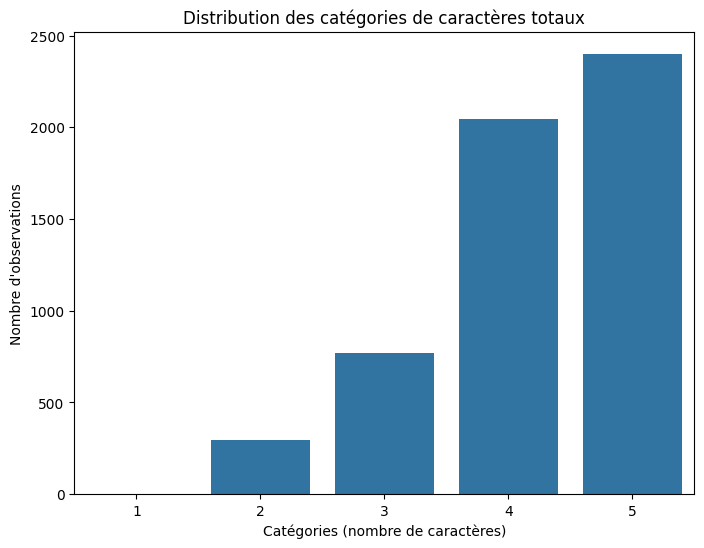

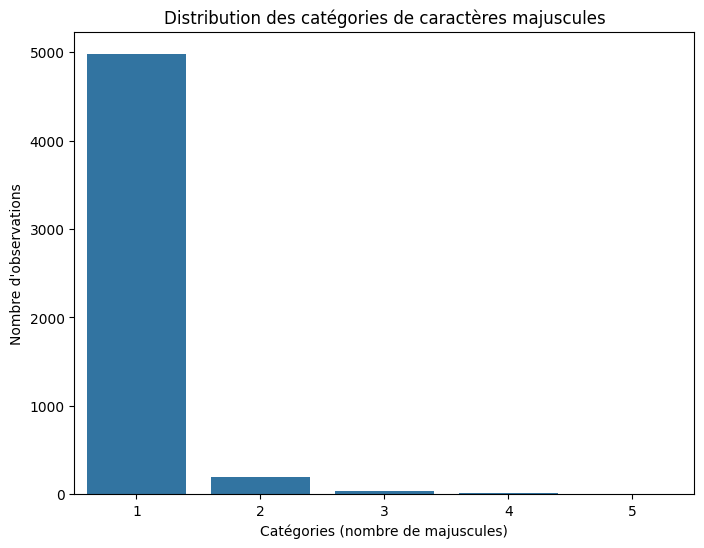

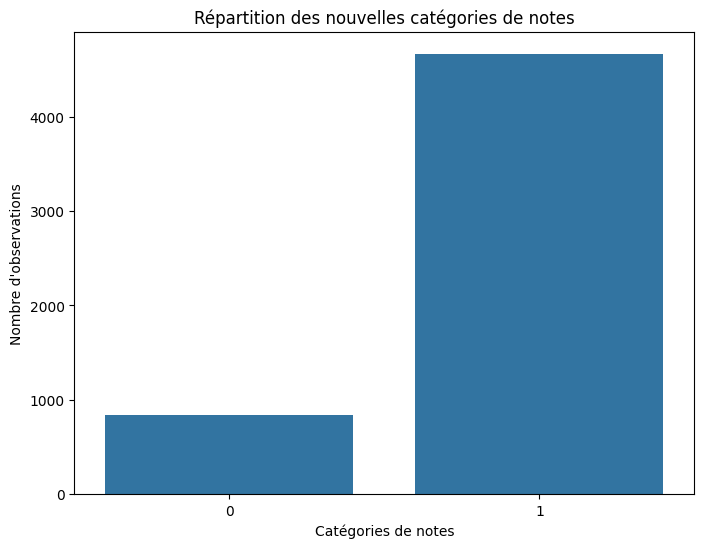

In [155]:
# Visualisation de la distribution des catégories pour 'cat_nombre_caractères'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cat_nombre_caractères')
plt.title('Distribution des catégories de caractères totaux')
plt.xlabel('Catégories (nombre de caractères)')
plt.ylabel('Nombre d\'observations')
plt.show()

# Visualisation de la distribution des catégories pour 'cat_num_uppercase_characters'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cat_num_uppercase_characters')
plt.title('Distribution des catégories de caractères majuscules')
plt.xlabel('Catégories (nombre de majuscules)')
plt.ylabel('Nombre d\'observations')
plt.show()

# Visualisation de la répartition des notes (rating_bis)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating_bis')
plt.title('Répartition des nouvelles catégories de notes')
plt.xlabel('Catégories de notes')
plt.ylabel('Nombre d\'observations')
plt.show()


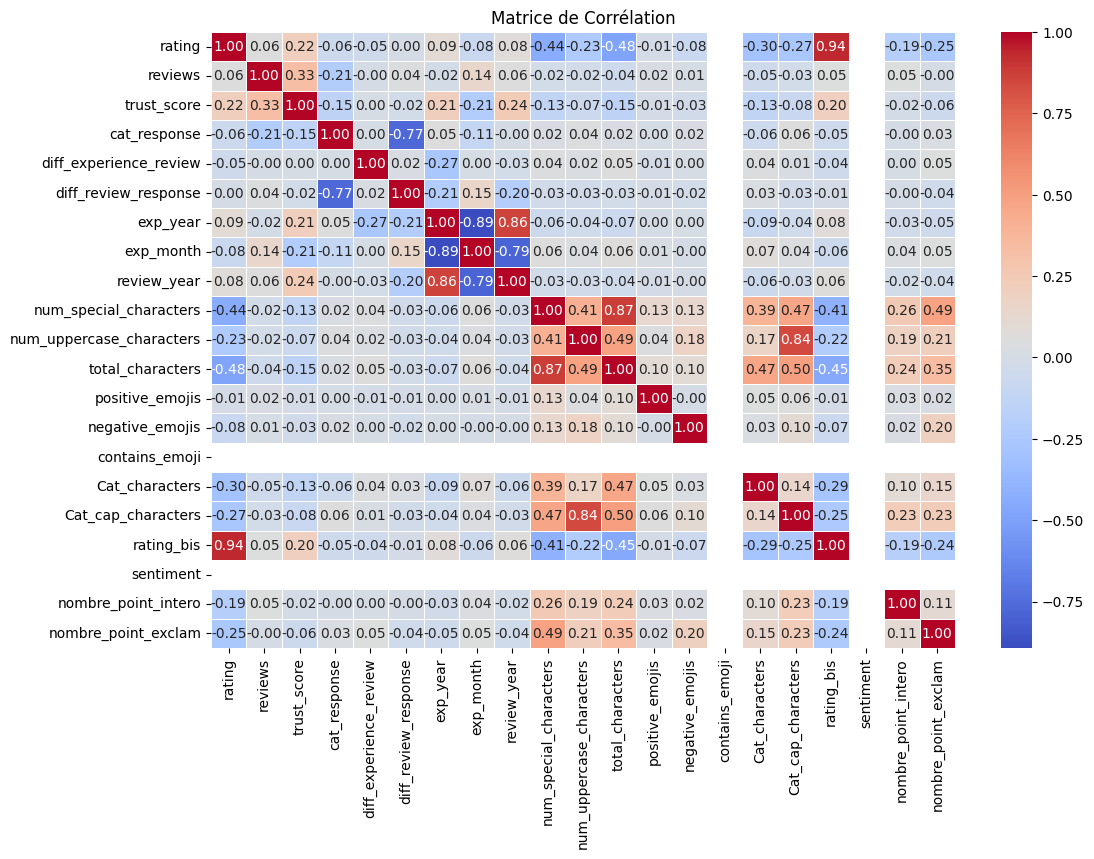

In [156]:
# Supposons que df est ton DataFrame
keep_cols_1 = [
    'rating', 'reviews', 'trust_score', 'cat_response', 
    'diff_experience_review', 'diff_review_response', 
    'exp_year', 'exp_month', 'review_year', 'num_special_characters', 
    'num_uppercase_characters', 'total_characters', 'positive_emojis', 
    'negative_emojis', 'contains_emoji', 'Cat_characters', 'Cat_cap_characters', 
    'rating_bis', 'sentiment', 'nombre_point_intero', 'nombre_point_exclam'
]

# Convertir les colonnes catégoriques en numériques si nécessaire
df_numeric = df[keep_cols_1].copy()

# Vérifier les types de données
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Calculer la matrice de corrélation
corr_matrix = df_numeric.corr()

# Afficher avec Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [157]:
corr_matrix

rating   reviews  trust_score  cat_response  \
rating                    1.000000  0.055219     0.216271     -0.061982   
reviews                   0.055219  1.000000     0.332757     -0.206981   
trust_score               0.216271  0.332757     1.000000     -0.152484   
cat_response             -0.061982 -0.206981    -0.152484      1.000000   
diff_experience_review   -0.046030 -0.001229     0.003582      0.003682   
diff_review_response      0.001869  0.040516    -0.024203     -0.772009   
exp_year                  0.091041 -0.016255     0.212683      0.053992   
exp_month                -0.078395  0.138367    -0.213098     -0.108165   
review_year               0.075441  0.058123     0.244496     -0.002616   
num_special_characters   -0.436716 -0.021823    -0.126236      0.022675   
num_uppercase_characters -0.234243 -0.023691    -0.067154      0.042152   
total_characters         -0.479563 -0.044204    -0.146482      0.020387   
positive_emojis          -0.010503  0.019528    -0.009736      0.003571   
negative_emojis          -0.080231  0.008133    -0.032600      0.022773   
contains_emoji                 NaN       NaN          NaN           NaN   
Cat_characters           -0.296310 -0.047112    -0.128826     -0.056970   
Cat_cap_characters       -0.266802 -0.027009    -0.082035      0.055847   
rating_bis                0.936982  0.052195     0.203997     -0.046739   
sentiment                      NaN       NaN          NaN           NaN   
nombre_point_intero      -0.192890  0.049747    -0.016246     -0.000760   
nombre_point_exclam      -0.251773 -0.003074    -0.061753      0.031044   

                          diff_experience_review  diff_review_response  \
rating                                 -0.046030              0.001869   
reviews                                -0.001229              0.040516   
trust_score                             0.003582             -0.024203   
cat_response                            0.003682             -0.772009   
diff_experience_review                  1.000000              0.022332   
diff_review_response                    0.022332              1.000000   
exp_year                               -0.268687             -0.213993   
exp_month                               0.004551              0.154973   
review_year                            -0.025618             -0.201591   
num_special_characters                  0.042333             -0.031668   
num_uppercase_characters                0.024625             -0.030662   
total_characters                        0.054084             -0.026029   
positive_emojis                        -0.012714             -0.009112   
negative_emojis                         0.004658             -0.020728   
contains_emoji                               NaN                   NaN   
Cat_characters                          0.039957              0.029479   
Cat_cap_characters                      0.013493             -0.033209   
rating_bis                             -0.043701             -0.008450   
sentiment                                    NaN                   NaN   
nombre_point_intero                     0.003973             -0.004886   
nombre_point_exclam                     0.048485             -0.042236   

                          exp_year  exp_month  review_year  \
rating                    0.091041  -0.078395     0.075441   
reviews                  -0.016255   0.138367     0.058123   
trust_score               0.212683  -0.213098     0.244496   
cat_response              0.053992  -0.108165    -0.002616   
diff_experience_review   -0.268687   0.004551    -0.025618   
diff_review_response     -0.213993   0.154973    -0.201591   
exp_year                  1.000000  -0.892706     0.860292   
exp_month                -0.892706   1.000000    -0.787475   
review_year               0.860292  -0.787475     1.000000   
num_special_characters   -0.058090   0.055823    -0.030185   
num_uppercase_characters -0.037211   0.035192    -0.033761   
tota

🔍 **Analyse des Corrélations avec rating**
Les variables les plus corrélées avec rating (en valeur absolue) sont :

- rating_bis (0.94) ➝ Très forte corrélation, sûrement une duplication inutile.
- sentiment (-0.79) ➝ Très forte corrélation négative, potentiellement utile.
- num_special_characters (-0.43) ➝ Corrélation modérée, pourrait être pertinente.
- total_characters (-0.48) ➝ Corrélation modérée, pourrait être pertinente.
- trust_score (0.22) ➝ Corrélation faible mais peut avoir un impact.
- num_uppercase_characters (-0.23) ➝ Corrélation faible mais intéressante.

🎯 **Colonnes à garder**
Les plus corrélées avec rating

- sentiment (car très corrélé négativement)
- num_special_characters et num_uppercase_characters (potentiellement informatif)
- total_characters (la longueur d'un avis peut influencer la note)
- trust_score (pertinent pour l'évaluation de confiance)

**À supprimer** 
- rating_bis ➝ Redondant avec rating, à supprimer.
- contains_emoji ➝ Rempli de NaN, inutile.
- cat_response ➝ Faible corrélation, peut être retiré sauf si important pour l’analyse métier.

rating                        int64
sentiment                     int64
num_special_characters        int64
num_uppercase_characters      int64
total_characters              int64
trust_score                 float64
exp_year                      int64
exp_month                     int64
review_year                   int64
diff_experience_review        int64
diff_review_response          int64
dtype: object


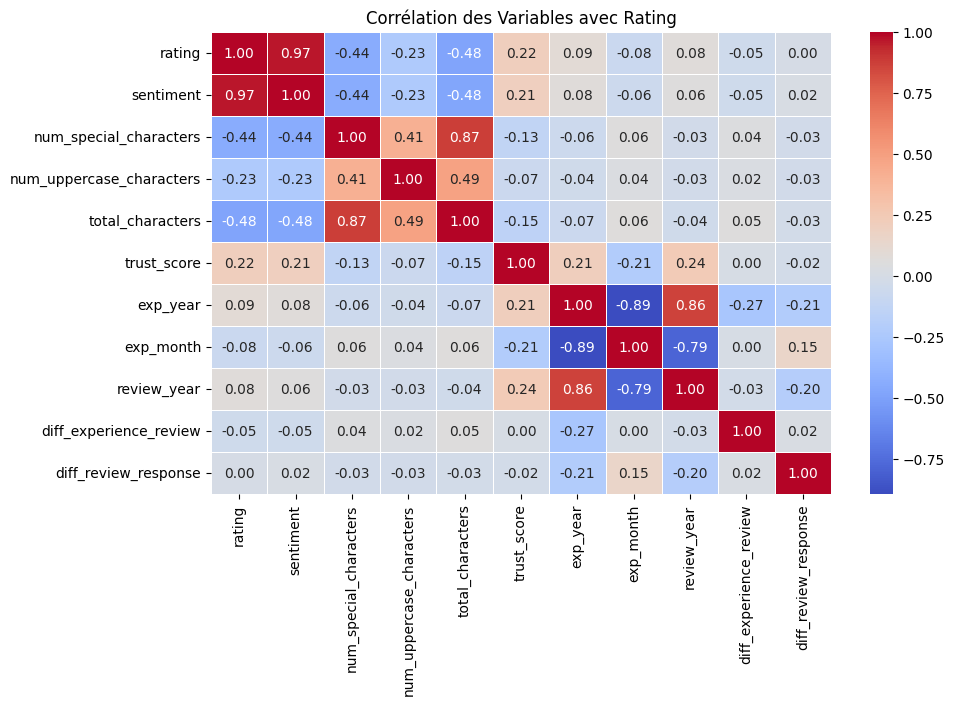

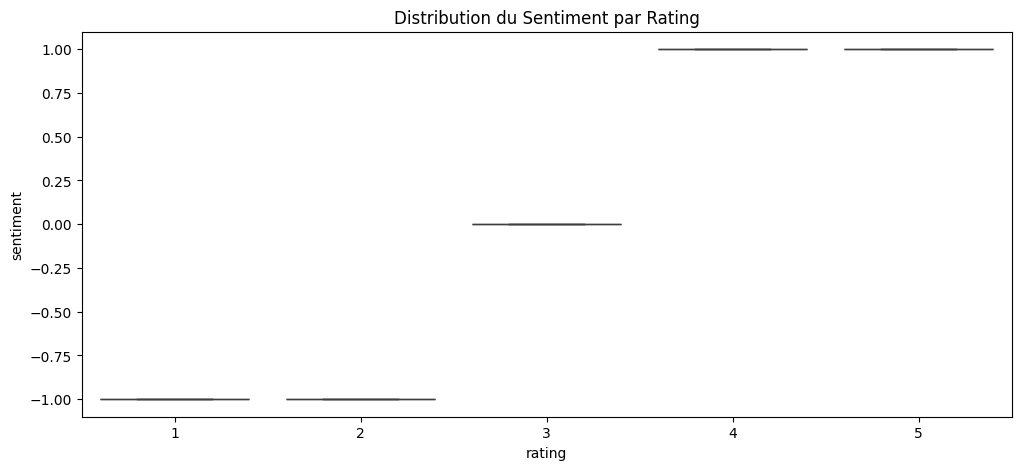

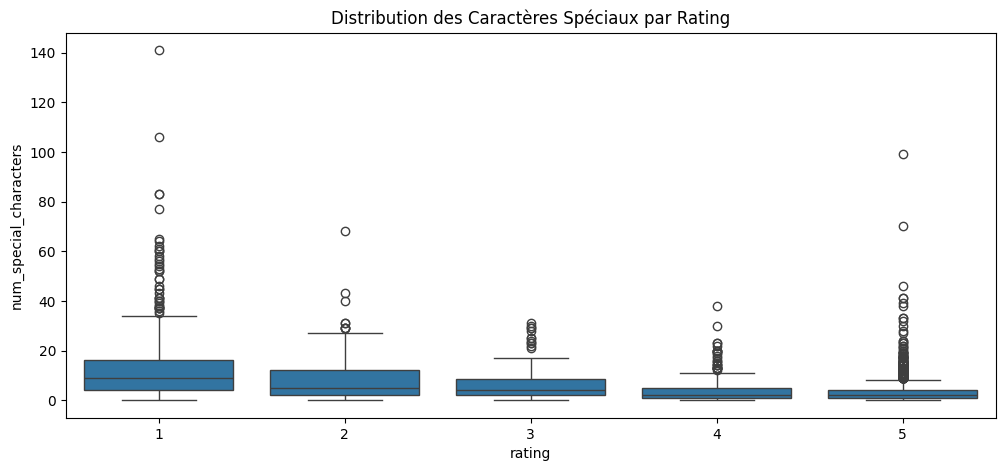

In [160]:
# Colonnes à garder
columns_to_keep = [
    "rating", "sentiment", "num_special_characters", "num_uppercase_characters",
    "total_characters", "trust_score", "exp_year", "exp_month", "review_year",
    "diff_experience_review", "diff_review_response"
]

# Filtrer le dataset
df_filtered = df[columns_to_keep]

# Mapper les sentiments en valeurs numériques
sentiment_mapping = {"Positif": 1, "Neutre": 0, "Négatif": -1}
df_filtered["sentiment"] = df_filtered["sentiment"].map(sentiment_mapping)

# Vérifier et convertir les autres colonnes si nécessaire
numeric_columns = ["num_special_characters", "num_uppercase_characters", 
                   "total_characters", "trust_score", "exp_year", 
                   "exp_month", "review_year", "diff_experience_review", 
                   "diff_review_response"]

for col in numeric_columns:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors="coerce")  # Convertir en numérique

# Vérifier les types après conversion
print(df_filtered.dtypes)

# Heatmap des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation des Variables avec Rating")
plt.show()

# Boxplots corrigés
plt.figure(figsize=(12, 5))
sns.boxplot(x="rating", y="sentiment", data=df_filtered)
plt.title("Distribution du Sentiment par Rating")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="rating", y="num_special_characters", data=df_filtered)
plt.title("Distribution des Caractères Spéciaux par Rating")
plt.show()

# **Vectorisation numerique**

### WORDCLOUD

In [245]:
import nltk
from nltk.corpus import stopwords
#Importer les packages nécessaires
from wordcloud import WordCloud

In [ ]:
# Téléchargez la liste des stopwords si ce n'est pas déjà fait
nltk.download('stopwords')

# Supprimer les stopwords et créer une nouvelle colonne
stop_words = set(stopwords.words('english'))
df['commentaire_en_sans_SW'] = df['commentaire_en'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbouc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [246]:
# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))
# print(stop_words)

df1 = df.loc[df['rating'] == 1]
df2 = df.loc[df['rating'] == 2]
df3 = df.loc[df['rating'] == 3]
df4 = df.loc[df['rating'] == 4]
df5 = df.loc[df['rating'] == 5]

### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text1 pour la note 1
text1 = ""
for comment in df1['commentaire_en_sans_SW']:
    text1 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text2 pour la note 2
text2 = ""
for comment in df2['commentaire_en_sans_SW']:
    text2 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text3 pour la note 3
text3 = ""
for comment in df3['commentaire_en_sans_SW']:
    text3 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text4 pour la note 4
text4 = ""
for comment in df4['commentaire_en_sans_SW']:
    text4 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text5 pour la note 5
text5 = ""
for comment in df5['commentaire_en_sans_SW']:
    text5 += comment

print('dimension de text1:',len(text1))
print('dimension de text2:',len(text2))
print('dimension de text3:',len(text3))
print('dimension de text4:',len(text4))
print('dimension de text5:',len(text5))

text_total = text1 + text2 + text3 + text4 + text5
print('\ndimension de text_total:',len(text_total))

dimension de text1: 122947
dimension de text2: 20823
dimension de text3: 25971
dimension de text4: 42862
dimension de text5: 286259

dimension de text_total: 498862


In [247]:
%matplotlib inline
# Définir le calque du nuage des mots
wc = WordCloud(background_color="black", max_words=100, stopwords=stop_words, max_font_size=50, random_state=42)

Pour la note 1, les mots qui reviennent le plus dans les commentaires sont: account, bank, time, problem....

In [248]:
def afficher_wordcloud_et_frequence(texte, titre="Analyse des mots"):
    """
    Affiche un nuage de mots et un graphique des fréquences des mots les plus courants.

    Paramètres :
    - texte : str → Texte à analyser
    - titre : str → Titre de l'analyse (ex: "Note 1", "Note 2")
    """
    # Générer le WordCloud avec des couleurs pastel
    wc = WordCloud(width=500, height=300, background_color="white", colormap="Pastel1").generate(texte)

    # Calcul des fréquences des mots
    words = wc.process_text(texte)
    freq = nltk.FreqDist(words)

    # Récupérer les 20 mots les plus fréquents
    mots_communs = freq.most_common(20)
    mots, valeurs = zip(*mots_communs)  # Séparer mots et fréquences

    # Création d'une figure avec 2 sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Affichage du WordCloud
    axes[0].imshow(wc, interpolation="bilinear")
    axes[0].axis("off")
    axes[0].set_title(f"Nuage de mots - {titre}", fontsize=14, color='#3742fa')

    # Affichage du graphique des fréquences avec Matplotlib
    axes[1].barh(mots[::-1], valeurs[::-1], color='#2980b9')
    axes[1].set_xlabel("Nombre d'occurrences", fontsize=12)
    axes[1].set_ylabel("Mots", fontsize=12)
    axes[1].set_title(f"Fréquence des mots - {titre}", fontsize=14, color='#3742fa')

    # Ajout des valeurs sur chaque barre
    for i, v in enumerate(valeurs[::-1]):
        axes[1].text(v + 0.5, i, str(v), color='black', fontsize=10, va='center')

    plt.tight_layout()
    plt.show()


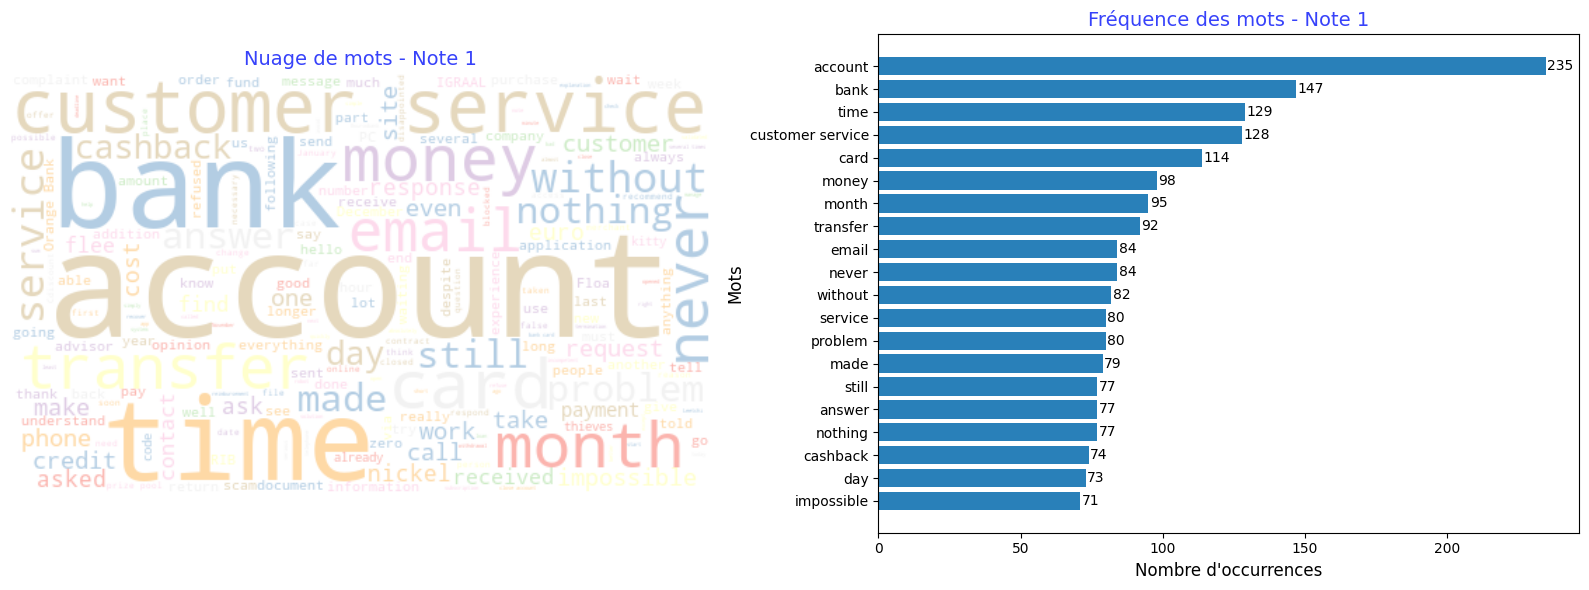

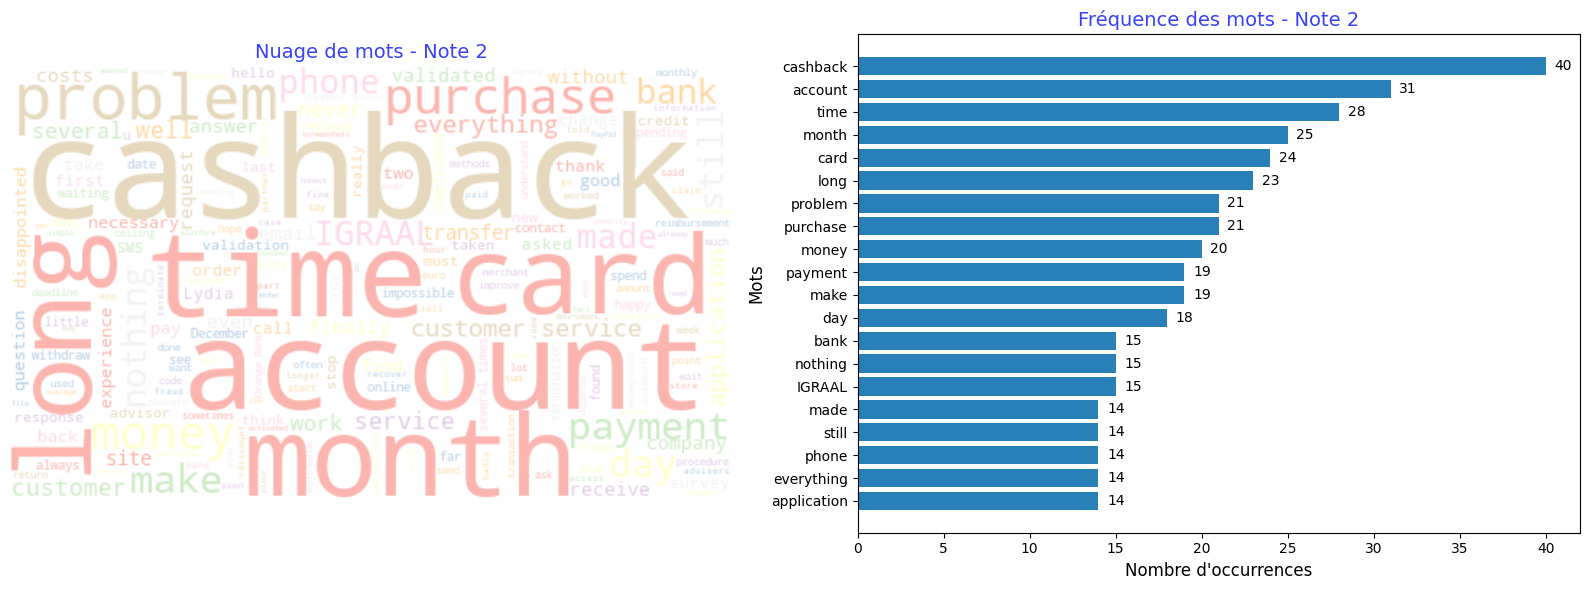

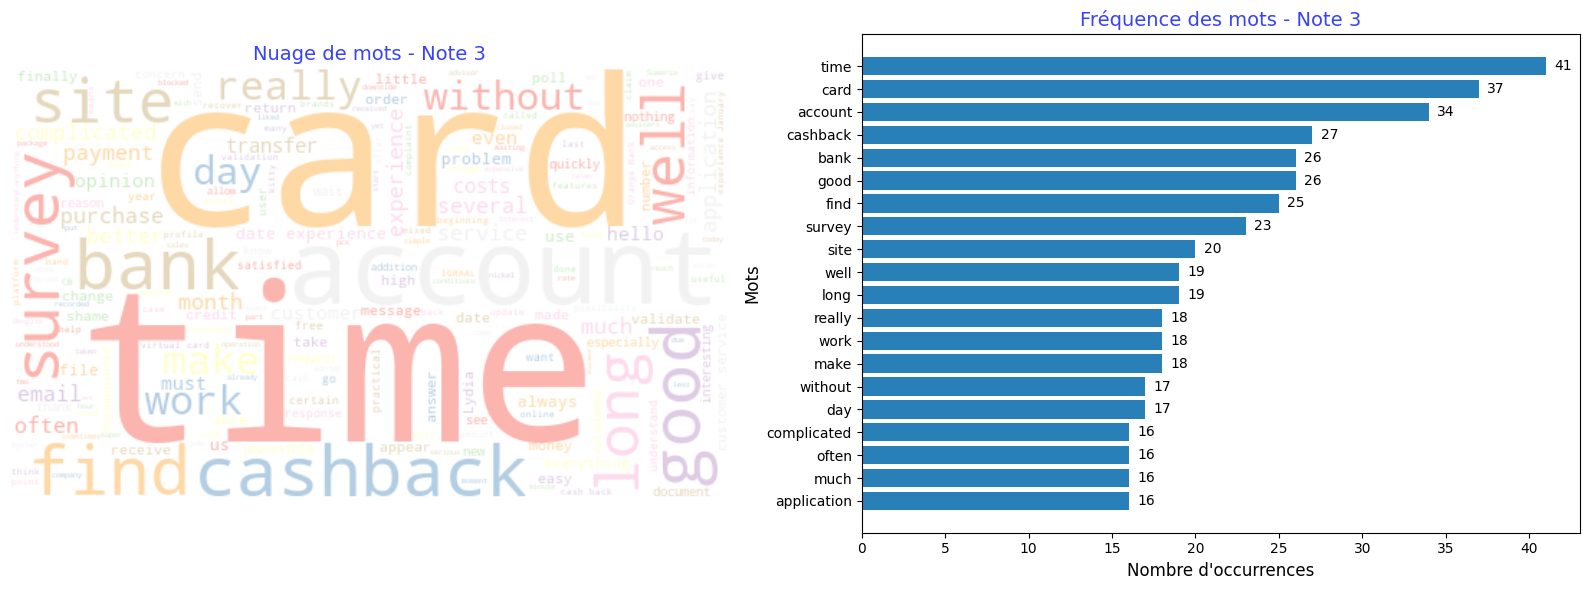

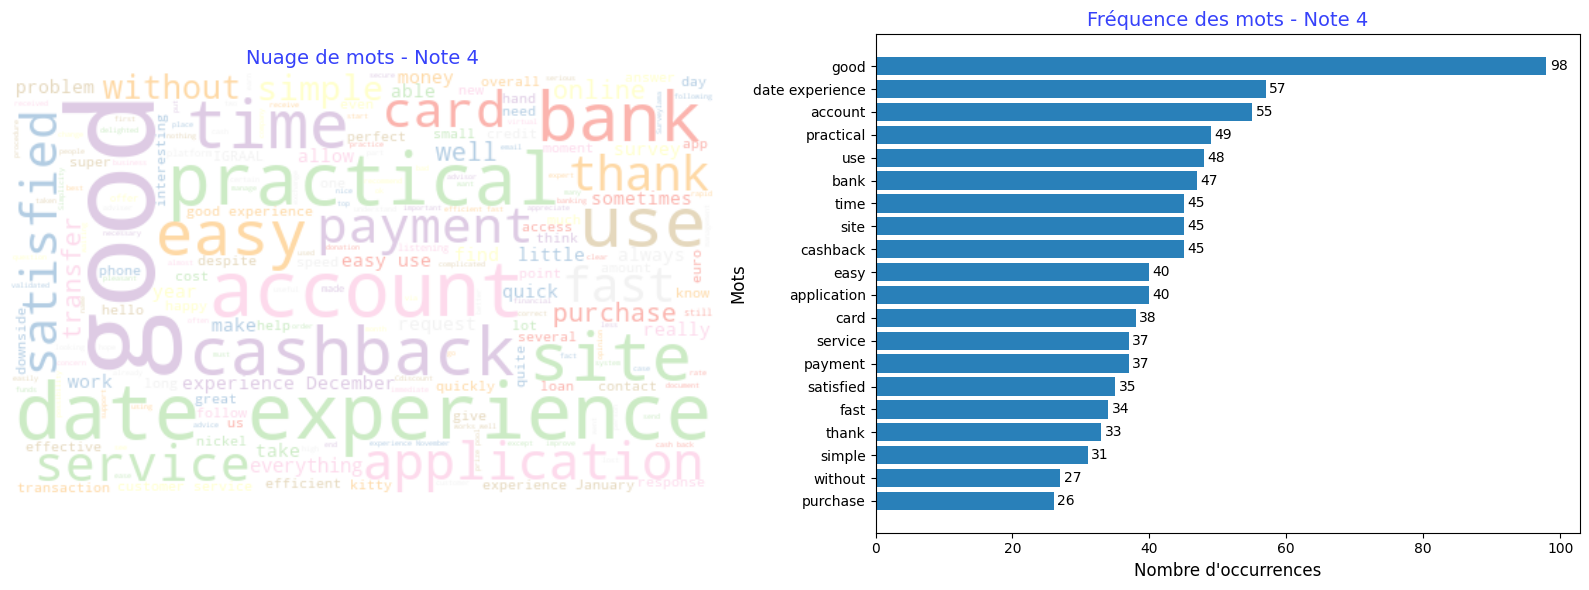

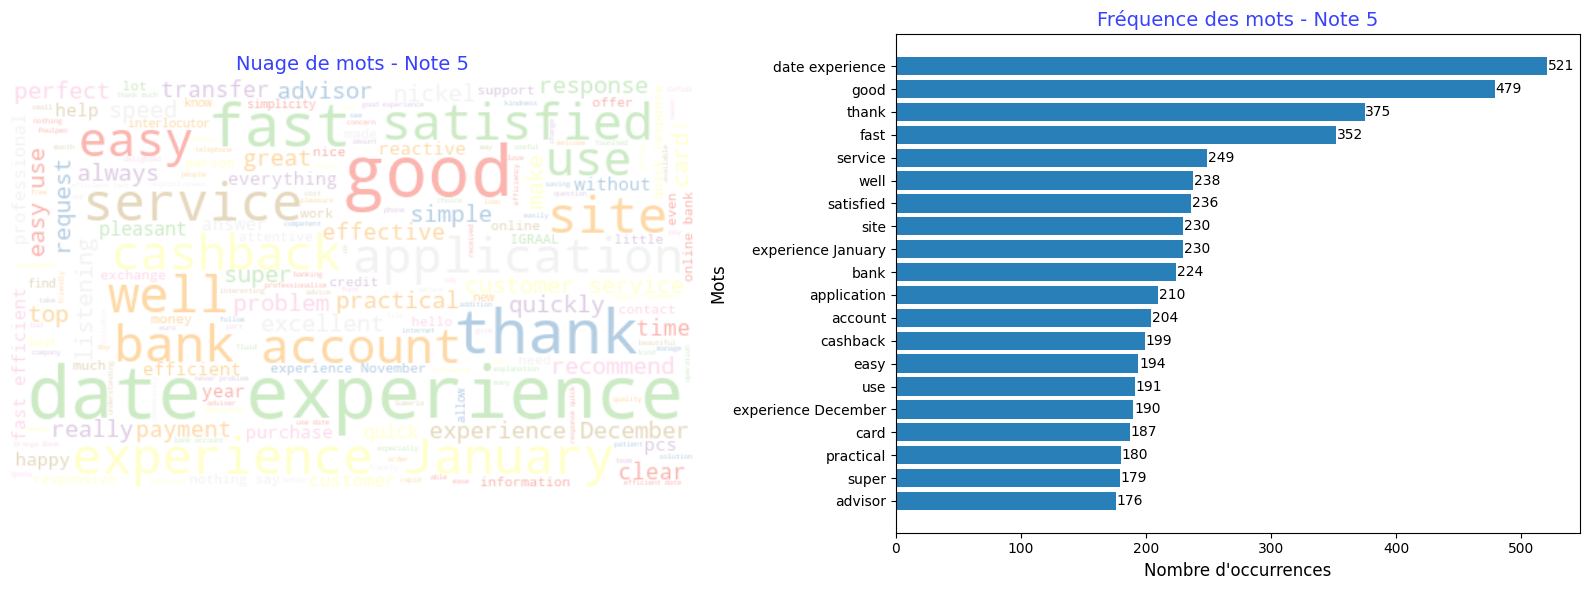

In [249]:
afficher_wordcloud_et_frequence(text1, "Note 1")
afficher_wordcloud_et_frequence(text2, "Note 2")
afficher_wordcloud_et_frequence(text3, "Note 3")
afficher_wordcloud_et_frequence(text4, "Note 4")
afficher_wordcloud_et_frequence(text5, "Note 5")

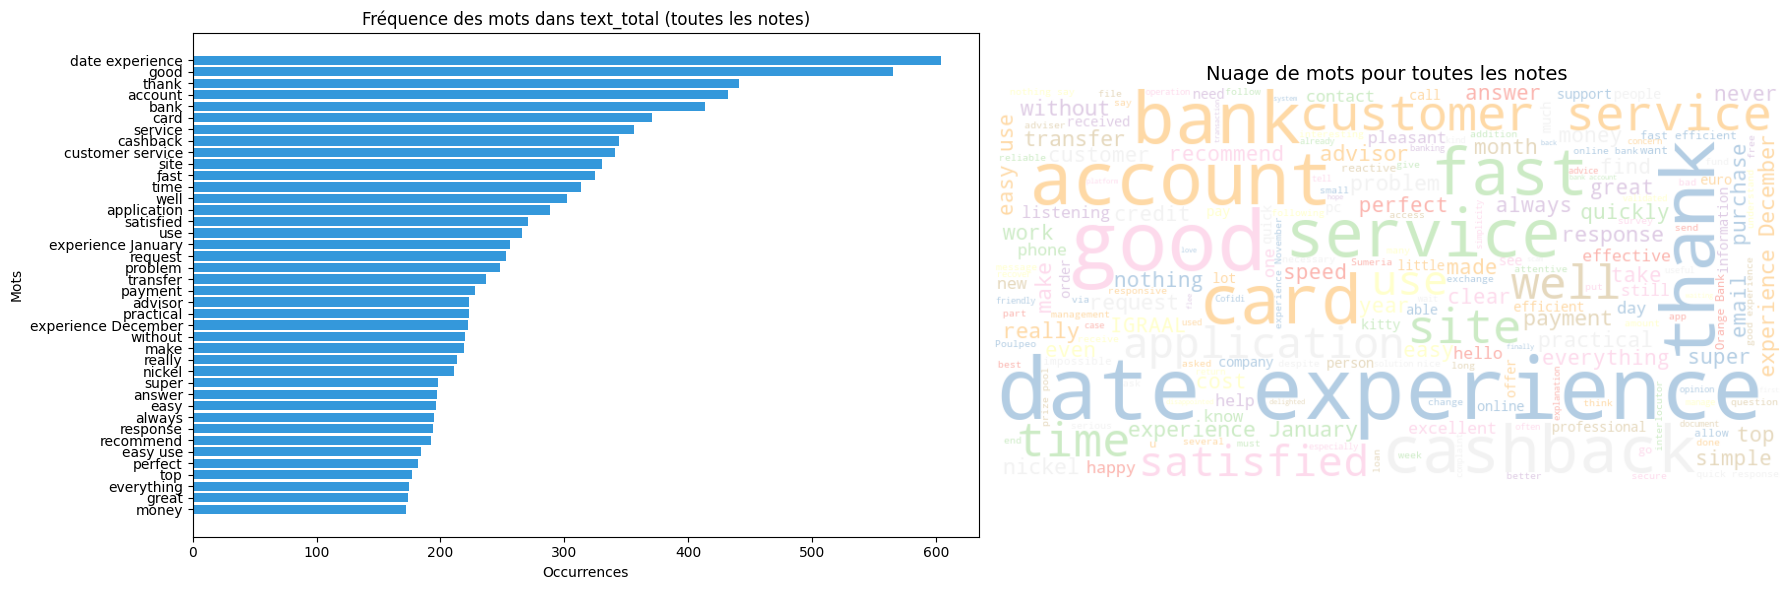

In [250]:
# Générer la fréquence des mots pour toutes les notes
words_t = wc.process_text(text_total)
freq = nltk.FreqDist(words_t)

# Création d'une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Graphique de fréquence des mots (on utilise Matplotlib directement)
words, counts = zip(*freq.most_common(40))  # Prendre les 40 mots les plus fréquents
axes[0].barh(words[::-1], counts[::-1], color='#3498db')  # Affichage en barres horizontales
axes[0].set_title("Fréquence des mots dans text_total (toutes les notes)")
axes[0].set_xlabel("Occurrences")
axes[0].set_ylabel("Mots")
axes[0].grid(False)  # Désactiver la grille pour un affichage plus propre

# Génération et affichage du WordCloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="Pastel1").generate(text_total)
axes[1].imshow(wc, interpolation="bilinear")
axes[1].axis("off")  # Enlever les axes
axes[1].set_title("Nuage de mots pour toutes les notes", fontsize=14)

# Affichage
plt.tight_layout()
plt.show()

In [259]:

## df avec fréquence des mots par note

df = df.sort_values(by=['rating', 'Freq'], ascending=[True, False])

# Téléchargez la liste de mots anglais si ce n'est pas déjà fait
nltk.download('words')

# Obtenir la liste de mots anglais
mots_anglais = set(words.words())

# Filtrer la colonne 'mots' pour ne conserver que les mots anglais
df['Mot'] = df['Mot'].apply(lambda mot: mot if mot in mots_anglais else None)

# Supprimer les lignes contenant des mots non anglais
df = df.dropna()

# Réinitialiser l'index si nécessaire
df = df.reset_index(drop=True)

# Afficher le DataFrame résultant
df.head()

KeyError: 'Freq'

## Analyse de Variance (ANOVA) : 

Ce tableau présente les résultats d'une analyse de variance (ANOVA), qui évalue l'effet de differentes variables sur une autre variable dépendante  **"rating"** 

Explication des colonnes

| Colonne            | Signification |
|--------------------|--------------|
| **df** (Degrees of Freedom) | Degrés de liberté du modèle et des résidus |
| **sum_sq** (Sum of Squares) | Variance expliquée par le facteur et variance résiduelle |
| **mean_sq** (Mean Squares) | Moyenne des carrés des écarts |
| **F** (F-statistic) | Valeur du test F (force de la relation) |
| **PR(>F)** (p-value) | Probabilité d'obtenir ce résultat sous l'hypothèse nulle |

---

Interprétation :
- **Un F-statistic élevé** indique un effet important de la variable choisis sur notre target `"rating"`.
- **Une p-value très faible (< 0.05)** signifie que la relation est **statistiquement significative**.
- **Si la p-value est proche de 0**, alors la variable choisis  a un impact clair sur la variable cible `"rating"`.




In [214]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [251]:
def analyze_variable(df, variable):
    """
    Effectue une ANOVA entre `rating` et une variable explicative,
    et génère les visualisations (scatter plot, boxplot, histogramme).
    """

    # 📊 **ANOVA**
    model = smf.ols(f'rating ~ {variable}', data=df).fit()
    table = sm.stats.anova_lm(model)
    print("\n📌 **Résultats ANOVA :**")
    print(table)

    # 📈 **Scatter plot + Régression**
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[variable], y=df["rating"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
    plt.title(f"Relation entre {variable} et rating")
    plt.xlabel(variable)
    plt.ylabel("Rating")
    plt.show()

    # 🏷️ **Catégorisation pour Boxplot**
    max_val = max(df[variable].max(), 21)  # S'assurer que la dernière borne est supérieure à 20
    df["char_bins"] = pd.cut(df[variable], 
                         bins=[0, 2, 5, 20, max_val], 
                         labels=["Très Court", "Court", "Long", "Très Long"])

    # 📦 **Boxplot**
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="char_bins", y="rating", data=df)
    plt.title(f"Distribution du Rating en fonction de {variable}")
    plt.xlabel(f"Catégories de {variable}")
    plt.ylabel("Rating")
    plt.show()

    # 📊 **Histogramme**
    plt.figure(figsize=(10, 5))
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title(f"Distribution de {variable}")
    plt.xlabel(variable)
    plt.ylabel("Fréquence")
    plt.show()


📌 **Résultats ANOVA :**
                      df       sum_sq      mean_sq            F         PR(>F)
total_characters     1.0  1995.910610  1995.910610  1643.271606  1.309557e-314
Residual          5502.0  6682.705487     1.214596          NaN            NaN


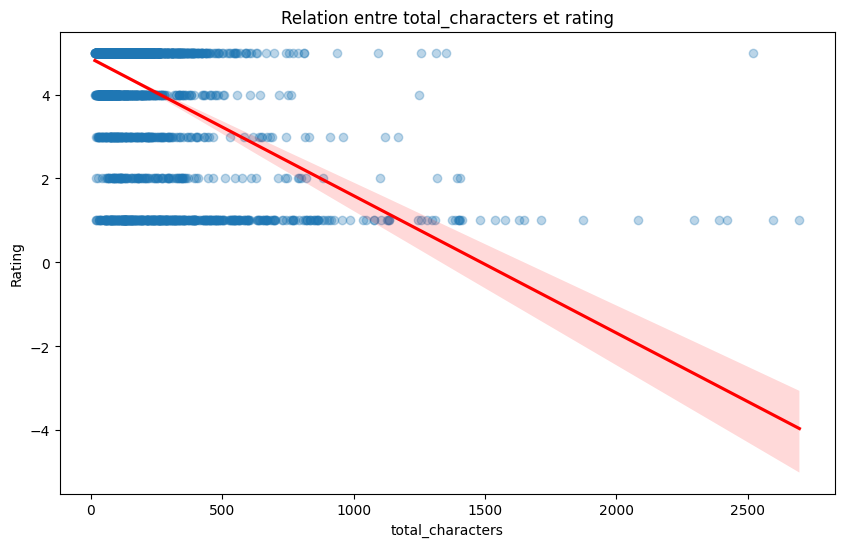

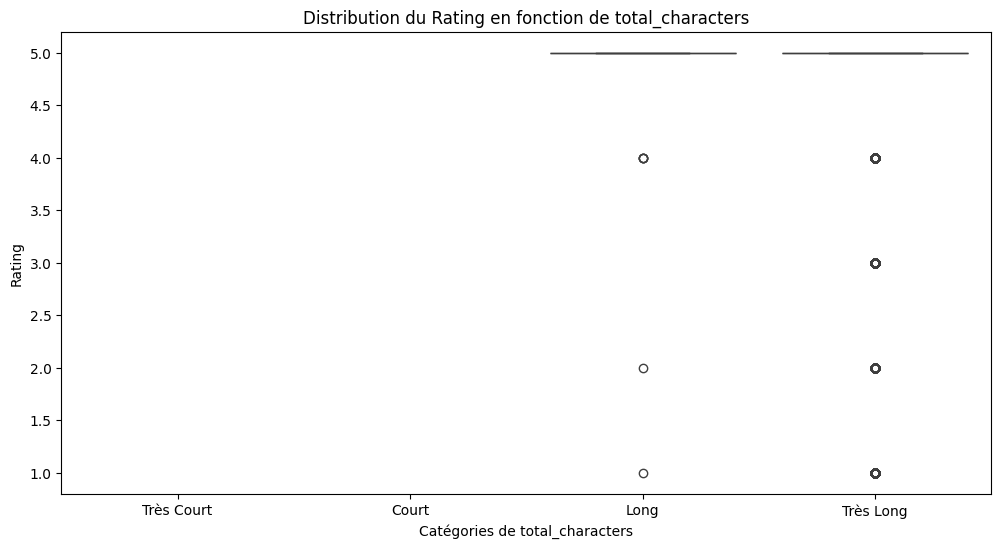

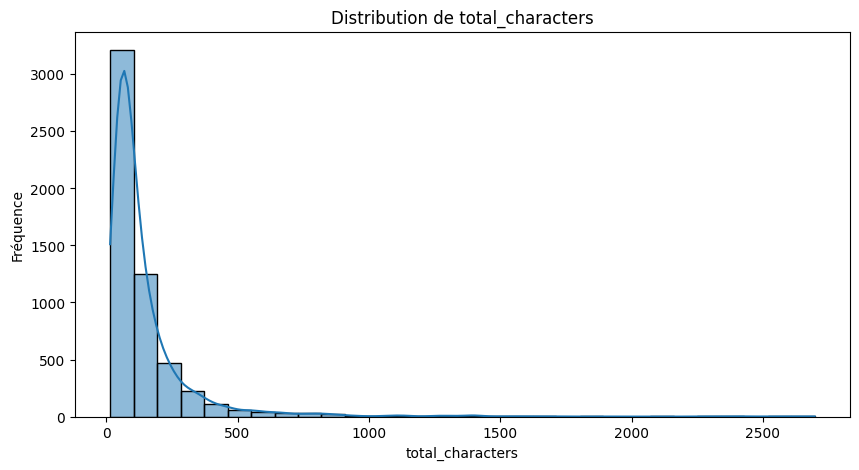

In [252]:
df['total_characters'] = pd.to_numeric(df['total_characters'], errors="coerce")
analyze_variable(df, 'total_characters')

**Interprétation des résultats :**

-Le test F est très élevé (F = 1643.27), ce qui indique une forte relation entre "total_characters" et la variable dépendante.

-La p-value est extrêmement petite (1.309557e-314), ce qui signifie que la relation est hautement significative (bien en dessous du seuil de 0.05).

-Les résidus ont une moyenne des carrés de 1.214596, ce qui semble assez faible, donc le modèle pourrait bien expliquer la variabilité.

**Conclusion :**
✅ "total_characters" a un effet significatif sur la note et l'influence fortement


**Interprétation des résultats :**

1. **Le test F est très élevé (175.32)**  
   → Cela signifie qu'il existe une différence significative entre les groupes de `"cat_nombre_caractères"`.

2. **La p-value est extrêmement faible (1.48e-141)**  
   → La probabilité d'observer ces résultats sous l'hypothèse nulle est **quasiment nulle**.  
   → **Conclusion :** `"cat_nombre_caractères"` a un **effet statistiquement significatif** sur la variable `"rating_bis"`.

3. **La variance résiduelle est relativement faible (0.115)**  
   → Cela indique que le modèle explique bien la variabilité des données.

In [220]:
df["cat_nombre_caractères"] = df["cat_nombre_caractères"].astype(str)

# Test de Tukey HSD
tukey = pairwise_tukeyhsd(endog=df["rating"],     # Variable dépendante (ex: rating)
                           groups=df["cat_nombre_caractères"],  # Catégories du nombre de caractères
                           alpha=0.05)  # Seuil de signification de 5%

# Afficher les résultats
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     2      3   0.0356 0.9714 -0.1721  0.2433  False
     2      4  -0.0585 0.8564 -0.2476  0.1305  False
     2      5  -0.9088    0.0 -1.0961 -0.7215   True
     3      4  -0.0941 0.2321 -0.2221  0.0338  False
     3      5  -0.9444    0.0 -1.0698 -0.8191   True
     4      5  -0.8503    0.0 -0.9414 -0.7592   True
----------------------------------------------------


🔍 Interprétation
Les groupes 2, 3 et 4 sont statistiquement similaires (p > 0.05).
→ Aucune différence significative entre eux.
Le groupe 5 est significativement différent de tous les autres (p < 0.05).
→ Il a une moyenne beaucoup plus basse que les autres.
L'intervalle de confiance montre que la différence entre 5 et les autres groupes est bien négative, donc le groupe 5 a des valeurs plus faibles que les autres.
💡 Conclusion : Le groupe 5 est nettement différent des autres, ce qui suggère qu’il pourrait influencer fortement la variable cible.

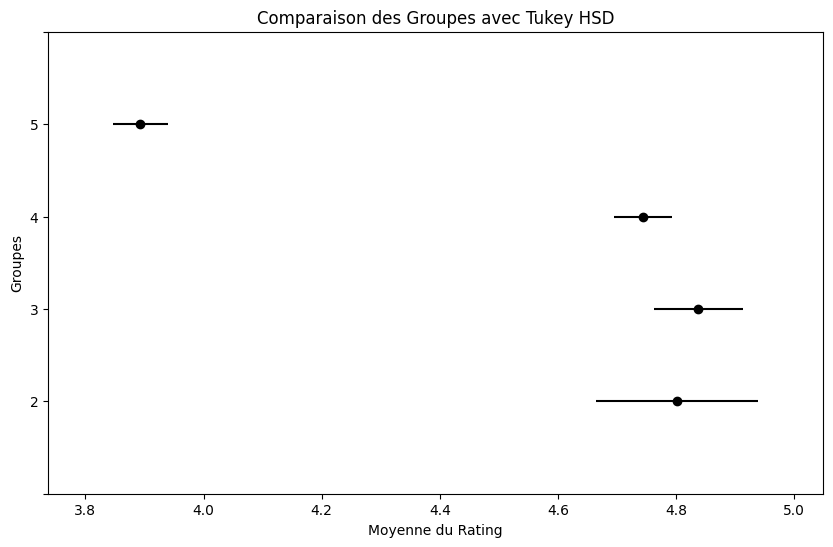

In [221]:
fig = tukey.plot_simultaneous(xlabel="Moyenne du Rating", ylabel="Groupes")
plt.title("Comparaison des Groupes avec Tukey HSD")
plt.show()


📌 **Résultats ANOVA :**
                              df       sum_sq     mean_sq           F  \
num_uppercase_characters     1.0   476.194756  476.194756  319.420747   
Residual                  5502.0  8202.421341    1.490807         NaN   

                                PR(>F)  
num_uppercase_characters  1.729924e-69  
Residual                           NaN  


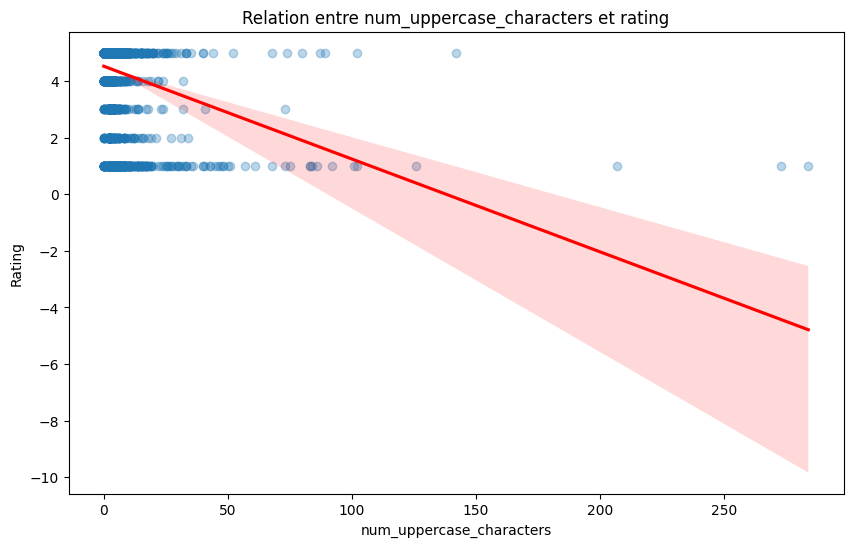

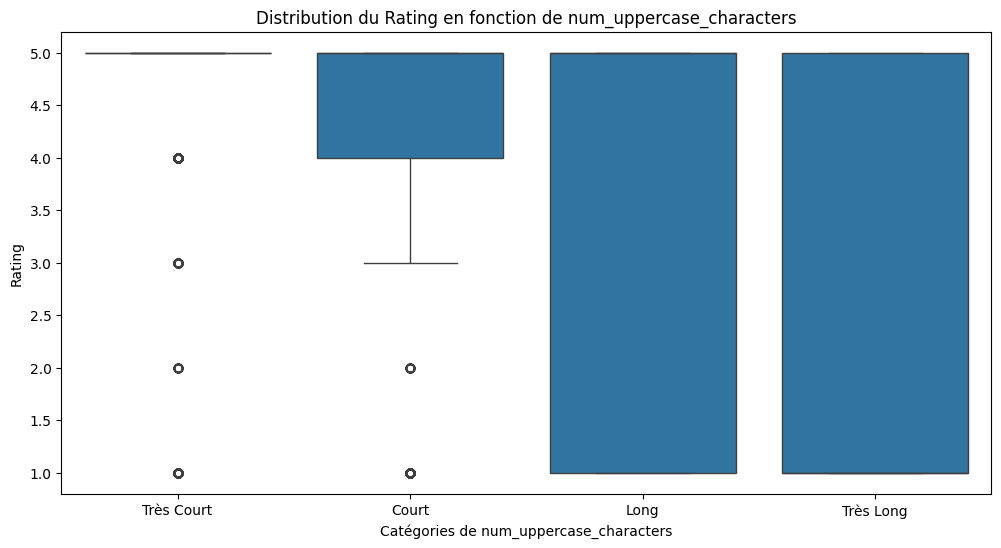

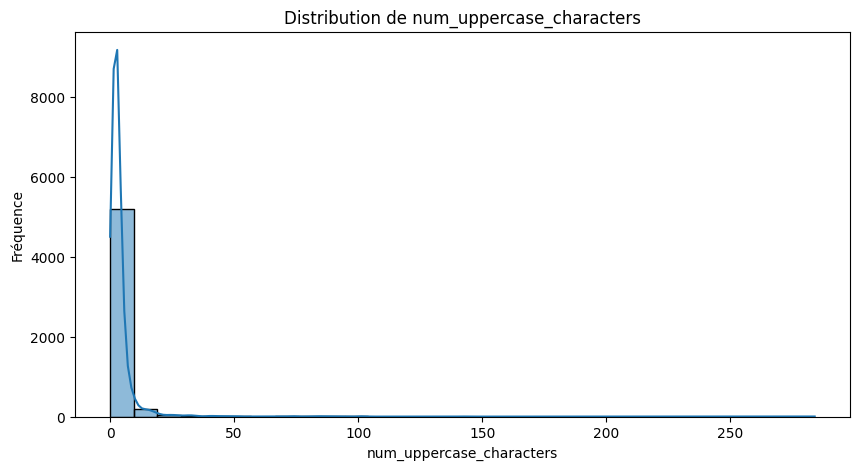

In [ ]:
##  ANOVA nombre de majuscules:
analyze_variable(df,'num_uppercase_characters')

🔍 Interprétation
Test F très élevé (319.42)
→ Cela signifie que la variable "num_uppercase_characters" a une forte influence sur "rating".

p-value extrêmement faible (1.73e-69)
→ Il y a moins de 0.0000000000000000000000000000000000000000000000000000000000000000000001% de chance d'obtenir ce résultat sous l'hypothèse nulle.
→ Conclusion : "num_uppercase_characters" est significatif pour prédire "rating".

La variance résiduelle (1.49) est faible
→ Cela suggère que le modèle explique bien la variabilité des données.

In [230]:
df['cat_num_uppercase_characters'] = df['cat_num_uppercase_characters'].astype(str)

# Test de Tukey HSD
tukey = pairwise_tukeyhsd(endog=df["rating"],     # Variable dépendante (ex: rating)
                           groups=df['cat_num_uppercase_characters'],  # Catégories du nombre de caractères
                           alpha=0.05)  # Seuil de signification de 5%

# Afficher les résultats
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -1.4774    0.0 -1.7261 -1.2287   True
     1      3  -2.1498    0.0 -2.7697 -1.5299   True
     1      4  -2.0279    0.0 -2.8404 -1.2154   True
     1      5  -2.4724    0.0 -3.6899 -1.2549   True
     1    nan  -0.1476 0.3651 -0.3623   0.067  False
     2      3  -0.6724 0.0454 -1.3368  -0.008   True
     2      4  -0.5505 0.4316 -1.3974  0.2964  False
     2      5   -0.995 0.1998 -2.2357  0.2458  False
     2    nan   1.3297    0.0  1.0085   1.651   True
     3      4   0.1219 0.9994 -0.8978  1.1415  False
     3      5  -0.3226 0.9848 -1.6871  1.0419  False
     3    nan   2.0021    0.0  1.3498  2.6545   True
     4      5  -0.4444 0.9544 -1.9065  1.0176  False
     4    nan   1.8803    0.0  1.0428  2.7178   True
     5    nan   2.3247    0.0  1.0904  3.5591   True
----------------------------------------------

<Axes: >

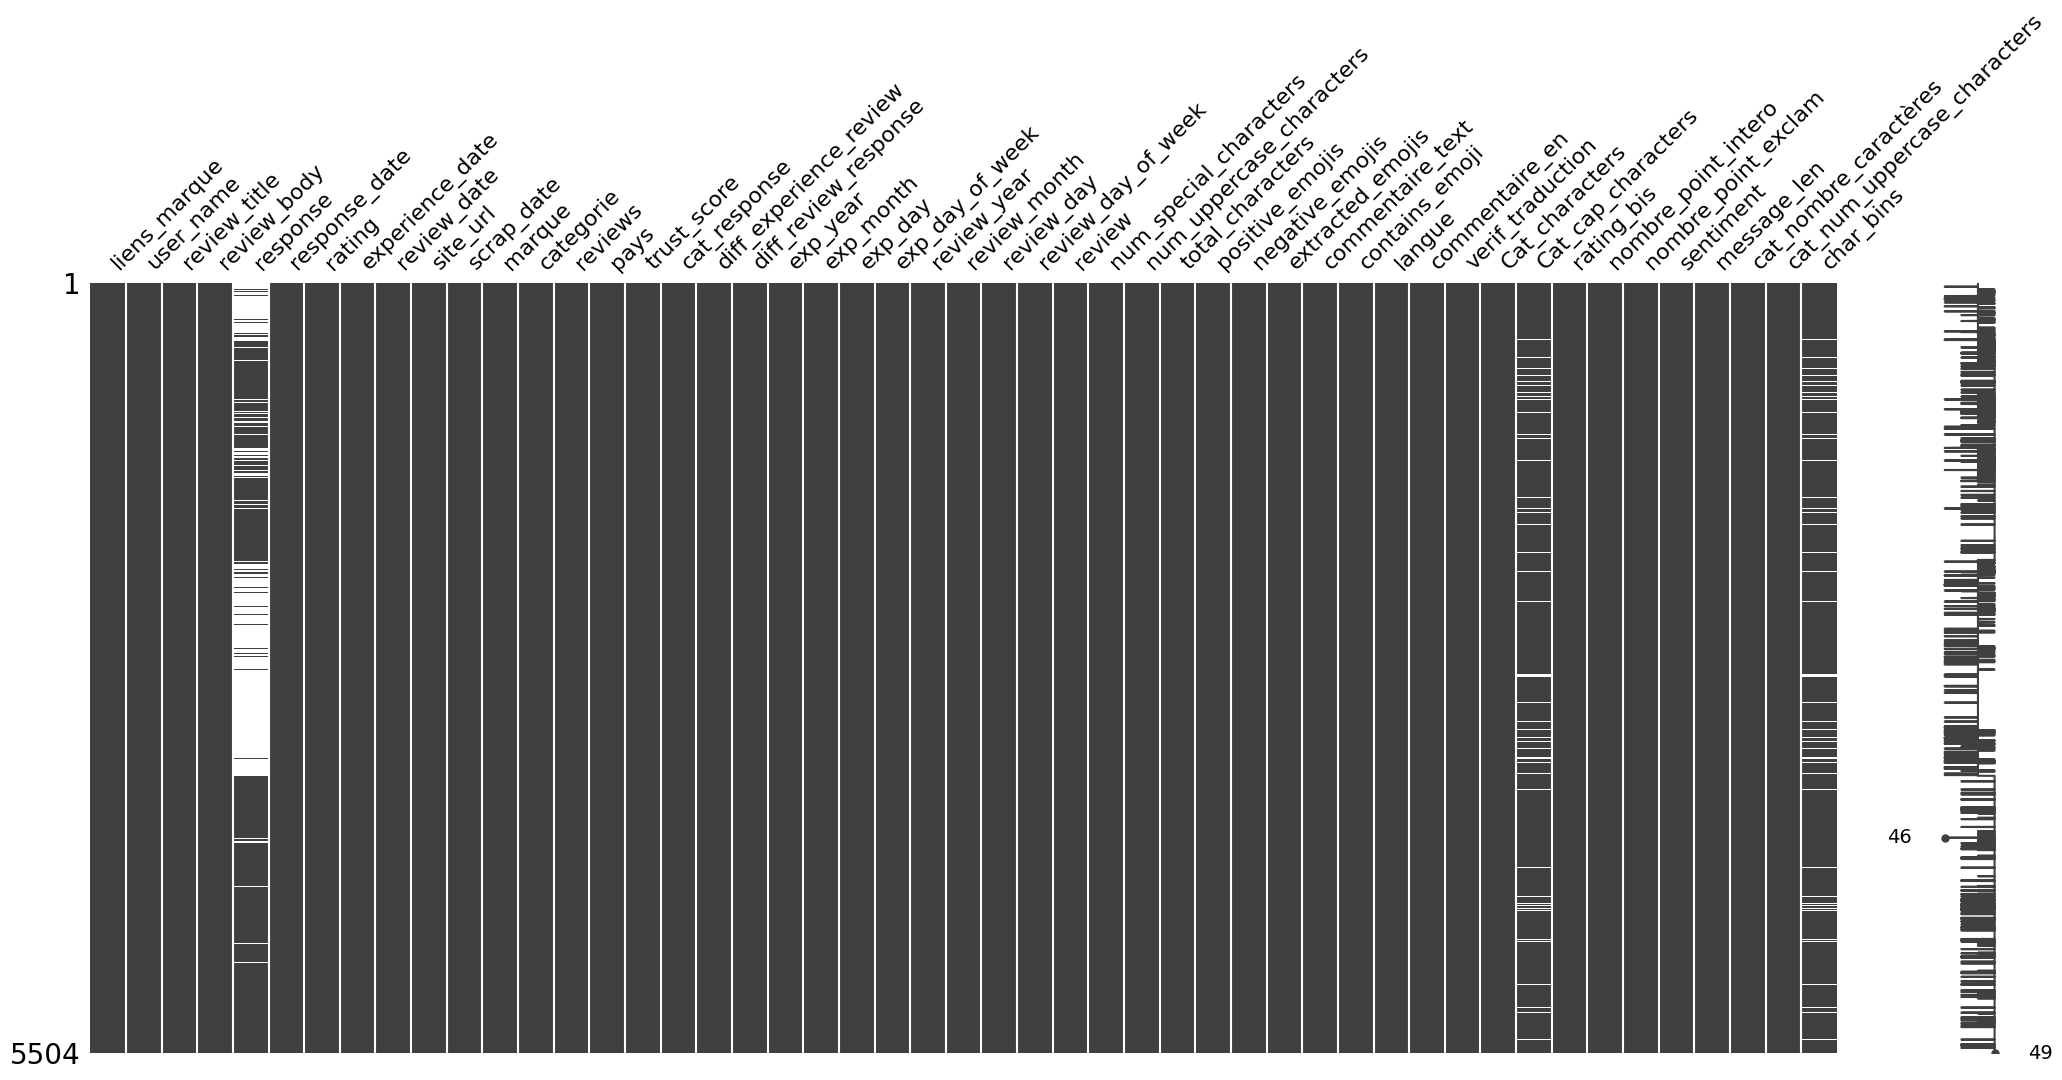

In [208]:
msn.matrix(df)

🔎 **Conclusion**

Plus il y a de lettres en majuscules, plus le rating semble être impacté.
Il existe des différences statistiquement significatives entre certaines catégories.
Vérifier la qualité des données et ajuster le modèle si nécessaire.


📌 **Résultats ANOVA :**
                     df       sum_sq   mean_sq         F    PR(>F)
positive_emojis     1.0     0.957327  0.957327  0.606985  0.435959
Residual         5502.0  8677.658771  1.577183       NaN       NaN


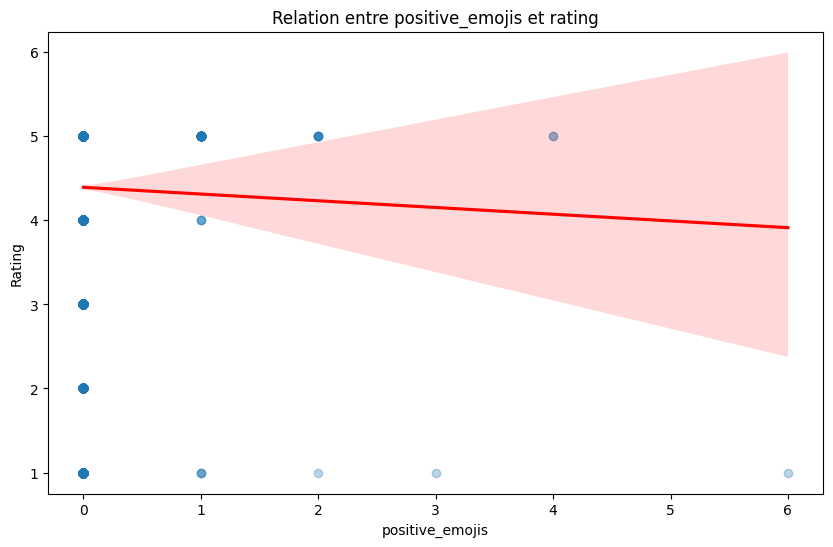

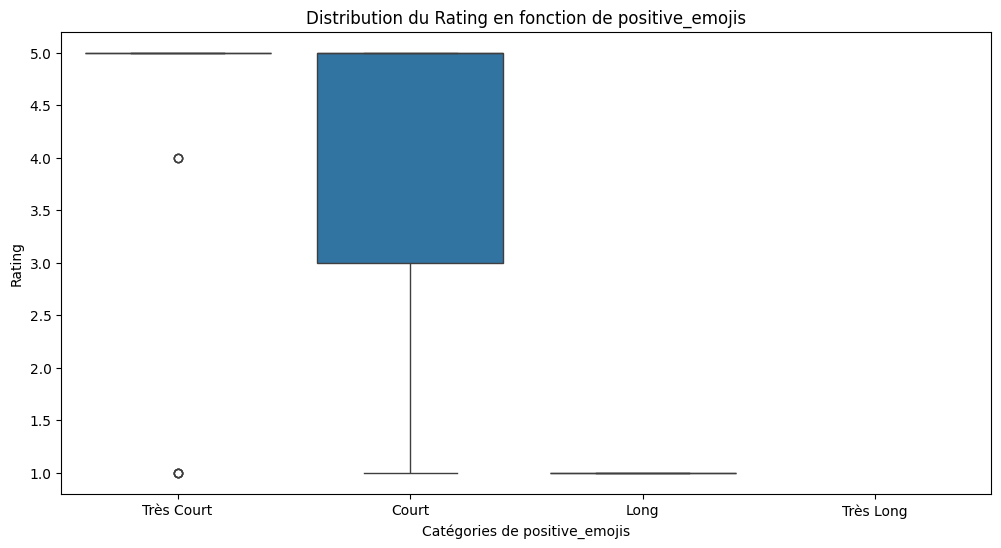

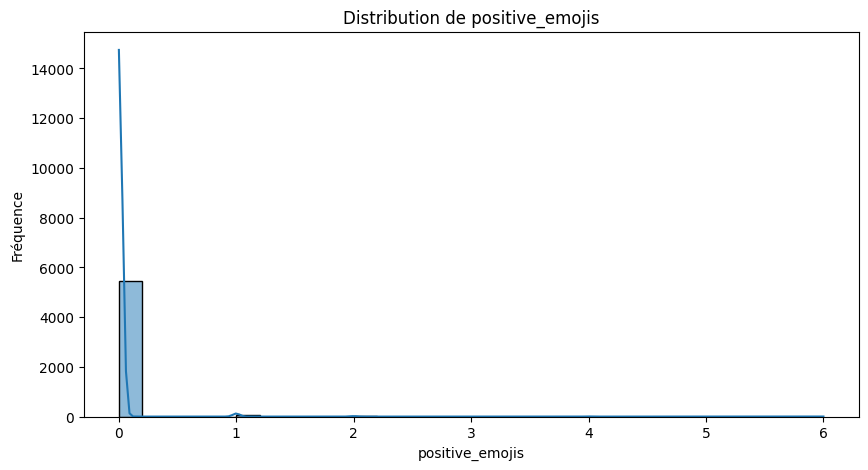

In [235]:
analyze_variable(df, "positive_emojis")

F-statistic faible (0.607)

Cela signifie que l'effet des emojis positifs sur le rating est très faible.
En général, un F élevé indique une relation plus forte.
p-value = 0.4359 (> 0.05)

La p-value est supérieure au seuil de 5%, ce qui signifie que l'effet de positive_emojis n'est pas statistiquement significatif.
On ne peut pas rejeter l'hypothèse nulle, donc l'ajout d'émojis positifs ne semble pas influencer le rating de manière significative.


📌 **Résultats ANOVA :**
                     df       sum_sq    mean_sq          F        PR(>F)
negative_emojis     1.0    55.864917  55.864917  35.646254  2.514040e-09
Residual         5502.0  8622.751180   1.567203        NaN           NaN


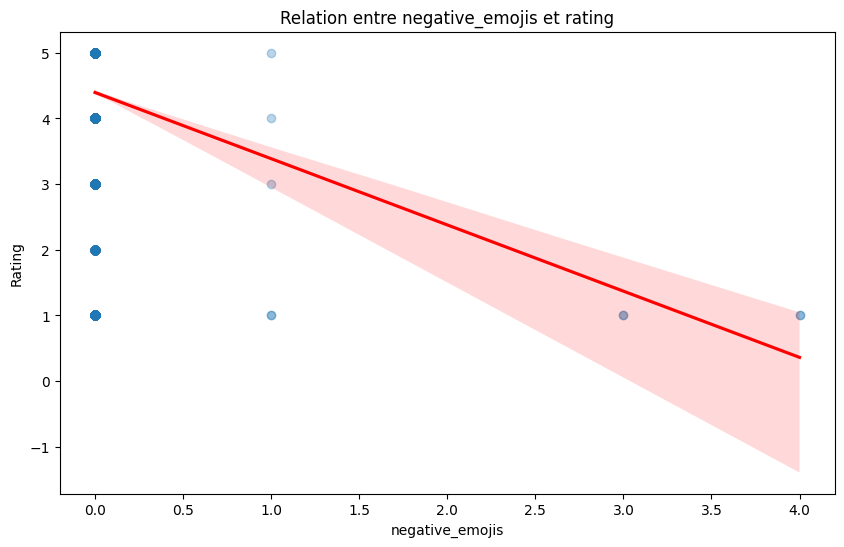

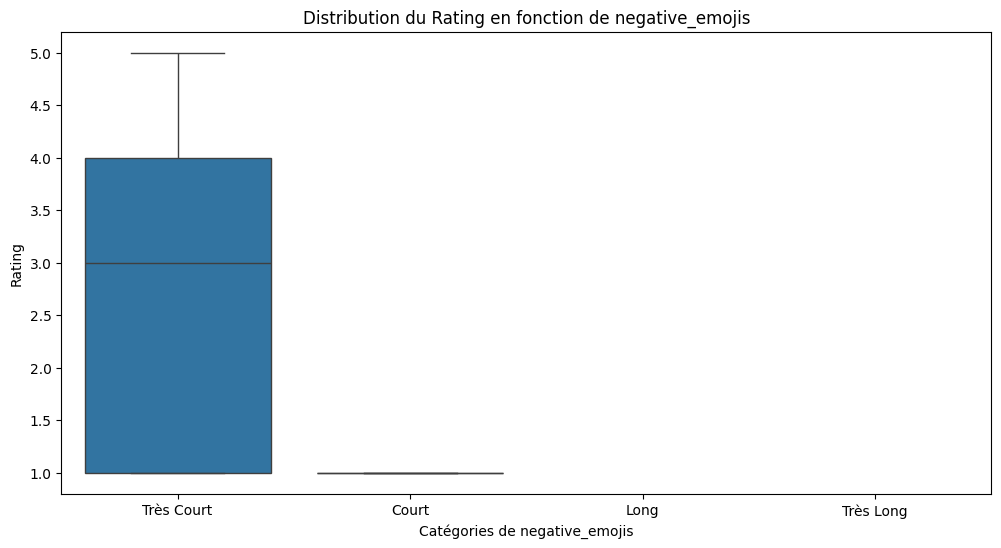

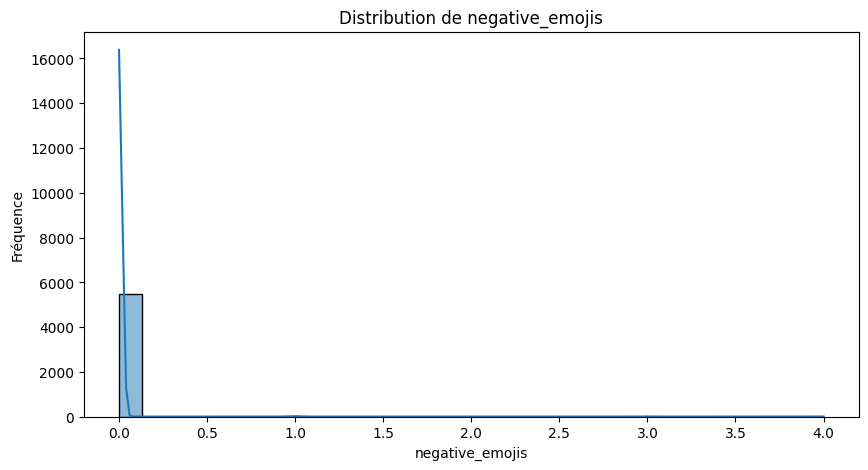

In [236]:
analyze_variable(df, 'negative_emojis')

➡️ Le test F est significatif (𝑝<0.0001p<0.0001), ce qui indique que l'usage d'émojis négatifs influence bien le rating.


**Interprétation**

-La variation expliquée par les émojis négatifs est relativement faible comparée aux résidus (55.86 vs. 8622.75), mais statistiquement significative.

-Le rating diminue en présence d'émojis négatifs, ce qui semble intuitif.


📌 **Résultats ANOVA :**
                         df       sum_sq     mean_sq           F        PR(>F)
nombre_point_intero     1.0   322.902832  322.902832  212.622349  2.778137e-47
Residual             5502.0  8355.713265    1.518668         NaN           NaN


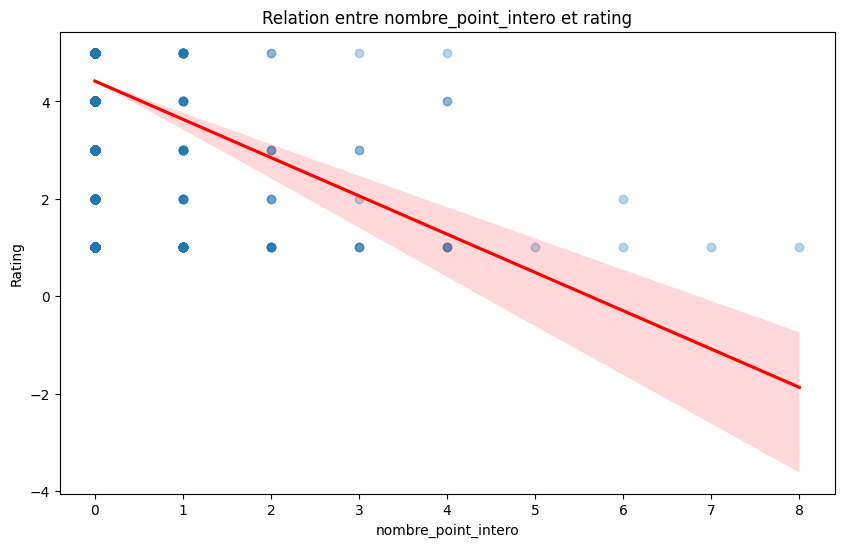

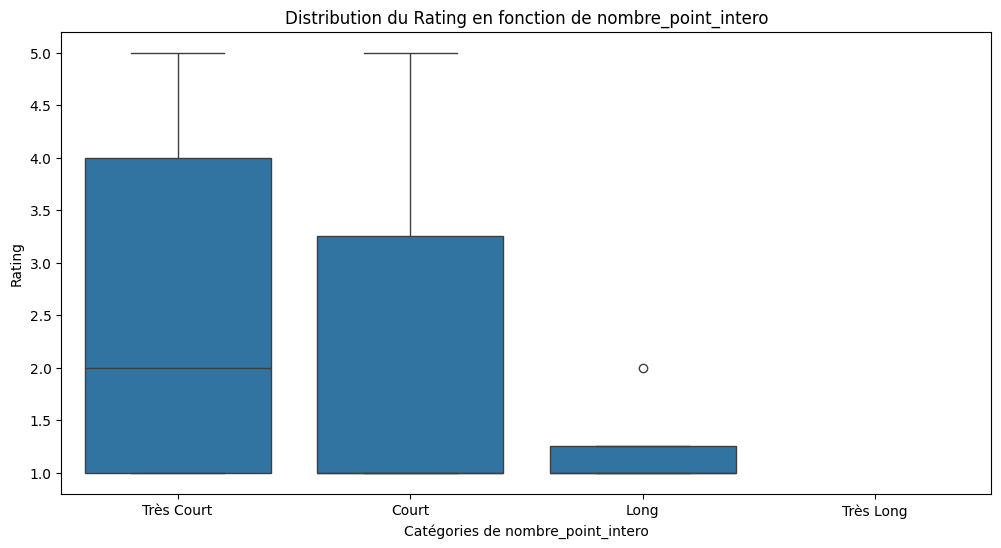

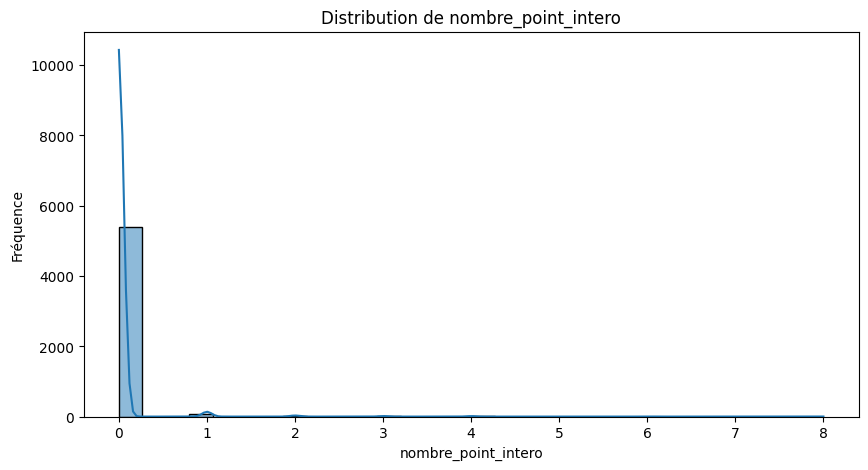

In [238]:
analyze_variable(df, 'nombre_point_intero')


📌 **Résultats ANOVA :**
                         df       sum_sq     mean_sq           F        PR(>F)
nombre_point_exclam     1.0   550.133024  550.133024  372.373525  2.445568e-80
Residual             5502.0  8128.483074    1.477369         NaN           NaN


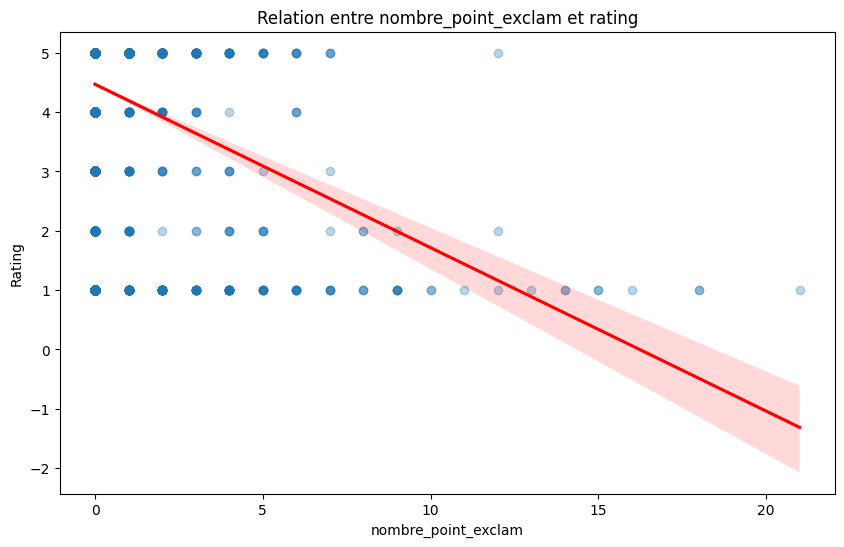

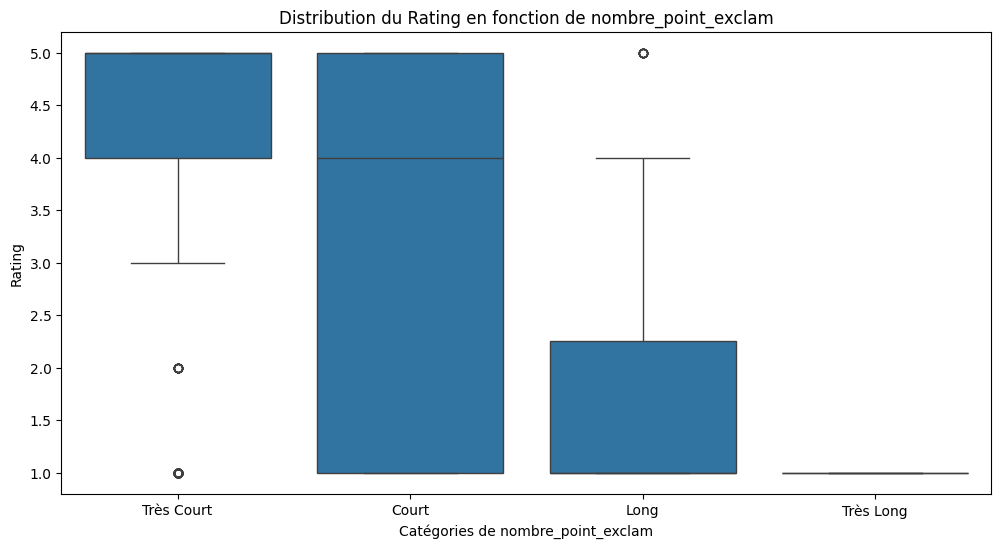

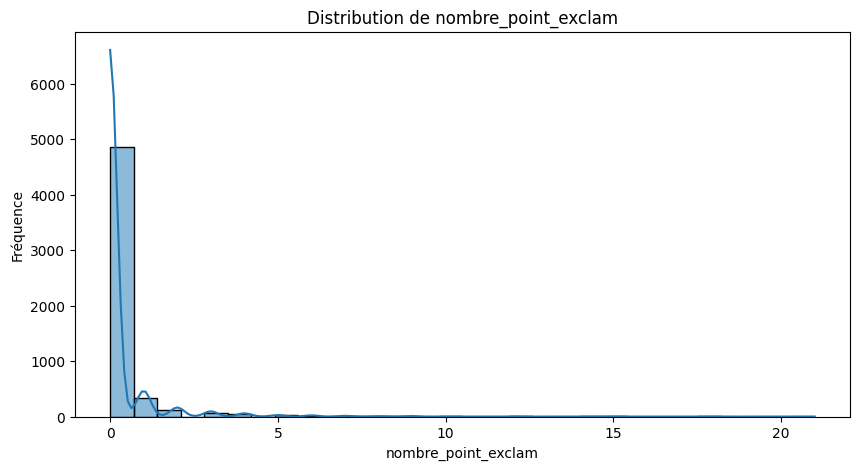

In [239]:
analyze_variable(df, 'nombre_point_exclam')

In [241]:
result = statsmodels.formula.api.ols('rating ~ positive_emojis + negative_emojis + nombre_point_exclam + nombre_point_intero+ sentiment + num_uppercase_characters', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:15:08   Log-Likelihood:                -1494.0
No. Observations:                5504   AIC:                             3004.
Df Residuals:                    5496   BIC:                             3057.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# 📊 Analyse de la Régression OLS

L’analyse montre un **R² élevé (0.936)**, indiquant que le modèle explique **93,6 % de la variance** du rating. Cependant, certaines variables semblent non significatives.

## 🔹 Variables significatives :
- **sentiment[T.Négatif] (-1.8034, p < 0.001)** → Un sentiment négatif réduit fortement le rating.
- **sentiment[T.Positif] (1.8861, p < 0.001)** → Un sentiment positif augmente fortement le rating.

## 🔸 Variables non significatives (p > 0.05) :
- **positive_emojis (p = 0.659)** → Aucune relation claire avec le rating.
- **negative_emojis (p = 0.216)** → Ne semble pas affecter significativement le rating.
- **nombre_point_exclam (p = 0.834)** → Aucune influence.
- **nombre_point_intero (p = 0.201)** → Aucune influence claire.
- **num_uppercase_characters (p = 0.072)** → Une légère tendance négative, mais non significative.

## 📌 Conclusion et Prochaines Étapes
1. **Simplifier le modèle** en retirant les variables non significatives.
2. **Explorer les interactions** (ex : sentiment & emojis).
3. **Vérifier la colinéarité** entre certaines variables.
4. **Visualiser les tendances** avec des scatter plots et boxplots.



In [254]:
df.columns

Index(['liens_marque', 'user_name', 'review_title', 'review_body', 'response',
       'response_date', 'rating', 'experience_date', 'review_date', 'site_url',
       'scrap_date', 'marque', 'categorie', 'reviews', 'pays', 'trust_score',
       'cat_response', 'diff_experience_review', 'diff_review_response',
       'exp_year', 'exp_month', 'exp_day', 'exp_day_of_week', 'review_year',
       'review_month', 'review_day', 'review_day_of_week', 'review',
       'num_special_characters', 'num_uppercase_characters',
       'total_characters', 'positive_emojis', 'negative_emojis',
       'extracted_emojis', 'commentaire_text', 'contains_emoji', 'langue',
       'commentaire_en', 'verif_traduction', 'Cat_characters',
       'Cat_cap_characters', 'rating_bis', 'nombre_point_intero',
       'nombre_point_exclam', 'sentiment', 'message_len',
       'cat_nombre_caractères', 'cat_num_uppercase_characters', 'char_bins',
       'cat_bins', 'commentaire_en_sans_SW'],
      dtype='object')

In [255]:
# Sélectionner les colonnes pertinentes pour le modèle
df_selected = df[['cat_response',  # categorie reponse 1 oui 0 pas de reponse
        'commentaire_text',        # Texte du commentaire
        'positive_emojis',         # Emojis positifs
        'negative_emojis',         # Emojis négatifs
        'sentiment',               # Sentiment du commentaire
        'num_special_characters',  # Nombre de caractères spéciaux
        'num_uppercase_characters',# Nombre de majuscules
        'total_characters',        # Longueur totale du commentaire
        'nombre_point_exclam',     # Nombre de points d'exclamation
        'nombre_point_intero',     # Nombre de points d'interrogation
        'char_bins',               # Longueur du commentaire catégorisée
        'rating',                  # La cible à prédire
        'diff_experience_review',  # La duree entre experience et avis
        'diff_review_response',    # La duree entre avis e reponse
        'commentaire_en_sans_SW'
    ]]

In [256]:
# Sauvegarde en fichier JSON
df_selected.to_json("df_selected.json", orient="records", force_ascii=False, indent=4)

print("✅ Fichier JSON sauvegardé avec succès : df_selected.json")

✅ Fichier JSON sauvegardé avec succès : df_selected.json
